In [2]:
import sys
import numpy as np 
import matplotlib.pyplot as plt

In [30]:
# Author: Frank de Veld
# Code for a neural network for gravity data interpretation
# Version: 1.0
# Date: July 13th, 2020

# Basic version, trains on one sample

X = [0.3,1] # One 2D sample

class Layer_Dense:
    def __init__(self, Number_of_inputs, Number_of_neurons):
        self.weights = np.abs(0.05 * np.random.randn(Number_of_inputs, Number_of_neurons))

        # This creates a matrix of weight factors connecting every neuron from the previous layer
        # to every neuron of the current layer
        # Initialisation of weights is best done with low values in order to prevent 'value explosion'
        self.biases = np.zeros((1, Number_of_neurons))
        # Each neuron also has a bias to vary
    def intermediate(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        # This intermediate value is the input for the activation function

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    def derivative(self, inputs):
        self.diffoutput = np.ones(len(inputs))
        for a in range(0, len(inputs)):
            if inputs[a] > 0:
                self.diffoutput[a] = 1 
            else:
                self.diffoutput[a] = 0 
        
class Activation_Linear:
    def forward(self, inputs):
        self.output = np.array(inputs)  
    def derivative(self, inputs):
        self.diffoutput = [1 for x in range(0, len(inputs))] 

Num_Hidden_Neurons_1 = 5
        
Hidden_Layer_1 = Layer_Dense(2,Num_Hidden_Neurons_1)
# Creates a hidden layer. The first value is the number of neurons in the previous layer (now input, so 1),
# the second value is the number of neurons in the current hidden layer (which can be any number)
Activation_Function_Hidden_Layer_1 = Activation_ReLU()
# Choose for all neurons of the layer a certain activation function

Final_Layer = Layer_Dense(Num_Hidden_Neurons_1,2) # Input: number of neurons hidden layer, number of outputs (=2)

Activation_Function_Final_Layer = Activation_Linear()

Learning_rate = 0.5

for a in range(0,100): 

    Hidden_Layer_1.intermediate(X)
    # Create the input for the activation function by creating a property of the hidden layer

    Activation_Function_Hidden_Layer_1.forward(Hidden_Layer_1.output) # 'Hidden_Layer_1.output' is the values of the neurons
    # Calculate the (output) value of every neuron in layer 1 by performing the activation function

    Output_Hidden_Layer_1 = Activation_Function_Hidden_Layer_1.output # 'Activation_Function_Hidden_Layer_1.output' is the value of the output of the neurons

    Final_Layer.intermediate(Output_Hidden_Layer_1) # Which is the input for the next layer of neurons

    Activation_Function_Final_Layer.forward(Final_Layer.output)

    Output_Final_Layer = Activation_Function_Final_Layer.output

    Error_array = np.zeros(2)

    NN_y = [Output_Final_Layer[0][0],Output_Final_Layer[0][1]]
    
    y = np.array([1/15, 15/15]) 
    
    Error_array[0] = np.abs(NN_y[0]-y[0])
    Error_array[1] = np.abs(NN_y[1]-y[1])

    Error_current_run = 1/2*np.sum(Error_array**2)
    print('y(NN):',NN_y)
    print('Error:',Error_current_run)
    print(' ')
    print('Layer 1 weights:',Hidden_Layer_1.weights)
    print('Layer 2 weights:',Final_Layer.weights)
    print(' ')
    print('First layer outputs',X)
    print('Hidden outputs:',Output_Hidden_Layer_1)
    print('Final outputs:',Output_Final_Layer)
    print(' ')
    
    ##
    ####### Input Layer -> Hidden Layer weights update
    ##
    
    for a in range(0,len(X)):
        dEdOut = -(y-NN_y)  # Derivative of the energy to the output; simply the difference with the true value
        # 1xn matrix, n=number of outputs
        
        Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # value of the derivatives at the values of the output neurons
        # 1xn matrix, n=number of outputs

        dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs
        
        dIndOutHid = Final_Layer.weights # Weights between hidden layer and output layer
        # mxn matrix, m=number of hidden neurons, n=number of outputs
        
        dEdOutHid = np.zeros(Num_Hidden_Neurons_1)
        # Interim result; result of the n 'ways' you can get to the weight in consideration
        
        for b in range(0,Num_Hidden_Neurons_1):
            dEdOutHid[b] = np.sum(dEdOut*dOutdIn*dIndOutHid[b]) # Compute every interim result
    
        Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[0]) # Hidden layer values (list of lists)
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutHiddInHid = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xm matrix, m=number of hidden neurons
        
        dInHiddW = X[a] # Derivative of the input to the bias, which is an additive constant
        # Scalar
        
        dEdW = dEdOutHid*dOutHiddInHid*dInHiddW # Multiplication of all gradients
        # 1xm matrix, m=number of hidden neurons
        
        for b in range (0, len(dEdOut)): # Update of every weight
            Hidden_Layer_1.weights[a][b] = Hidden_Layer_1.weights[a][b] - Learning_rate*dEdW[b]
    
    ##
    ####### Hidden layer bias update
    ##
    
    dEdOut = -(y-NN_y)  # Derivative of the energy to the output; simply the difference with the true value
    # 1xn matrix, n=number of outputs
    
    Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # value of the derivatives at the values of the output neurons
    # 1xn matrix, n=number of outputs
    
    dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
    #dOutdIn = Final_Layer.output[0] # Element 0 because this is a list of lists
    # 1xn matrix, n=number of outputs
    
    dIndOutHid = Final_Layer.weights # Weights between hidden layer and output layer
    # mxn matrix, m=number of hidden neurons, n=number of outputs
    
    dEdOutHid = np.zeros(Num_Hidden_Neurons_1)
    # Interim result; result of the n 'ways' you can get to the weight in consideration

    for b in range(0,Num_Hidden_Neurons_1):
        dEdOutHid[b] = np.sum(dEdOut*dOutdIn*dIndOutHid[b]) # Compute every interim result
    
    Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[0]) # 1st neuron hidden layer value
    # This 'generates' derivatives in the layers, but doesn't retrieve them
    
    dOutHiddInHid = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
    # 1xm matrix, m=number of hidden neurons
    
    dInHiddB = np.ones(Num_Hidden_Neurons_1) # Derivative of the input to the bias, which is an additive constant
    # 1xm matrix, m=number of hidden neurons
    
    dEdB = dEdOutHid*dOutHiddInHid*dInHiddB # Multiplication of all gradients
    # 1xm matrix, m=number of hidden neurons
    
    Hidden_Layer_1.biases = Hidden_Layer_1.biases - Learning_rate*dEdB # Update of every bias
    
    ##
    ####### Hidden Layer -> Final Layer weights update
    ##
    
    for a in range(0,Num_Hidden_Neurons_1):
        dEdOut = -(y-NN_y) # Derivative of the energy to the output; simply the difference with the true value
        # 1xn matrix, n=number of outputs

        Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # Value of the derivatives at the values of the output neurons
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs
        
        dIndW = Hidden_Layer_1.output[0][a] # Derivative of the input to the weights; the values of the hidden neurons
        # Scalar
        
        dEdW = dEdOut*dOutdIn*dIndW # Multiplication of all gradients
        # 1xn matrix, n=number of outputs
        
        for b in range (0, len(dEdOut)): # Update of every weight
            Final_Layer.weights[a][b] = Final_Layer.weights[a][b] - Learning_rate*dEdW[b] 

    ##
    ######## Output layer bias update
    ##
    
    dEdOut = -(y-NN_y)  # Derivative of the energy to the output; simply the difference with the true value
    # 1xn matrix, n=number of outputs
    
    Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # value of the derivatives at the values of the output neurons
    # This 'generates' derivatives in the layers, but doesn't retrieve them
    
    dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
    # 1xn matrix, n=number of outputs
    
    dIndB = np.ones(len(Final_Layer.output[0])) # Derivative of the input to the bias, which is an additive constant
    # 1xn matrix, n=number of outputs
    
    dEdB = dEdOut*dOutdIn*dIndB # Total derivative of the energy to the biases
    # 1xn matrix, n=number of outputs
    
    Final_Layer.biases = Final_Layer.biases - Learning_rate*dEdB
    # Updating of all the biases at once using the learning rate and the gradient
    
    print(' ')

y(NN): [0.006972316018409548, 0.004002925414331301]
Error: 0.4977867940412635
 
Layer 1 weights: [[0.03215669 0.03101252 0.00323283 0.0539087  0.02518452]
 [0.0132597  0.00742369 0.04504168 0.01673388 0.00330423]]
Layer 2 weights: [[0.03810928 0.01583843]
 [0.01303049 0.04495797]
 [0.05097228 0.02363774]
 [0.0765314  0.01303007]
 [0.09371437 0.12631283]]
 
First layer outputs [0.3, 1]
Hidden outputs: [[0.02290671 0.01672744 0.04601153 0.03290649 0.01085958]]
Final outputs: [[0.00697232 0.00400293]]
 
 
y(NN): [0.045872614268792716, 0.5166361851036518]
Error: 0.11703648508313834
 
Layer 1 weights: [[0.03486418 0.0378459  0.00323283 0.0539087  0.02518452]
 [0.02228467 0.03020161 0.04504168 0.01673388 0.00330423]]
Layer 2 weights: [[0.03879298 0.02724594]
 [0.01352976 0.05328821]
 [0.0523456  0.04655142]
 [0.07751356 0.02941746]
 [0.0940385  0.13172089]]
 
First layer outputs [0.3, 1]
Hidden outputs: [[0.0417689  0.06433331 0.05930447 0.04167969 0.0765603 ]]
Final outputs: [[0.04587261 0.

Error: 6.162975822039155e-33
 
Layer 1 weights: [[0.03955721 0.0465002  0.00323283 0.0539087  0.02518452]
 [0.0379281  0.05904929 0.04504168 0.01673388 0.00330423]]
Layer 2 weights: [[0.03913304 0.05037128]
 [0.01403587 0.09021442]
 [0.05286812 0.07675785]
 [0.0778829  0.0505299 ]
 [0.09465624 0.17543189]]
 
First layer outputs [0.3, 1]
Hidden outputs: [[0.07446366 0.12462494 0.08490582 0.05856491 0.14254773]]
Final outputs: [[0.06666667 1.        ]]
 
 
y(NN): [0.06666666666666667, 0.9999999999999999]
Error: 6.162975822039155e-33
 
Layer 1 weights: [[0.03955721 0.0465002  0.00323283 0.0539087  0.02518452]
 [0.0379281  0.05904929 0.04504168 0.01673388 0.00330423]]
Layer 2 weights: [[0.03913304 0.05037128]
 [0.01403587 0.09021442]
 [0.05286812 0.07675785]
 [0.0778829  0.0505299 ]
 [0.09465624 0.17543189]]
 
First layer outputs [0.3, 1]
Hidden outputs: [[0.07446366 0.12462494 0.08490582 0.05856491 0.14254773]]
Final outputs: [[0.06666667 1.        ]]
 
 
y(NN): [0.06666666666666667, 0.99

In [32]:
# Basic version, trains on two samples

class Layer_Dense:
    def __init__(self, Number_of_inputs, Number_of_neurons):
        self.weights = np.abs(0.05 * np.random.randn(Number_of_inputs, Number_of_neurons))

        # This creates a matrix of weight factors connecting every neuron from the previous layer
        # to every neuron of the current layer
        # Initialisation of weights is best done with low values in order to prevent 'value explosion'
        self.biases = np.zeros((1, Number_of_neurons))
        # Each neuron also has a bias to vary
    def intermediate(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        # This intermediate value is the input for the activation function

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    def derivative(self, inputs):
        self.diffoutput = np.ones(len(inputs))
        for a in range(0, len(inputs)):
            if inputs[a] > 0:
                self.diffoutput[a] = 1 #[1 for x in range(0, len(inputs))] 
            else:
                self.diffoutput[a] = 0 # [0 for x in range(0, len(inputs))] 
        
class Activation_Linear:
    def forward(self, inputs):
        self.output = np.array(inputs)  
    def derivative(self, inputs):
        self.diffoutput = [1 for x in range(0, len(inputs))] 

def Normalise_values(Value_list):
    Max_value = np.max(Value_list)
    for a in range(0,len(Value_list)):
        for b in range(0,len(Value_list[0])):
            Value_list[a][b] = Value_list[a][b]/Max_value
    return np.array(Value_list)        

# Twice the samples, twice the fun
X = [[0.3, 1], [0.87, 1.84]]
y = [[1, 15], [12, 27]]       

X = Normalise_values(X)
y = Normalise_values(y)

Num_Inputs = 2
Num_Hidden_Neurons_1 = 5
Num_Outputs = 2

        
Hidden_Layer_1 = Layer_Dense(Num_Inputs,Num_Hidden_Neurons_1)
# Creates a hidden layer. The first value is the number of neurons in the previous layer (now input, so 1),
# the second value is the number of neurons in the current hidden layer (which can be any number)
Activation_Function_Hidden_Layer_1 = Activation_ReLU()
# Choose for all neurons of the layer a certain activation function

Final_Layer = Layer_Dense(Num_Hidden_Neurons_1,Num_Outputs) # Input: number of neurons hidden layer, number of outputs (=2)

Activation_Function_Final_Layer = Activation_Linear()

Learning_rate = 0.05

def NN_Training(X,y,Learning_rate):
    Hidden_Layer_1.intermediate(X)
    # Create the input for the activation function by creating a property of the hidden layer

    Activation_Function_Hidden_Layer_1.forward(Hidden_Layer_1.output) # 'Hidden_Layer_1.output' is the values of the neurons
    # Calculate the (output) value of every neuron in layer 1 by performing the activation function

    Output_Hidden_Layer_1 = Activation_Function_Hidden_Layer_1.output # 'Activation_Function_Hidden_Layer_1.output' is the value of the output of the neurons

    Final_Layer.intermediate(Output_Hidden_Layer_1) # Which is the input for the next layer of neurons

    Activation_Function_Final_Layer.forward(Final_Layer.output)

    Output_Final_Layer = Activation_Function_Final_Layer.output

    Error_array = np.zeros(2)

    NN_y = [Output_Final_Layer[0][0],Output_Final_Layer[0][1]]
    
    Error_array[0] = np.abs(NN_y[0]-y[0])
    Error_array[1] = np.abs(NN_y[1]-y[1])

    Error_current_run = 1/2*np.sum(Error_array**2)
    print('y(NN):',NN_y)
    print('Desired output',y)
    print('Error:',Error_current_run)
    
    ##
    ####### Input Layer -> Hidden Layer weights update
    ##
    
    for a in range(0,len(X)):
        dEdOut = -(y-NN_y)  # Derivative of the energy to the output; simply the difference with the true value
        # 1xn matrix, n=number of outputs
        
        Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # value of the derivatives at the values of the output neurons
        # 1xn matrix, n=number of outputs

        dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs
        
        dIndOutHid = Final_Layer.weights # Weights between hidden layer and output layer
        # mxn matrix, m=number of hidden neurons, n=number of outputs
        
        dEdOutHid = np.zeros(Num_Hidden_Neurons_1)
        # Interim result; result of the n 'ways' you can get to the weight in consideration
        
        for b in range(0,Num_Hidden_Neurons_1):
            dEdOutHid[b] = np.sum(dEdOut*dOutdIn*dIndOutHid[b]) # Compute every interim result
    
        Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[0]) # Hidden layer values (list of lists)
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutHiddInHid = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xm matrix, m=number of hidden neurons
        
        dInHiddW = X[a] # Derivative of the input to the bias, which is an additive constant
        # Scalar
        
        dEdW = dEdOutHid*dOutHiddInHid*dInHiddW # Multiplication of all gradients
        # 1xm matrix, m=number of hidden neurons
        
        for b in range (0, len(dEdOut)): # Update of every weight
            Hidden_Layer_1.weights[a][b] = Hidden_Layer_1.weights[a][b] - Learning_rate*dEdW[b]
    
    ##
    ####### Hidden layer bias update
    ##
    
    dEdOut = -(y-NN_y)  # Derivative of the energy to the output; simply the difference with the true value
    # 1xn matrix, n=number of outputs
    
    Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # value of the derivatives at the values of the output neurons
    # 1xn matrix, n=number of outputs
    
    dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
    #dOutdIn = Final_Layer.output[0] # Element 0 because this is a list of lists
    # 1xn matrix, n=number of outputs
    
    dIndOutHid = Final_Layer.weights # Weights between hidden layer and output layer
    # mxn matrix, m=number of hidden neurons, n=number of outputs
    
    dEdOutHid = np.zeros(Num_Hidden_Neurons_1)
    # Interim result; result of the n 'ways' you can get to the weight in consideration

    for b in range(0,Num_Hidden_Neurons_1):
        dEdOutHid[b] = np.sum(dEdOut*dOutdIn*dIndOutHid[b]) # Compute every interim result
    
    Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[0]) # 1st neuron hidden layer value
    # This 'generates' derivatives in the layers, but doesn't retrieve them
    
    dOutHiddInHid = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
    # 1xm matrix, m=number of hidden neurons
    
    dInHiddB = np.ones(Num_Hidden_Neurons_1) # Derivative of the input to the bias, which is an additive constant
    # 1xm matrix, m=number of hidden neurons
    
    dEdB = dEdOutHid*dOutHiddInHid*dInHiddB # Multiplication of all gradients
    # 1xm matrix, m=number of hidden neurons
    
    Hidden_Layer_1.biases = Hidden_Layer_1.biases - Learning_rate*dEdB # Update of every bias
    
    ##
    ####### Hidden Layer -> Final Layer weights update
    ##
    
    for a in range(0,Num_Hidden_Neurons_1):
        dEdOut = -(y-NN_y) # Derivative of the energy to the output; simply the difference with the true value
        # 1xn matrix, n=number of outputs

        Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # Value of the derivatives at the values of the output neurons
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs
        
        dIndW = Hidden_Layer_1.output[0][a] # Derivative of the input to the weights; the values of the hidden neurons
        # Scalar
        
        dEdW = dEdOut*dOutdIn*dIndW # Multiplication of all gradients
        # 1xn matrix, n=number of outputs
        
        for b in range (0, len(dEdOut)): # Update of every weight
            Final_Layer.weights[a][b] = Final_Layer.weights[a][b] - Learning_rate*dEdW[b] 

    ##
    ######## Output layer bias update
    ##
    
    dEdOut = -(y-NN_y)  # Derivative of the energy to the output; simply the difference with the true value
    # 1xn matrix, n=number of outputs
    
    Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # value of the derivatives at the values of the output neurons
    # This 'generates' derivatives in the layers, but doesn't retrieve them
    
    dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
    # 1xn matrix, n=number of outputs
    
    dIndB = np.ones(len(Final_Layer.output[0])) # Derivative of the input to the bias, which is an additive constant
    # 1xn matrix, n=number of outputs
    
    dEdB = dEdOut*dOutdIn*dIndB # Total derivative of the energy to the biases
    # 1xn matrix, n=number of outputs
    
    Final_Layer.biases = Final_Layer.biases - Learning_rate*dEdB
    # Updating of all the biases at once using the learning rate and the gradient
    
    print(' ')
    

for a in range(0,1000):
    print('Iteration',a+1)
    for b in range(0,len(X)):
        NN_Training(X[b],y[b],Learning_rate)

Iteration 1
y(NN): [0.01160129982425601, 0.004137981725042066]
Desired output [0.03703704 0.55555556]
Error: 0.1523541587283437
 
y(NN): [0.025034620233836187, 0.036578542115085655]
Desired output [0.44444444 1.        ]
Error: 0.5520427530787335
 
Iteration 2
y(NN): [0.03561741734407966, 0.08184697778922265]
Desired output [0.03703704 0.55555556]
Error: 0.11220091598473725
 
y(NN): [0.048559404036257, 0.11186729361915271]
Desired output [0.44444444 1.        ]
Error: 0.4727523346811802
 
Iteration 3
y(NN): [0.05729154657645971, 0.1520076550693094]
Desired output [0.03703704 0.55555556]
Error: 0.0816305765717699
 
y(NN): [0.06982317607196889, 0.1799284697672181]
Desired output [0.44444444 1.        ]
Error: 0.4064292047076694
 
Iteration 4
y(NN): [0.07684131258287481, 0.21535862198809336]
Desired output [0.03703704 0.55555556]
Error: 0.05865916698021664
 
y(NN): [0.08903489914142615, 0.24146284016743572]
Desired output [0.44444444 1.        ]
Error: 0.35084728386967573
 
Iteration 5
y(

 
Iteration 75
y(NN): [0.2327443713981045, 0.7676635863165855]
Desired output [0.03703704 0.55555556]
Error: 0.041645588718018337
 
y(NN): [0.25941632760086114, 0.7993851507074504]
Desired output [0.44444444 1.        ]
Error: 0.03724086088967754
 
Iteration 76
y(NN): [0.23260170806835334, 0.7675187279648029]
Desired output [0.03703704 0.55555556]
Error: 0.04158696350668964
 
y(NN): [0.2596204918160711, 0.7996252767711344]
Desired output [0.44444444 1.        ]
Error: 0.03715496158710984
 
Iteration 77
y(NN): [0.2324576767990481, 0.7673708086837487]
Desired output [0.03703704 0.55555556]
Error: 0.04152746395137712
 
y(NN): [0.2598264474864552, 0.7998658209834496]
Desired output [0.44444444 1.        ]
Error: 0.03706874720570437
 
Iteration 78
y(NN): [0.23231227273750704, 0.7672199914460458]
Desired output [0.03703704 0.55555556]
Error: 0.041467125549356776
 
y(NN): [0.26003422120802083, 0.8001069778649184]
Desired output [0.44444444 1.        ]
Error: 0.03698217536620191
 
Iteration 79

 
y(NN): [0.2784452623401005, 0.8204798257415185]
Desired output [0.44444444 1.        ]
Error: 0.029891610712553363
 
Iteration 145
y(NN): [0.21850235025529785, 0.7519842625456996]
Desired output [0.03703704 0.55555556]
Error: 0.03575694841561068
 
y(NN): [0.2788027476903049, 0.8208722739882228]
Desired output [0.44444444 1.        ]
Error: 0.029761956964870315
 
Iteration 146
y(NN): [0.21822006976965186, 0.7516722245820331]
Desired output [0.03703704 0.55555556]
Error: 0.03564451961011435
 
y(NN): [0.2791627222847091, 0.8212674142954508]
Desired output [0.44444444 1.        ]
Error: 0.02963169243636098
 
Iteration 147
y(NN): [0.21793511756023576, 0.7513572741940787]
Desired output [0.03703704 0.55555556]
Error: 0.03553121427938853
 
y(NN): [0.2795251881346497, 0.8216652485722549]
Desired output [0.44444444 1.        ]
Error: 0.029500822334285703
 
Iteration 148
y(NN): [0.21764747719915606, 0.7510393939393382]
Desired output [0.03703704 0.55555556]
Error: 0.0354170310824056
 
y(NN): [

 
Iteration 197
y(NN): [0.19999815522950967, 0.7315989108996432]
Desired output [0.03703704 0.55555556]
Error: 0.028773794501672875
 
y(NN): [0.30076909202782603, 0.8449245586767005]
Desired output [0.44444444 1.        ]
Error: 0.022345499696827805
 
Iteration 198
y(NN): [0.19956214689398022, 0.7311199647309945]
Desired output [0.03703704 0.55555556]
Error: 0.028618636551566195
 
y(NN): [0.30125315038863953, 0.8454534557626188]
Desired output [0.44444444 1.        ]
Error: 0.022194190514546408
 
Iteration 199
y(NN): [0.19912307480723948, 0.7306377061428928]
Desired output [0.03703704 0.55555556]
Error: 0.028462821547165264
 
y(NN): [0.30173931744602484, 0.8459846162174621]
Desired output [0.44444444 1.        ]
Error: 0.022042745856658746
 
Iteration 200
y(NN): [0.19868094387238477, 0.7301521410467336]
Desired output [0.03703704 0.55555556]
Error: 0.028306360141086416
 
y(NN): [0.30222757602772626, 0.8465180211488086]
Desired output [0.44444444 1.        ]
Error: 0.021891177747167846


Desired output [0.03703704 0.55555556]
Error: 0.014660675293201333
 
y(NN): [0.3471018193232427, 0.8954014214097343]
Desired output [0.44444444 1.        ]
Error: 0.010208224654295397
 
Iteration 283
y(NN): [0.1530452733332112, 0.6802517971473174]
Desired output [0.03703704 0.55555556]
Error: 0.014503531777830009
 
y(NN): [0.3476740901376494, 0.8960232764980554]
Desired output [0.44444444 1.        ]
Error: 0.010087830251431246
 
Iteration 284
y(NN): [0.15242238938110253, 0.6795731314627842]
Desired output [0.03703704 0.55555556]
Error: 0.014347069334734676
 
y(NN): [0.34824604989929664, 0.8966447573796039]
Desired output [0.44444444 1.        ]
Error: 0.009968218645092428
 
Iteration 285
y(NN): [0.15179886069392573, 0.6788938201416763]
Desired output [0.03703704 0.55555556]
Error: 0.014191301840085373
 
y(NN): [0.34881766478416043, 0.8972658273526567]
Desired output [0.44444444 1.        ]
Error: 0.009849395608865323
 
Iteration 286
y(NN): [0.15117473222770864, 0.6782139121743802]
Des

y(NN): [0.3797977272493796, 0.9308697541924975]
Desired output [0.44444444 1.        ]
Error: 0.004479094464752202
 
Iteration 343
y(NN): [0.1160549453702636, 0.6400452386843286]
Desired output [0.03703704 0.55555556]
Error: 0.006691168196279336
 
y(NN): [0.3802968774872559, 0.9314101969093838]
Desired output [0.44444444 1.        ]
Error: 0.004409735717268248
 
Iteration 344
y(NN): [0.11547074344433733, 0.6394118369825459]
Desired output [0.03703704 0.55555556]
Error: 0.00659186111777459
 
y(NN): [0.3807940211972545, 0.9319484323690914]
Desired output [0.44444444 1.        ]
Error: 0.004341196118285272
 
Iteration 345
y(NN): [0.11488838183844828, 0.6387804826145744]
Desired output [0.03703704 0.55555556]
Error: 0.006493610185683615
 
y(NN): [0.38128913920013563, 0.9324844399769301]
Desired output [0.44444444 1.        ]
Error: 0.004273471712865287
 
Iteration 346
y(NN): [0.11430789216187001, 0.6381512095754641]
Desired output [0.03703704 0.55555556]
Error: 0.00639641355734968
 
y(NN):

Error: 0.0017405190507787183
 
Iteration 398
y(NN): [0.08797091009657383, 0.6095084872102783]
Desired output [0.03703704 0.55555556]
Error: 0.002752589129492094
 
y(NN): [0.40431608822020215, 0.9572878560383768]
Desired output [0.44444444 1.        ]
Error: 0.0017173061075290521
 
Iteration 399
y(NN): [0.08744435606138776, 0.6089529402850796]
Desired output [0.03703704 0.55555556]
Error: 0.002696089253587739
 
y(NN): [0.40460305391051166, 0.9576118745232396]
Desired output [0.44444444 1.        ]
Error: 0.001692044790555466
 
Iteration 400
y(NN): [0.08694006692709645, 0.6084200565997014]
Desired output [0.03703704 0.55555556]
Error: 0.0026424839314273313
 
y(NN): [0.4049089446044598, 0.9579546092246609]
Desired output [0.44444444 1.        ]
Error: 0.0016654353165241962
 
Iteration 401
y(NN): [0.08646566610601494, 0.6079171028099732]
Desired output [0.03703704 0.55555556]
Error: 0.002592460501257611
 
y(NN): [0.4054269320246934, 0.9585076543614579]
Desired output [0.44444444 1.        

Desired output [0.03703704 0.55555556]
Error: 0.0010810001382635546
 
y(NN): [0.4197739126883811, 0.974076870885998]
Desired output [0.44444444 1.        ]
Error: 0.0006403218800940724
 
Iteration 450
y(NN): [0.06885719324190841, 0.5890792794312963]
Desired output [0.03703704 0.55555556]
Error: 0.0010681812016996627
 
y(NN): [0.41987325178111407, 0.9741755130625881]
Desired output [0.44444444 1.        ]
Error: 0.0006353238172395288
 
Iteration 451
y(NN): [0.06844621040836912, 0.5886325570488884]
Desired output [0.03703704 0.55555556]
Error: 0.001040312099830169
 
y(NN): [0.42014741899414276, 0.9744530404586418]
Desired output [0.44444444 1.        ]
Error: 0.0006214962937702
 
Iteration 452
y(NN): [0.06818353540384776, 0.5883346441157271]
Desired output [0.03703704 0.55555556]
Error: 0.0010222865036746559
 
y(NN): [0.4203633330768331, 0.9746549593736821]
Desired output [0.44444444 1.        ]
Error: 0.0006111355045245026
 
Iteration 453
y(NN): [0.06786730073013084, 0.5879701414497862]

 
Iteration 496
y(NN): [0.057156063984070804, 0.5765491941385066]
Desired output [0.03703704 0.55555556]
Error: 0.0004227540531235199
 
y(NN): [0.4289371673481105, 0.9838221709614317]
Desired output [0.44444444 1.        ]
Error: 0.00025109889767181405
 
Iteration 497
y(NN): [0.05701572715002656, 0.5763768971904413]
Desired output [0.03703704 0.55555556]
Error: 0.00041633816305374497
 
y(NN): [0.4290245117939867, 0.9839150014043367]
Desired output [0.44444444 1.        ]
Error: 0.00024825075138357037
 
Iteration 498
y(NN): [0.05678124193966047, 0.5761324461124147]
Desired output [0.03703704 0.55555556]
Error: 0.0004066210261128677
 
y(NN): [0.42927526290057055, 0.9842161647670989]
Desired output [0.44444444 1.        ]
Error: 0.00023961676168518612
 
Iteration 499
y(NN): [0.05663180122969966, 0.575998206316832]
Desired output [0.03703704 0.55555556]
Error: 0.00040092837695678354
 
y(NN): [0.42935020035737304, 0.9842908237123734]
Desired output [0.44444444 1.        ]
Error: 0.000237307

Desired output [0.03703704 0.55555556]
Error: 0.00013099504803346714
 
y(NN): [0.43578165743592523, 0.9911055754302447]
Desired output [0.44444444 1.        ]
Error: 7.70773335910179e-05
 
Iteration 553
y(NN): [0.04821396069551373, 0.5670432555454173]
Desired output [0.03703704 0.55555556]
Error: 0.00012844543676224305
 
y(NN): [0.43586595338215695, 0.9911839779824309]
Desired output [0.44444444 1.        ]
Error: 7.565637656000503e-05
 
Iteration 554
y(NN): [0.048090820679452334, 0.5669044226022728]
Desired output [0.03703704 0.55555556]
Error: 0.00012549145802869612
 
y(NN): [0.43600373244659596, 0.9913490418069356]
Desired output [0.44444444 1.        ]
Error: 7.304234834438537e-05
 
Iteration 555
y(NN): [0.0480112573677412, 0.5668375638893668]
Desired output [0.03703704 0.55555556]
Error: 0.00012385861195551314
 
y(NN): [0.43604140989306284, 0.9913853441577536]
Desired output [0.44444444 1.        ]
Error: 7.241164247603145e-05
 
Iteration 556
y(NN): [0.04785577456635415, 0.5666705

y(NN): [0.04345555271049928, 0.562033674856213]
Desired output [0.03703704 0.55555556]
Error: 4.158168656201551e-05
 
y(NN): [0.4395250887505491, 0.9950367944371508]
Desired output [0.44444444 1.        ]
Error: 2.441673495107908e-05
 
Iteration 606
y(NN): [0.043384779427716375, 0.5619549009060435]
Desired output [0.03703704 0.55555556]
Error: 4.062272718661939e-05
 
y(NN): [0.43960489114942414, 0.9951316644306321]
Desired output [0.44444444 1.        ]
Error: 2.3560983655657383e-05
 
Iteration 607
y(NN): [0.0433365638044112, 0.5619142017273157]
Desired output [0.03703704 0.55555556]
Error: 4.005820931525132e-05
 
y(NN): [0.4396273266374964, 0.9951528277150067]
Desired output [0.44444444 1.        ]
Error: 2.3349851563211645e-05
 
Iteration 608
y(NN): [0.04324617553334703, 0.5618178347504614]
Desired output [0.03703704 0.55555556]
Error: 3.8884770790654714e-05
 
y(NN): [0.43965940592742186, 0.9951846650224234]
Desired output [0.44444444 1.        ]
Error: 2.3042022277830927e-05
 
Itera

y(NN): [0.04093992941370439, 0.5594150679608373]
Desired output [0.03703704 0.55555556]
Error: 1.506420245518577e-05
 
y(NN): [0.4414388287781386, 0.9970349105343149]
Desired output [0.44444444 1.        ]
Error: 8.912740536529755e-06
 
Iteration 652
y(NN): [0.040891041905010916, 0.5593633497462562]
Desired output [0.03703704 0.55555556]
Error: 1.4676325060550007e-05
 
y(NN): [0.4414793112054647, 0.9970752740834652]
Desired output [0.44444444 1.        ]
Error: 8.673018405876414e-06
 
Iteration 653
y(NN): [0.04085416839356304, 0.5593232854105608]
Desired output [0.03703704 0.55555556]
Error: 1.4383140026635687e-05
 
y(NN): [0.44151144042421175, 0.9971050848397569]
Desired output [0.44444444 1.        ]
Error: 8.49152318385314e-06
 
Iteration 654
y(NN): [0.0408161427953318, 0.5592827667964156]
Desired output [0.03703704 0.55555556]
Error: 1.4086871983185128e-05
 
y(NN): [0.4415602816711298, 0.9971625554804577]
Desired output [0.44444444 1.        ]
Error: 8.184743152227107e-06
 
Iterati

y(NN): [0.039048631727326866, 0.5574718087365752]
Desired output [0.03703704 0.55555556]
Error: 3.8592697258850315e-06
 
y(NN): [0.442897300638889, 0.9985293854117732]
Desired output [0.44444444 1.        ]
Error: 2.278180611087062e-06
 
Iteration 713
y(NN): [0.039029336967558476, 0.5574513591674664]
Desired output [0.03703704 0.55555556]
Error: 3.781665174044836e-06
 
y(NN): [0.44291407324236465, 0.9985446346683065]
Desired output [0.44444444 1.        ]
Error: 2.2300621324252786e-06
 
Iteration 714
y(NN): [0.03900947573072758, 0.557430482120376]
Desired output [0.03703704 0.55555556]
Error: 3.7029320119185656e-06
 
y(NN): [0.4429393992502212, 0.9985740621856077]
Desired output [0.44444444 1.        ]
Error: 2.1492298435841152e-06
 
Iteration 715
y(NN): [0.03899271745529956, 0.5574161390103622]
Desired output [0.03703704 0.55555556]
Error: 3.6432283453378886e-06
 
y(NN): [0.44294739366804686, 0.9985812591415801]
Desired output [0.44444444 1.        ]
Error: 2.1269933252312315e-06
 
It

Error: 8.716697441972784e-07
 
y(NN): [0.443694473193583, 0.999328075155388]
Desired output [0.44444444 1.        ]
Error: 5.069699369627268e-07
 
Iteration 780
y(NN): [0.03800439500103486, 0.5564252575418425]
Desired output [0.03703704 0.55555556]
Error: 8.460814877306891e-07
 
y(NN): [0.4437036140391012, 0.9993366992864546]
Desired output [0.44444444 1.        ]
Error: 4.943987630354032e-07
 
Iteration 781
y(NN): [0.03799484170468739, 0.556415515563978]
Desired output [0.03703704 0.55555556]
Error: 8.284604987293052e-07
 
y(NN): [0.4437109773270832, 0.9993430327055102]
Desired output [0.44444444 1.        ]
Error: 4.847900191397317e-07
 
Iteration 782
y(NN): [0.03798448872069379, 0.5564045903765886]
Desired output [0.03703704 0.55555556]
Error: 8.092624100953208e-07
 
y(NN): [0.44372259436104133, 0.9993562931894064]
Desired output [0.44444444 1.        ]
Error: 4.677130004567868e-07
 
Iteration 783
y(NN): [0.03797717057709346, 0.5563989691936918]
Desired output [0.03703704 0.55555556

Error: 1.2743918615724488e-07
 
Iteration 842
y(NN): [0.037535756199176734, 0.5559710292013793]
Desired output [0.03703704 0.55555556]
Error: 2.1066957652969178e-07
 
y(NN): [0.4440639417728891, 0.9996852453461389]
Desired output [0.44444444 1.        ]
Error: 1.2192638759397826e-07
 
Iteration 843
y(NN): [0.03753298794236734, 0.555969084336791]
Desired output [0.03703704 0.55555556]
Error: 2.0848667670401805e-07
 
y(NN): [0.4440656935215226, 0.9996865093720608]
Desired output [0.44444444 1.        ]
Error: 1.208643177099186e-07
 
Iteration 844
y(NN): [0.03752603054296555, 0.55596221188509]
Desired output [0.03703704 0.55555556]
Error: 2.0224200959532734e-07
 
y(NN): [0.4440681887500428, 0.9996885952589405]
Desired output [0.44444444 1.        ]
Error: 1.192706301619991e-07
 
Iteration 845
y(NN): [0.03752001286705445, 0.5559563290442843]
Desired output [0.03703704 0.55555556]
Error: 1.969425208243868e-07
 
y(NN): [0.44407304742619536, 0.9996930889099153]
Desired output [0.44444444 1.  

 
Iteration 897
y(NN): [0.03731738223428646, 0.5557687979218188]
Desired output [0.03703704 0.55555556]
Error: 6.203286819517188e-08
 
y(NN): [0.44422944162191846, 0.99983730367947]
Desired output [0.44444444 1.        ]
Error: 3.634815320406559e-08
 
Iteration 898
y(NN): [0.037314596771760494, 0.5557661508787648]
Desired output [0.03703704 0.55555556]
Error: 6.069489824867589e-08
 
y(NN): [0.4442326711090865, 0.9998407887618332]
Desired output [0.44444444 1.        ]
Error: 3.509808196360789e-08
 
Iteration 899
y(NN): [0.03731231770802887, 0.5557645240437844]
Desired output [0.03703704 0.55555556]
Error: 5.972363844717699e-08
 
y(NN): [0.4442337396742143, 0.9998415007759032]
Desired output [0.44444444 1.        ]
Error: 3.475925211850998e-08
 
Iteration 900
y(NN): [0.037308634188078504, 0.5557610233661094]
Desired output [0.03703704 0.55555556]
Error: 5.799101681382003e-08
 
y(NN): [0.4442362132304668, 0.9998436534379476]
Desired output [0.44444444 1.        ]
Error: 3.390224297010377

Error: 7.79181595656233e-09
 
Iteration 967
y(NN): [0.037174252789646894, 0.5556443060399796]
Desired output [0.03703704 0.55555556]
Error: 1.3352405624894819e-08
 
y(NN): [0.4443395971749017, 0.9999331699021654]
Desired output [0.44444444 1.        ]
Error: 7.729605953574573e-09
 
Iteration 968
y(NN): [0.03717241942402369, 0.5556426599879711]
Desired output [0.03703704 0.55555556]
Error: 1.2957786426319885e-08
 
y(NN): [0.4443402531952706, 0.9999335948517863]
Desired output [0.44444444 1.        ]
Error: 7.63273005683969e-09
 
Iteration 969
y(NN): [0.03717080230821457, 0.5556412420586401]
Desired output [0.03703704 0.55555556]
Error: 1.261766229202379e-08
 
y(NN): [0.44434150829346486, 0.999934631215422]
Desired output [0.44444444 1.        ]
Error: 7.434464587843806e-09
 
Iteration 970
y(NN): [0.03716956446128081, 0.5556402019452611]
Desired output [0.03703704 0.55555556]
Error: 1.236426473343309e-08
 
y(NN): [0.44434253712355176, 0.9999353772556362]
Desired output [0.44444444 1.    

In [5]:
# Basic version, trains on several samples

class Layer_Dense:
    def __init__(self, Number_of_inputs, Number_of_neurons):
        self.weights = np.abs(0.05 * np.random.randn(Number_of_inputs, Number_of_neurons))

        # This creates a matrix of weight factors connecting every neuron from the previous layer
        # to every neuron of the current layer
        # Initialisation of weights is best done with low values in order to prevent 'value explosion'
        self.biases = np.zeros((1, Number_of_neurons))
        # Each neuron also has a bias to vary
    def intermediate(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        # This intermediate value is the input for the activation function

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    def derivative(self, inputs):
        self.diffoutput = np.ones(len(inputs))
        for a in range(0, len(inputs)):
            if inputs[a] > 0:
                self.diffoutput[a] = 1 #[1 for x in range(0, len(inputs))] 
            else:
                self.diffoutput[a] = 0 # [0 for x in range(0, len(inputs))] 
        
class Activation_Linear:
    def forward(self, inputs):
        self.output = np.array(inputs)  
    def derivative(self, inputs):
        self.diffoutput = [1 for x in range(0, len(inputs))] 

def Normalise_values(Value_list):
    Max_value = np.max(Value_list)
    for a in range(0,len(Value_list)):
        for b in range(0,len(Value_list[0])):
            Value_list[a][b] = Value_list[a][b]/Max_value
    return np.array(Value_list)        

# Twice the samples, twice the fun
X = [[0.3, 1], [0.87, 1.84], [9.23, 4.2], [1.45, 7.24], [1.42,0.23]]
y = [[1, 15], [3, 22], [27, 54], [5, 75] ,[4.8, 9]]       

X = Normalise_values(X)
y = Normalise_values(y)

Num_Inputs = 2
Num_Hidden_Neurons_1 = 15
Num_Outputs = 2

        
Hidden_Layer_1 = Layer_Dense(Num_Inputs,Num_Hidden_Neurons_1)
# Creates a hidden layer. The first value is the number of neurons in the previous layer (now input, so 1),
# the second value is the number of neurons in the current hidden layer (which can be any number)
Activation_Function_Hidden_Layer_1 = Activation_ReLU()
# Choose for all neurons of the layer a certain activation function

Final_Layer = Layer_Dense(Num_Hidden_Neurons_1,Num_Outputs) # Input: number of neurons hidden layer, number of outputs (=2)

Activation_Function_Final_Layer = Activation_Linear()

Learning_rate = 0.1

def NN_Training(X,y,Learning_rate):
    Hidden_Layer_1.intermediate(X)
    # Create the input for the activation function by creating a property of the hidden layer

    Activation_Function_Hidden_Layer_1.forward(Hidden_Layer_1.output) # 'Hidden_Layer_1.output' is the values of the neurons
    # Calculate the (output) value of every neuron in layer 1 by performing the activation function

    Output_Hidden_Layer_1 = Activation_Function_Hidden_Layer_1.output # 'Activation_Function_Hidden_Layer_1.output' is the value of the output of the neurons

    Final_Layer.intermediate(Output_Hidden_Layer_1) # Which is the input for the next layer of neurons

    Activation_Function_Final_Layer.forward(Final_Layer.output)

    Output_Final_Layer = Activation_Function_Final_Layer.output

    Error_array = np.zeros(2)

    NN_y = [Output_Final_Layer[0][0],Output_Final_Layer[0][1]]
    
    Error_array[0] = np.abs(NN_y[0]-y[0])
    Error_array[1] = np.abs(NN_y[1]-y[1])

    Error_current_run = 1/2*np.sum(Error_array**2)
    print('y(NN):',NN_y)
    print('Desired output',y)
    print('Error:',Error_current_run)
    
    ##
    ####### Input Layer -> Hidden Layer weights update
    ##
    
    
    print('type y',type(y))
    print('ý',y)
    print('type NN_y',type(NN_y))
    print('NN_y',NN_y)
    
    for a in range(0,len(X)):
        dEdOut = -(y-NN_y)  # Derivative of the energy to the output; simply the difference with the true value
        # 1xn matrix, n=number of outputs
        
        Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # value of the derivatives at the values of the output neurons
        # 1xn matrix, n=number of outputs

        dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs
        
        dIndOutHid = Final_Layer.weights # Weights between hidden layer and output layer
        # mxn matrix, m=number of hidden neurons, n=number of outputs
        
        dEdOutHid = np.zeros(Num_Hidden_Neurons_1)
        # Interim result; result of the n 'ways' you can get to the weight in consideration
        
        for b in range(0,Num_Hidden_Neurons_1):
            dEdOutHid[b] = np.sum(dEdOut*dOutdIn*dIndOutHid[b]) # Compute every interim result
    
        Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[0]) # Hidden layer values (list of lists)
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutHiddInHid = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xm matrix, m=number of hidden neurons
        
        dInHiddW = X[a] # Derivative of the input to the bias, which is an additive constant
        # Scalar
        
        dEdW = dEdOutHid*dOutHiddInHid*dInHiddW # Multiplication of all gradients
        # 1xm matrix, m=number of hidden neurons
        
        for b in range (0, len(dEdOut)): # Update of every weight
            Hidden_Layer_1.weights[a][b] = Hidden_Layer_1.weights[a][b] - Learning_rate*dEdW[b]
    
    ##
    ####### Hidden layer bias update
    ##
    
    dEdOut = -(y-NN_y)  # Derivative of the energy to the output; simply the difference with the true value
    # 1xn matrix, n=number of outputs
    
    Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # value of the derivatives at the values of the output neurons
    # 1xn matrix, n=number of outputs
    
    dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
    #dOutdIn = Final_Layer.output[0] # Element 0 because this is a list of lists
    # 1xn matrix, n=number of outputs
    
    dIndOutHid = Final_Layer.weights # Weights between hidden layer and output layer
    # mxn matrix, m=number of hidden neurons, n=number of outputs
    
    dEdOutHid = np.zeros(Num_Hidden_Neurons_1)
    # Interim result; result of the n 'ways' you can get to the weight in consideration

    for b in range(0,Num_Hidden_Neurons_1):
        dEdOutHid[b] = np.sum(dEdOut*dOutdIn*dIndOutHid[b]) # Compute every interim result
    
    Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[0]) # 1st neuron hidden layer value
    # This 'generates' derivatives in the layers, but doesn't retrieve them
    
    dOutHiddInHid = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
    # 1xm matrix, m=number of hidden neurons
    
    dInHiddB = np.ones(Num_Hidden_Neurons_1) # Derivative of the input to the bias, which is an additive constant
    # 1xm matrix, m=number of hidden neurons
    
    dEdB = dEdOutHid*dOutHiddInHid*dInHiddB # Multiplication of all gradients
    # 1xm matrix, m=number of hidden neurons
    
    Hidden_Layer_1.biases = Hidden_Layer_1.biases - Learning_rate*dEdB # Update of every bias
    
    ##
    ####### Hidden Layer -> Final Layer weights update
    ##
    
    for a in range(0,Num_Hidden_Neurons_1):
        dEdOut = -(y-NN_y) # Derivative of the energy to the output; simply the difference with the true value
        # 1xn matrix, n=number of outputs

        Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # Value of the derivatives at the values of the output neurons
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs
        
        dIndW = Hidden_Layer_1.output[0][a] # Derivative of the input to the weights; the values of the hidden neurons
        # Scalar
        
        dEdW = dEdOut*dOutdIn*dIndW # Multiplication of all gradients
        # 1xn matrix, n=number of outputs
        
        for b in range (0, len(dEdOut)): # Update of every weight
            Final_Layer.weights[a][b] = Final_Layer.weights[a][b] - Learning_rate*dEdW[b] 

    ##
    ######## Output layer bias update
    ##
    
    dEdOut = -(y-NN_y)  # Derivative of the energy to the output; simply the difference with the true value
    # 1xn matrix, n=number of outputs
    
    Activation_Function_Final_Layer.derivative(Final_Layer.output[0]) # value of the derivatives at the values of the output neurons
    # This 'generates' derivatives in the layers, but doesn't retrieve them
    
    dOutdIn = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
    # 1xn matrix, n=number of outputs
    
    dIndB = np.ones(len(Final_Layer.output[0])) # Derivative of the input to the bias, which is an additive constant
    # 1xn matrix, n=number of outputs
    
    dEdB = dEdOut*dOutdIn*dIndB # Total derivative of the energy to the biases
    # 1xn matrix, n=number of outputs
    
    Final_Layer.biases = Final_Layer.biases - Learning_rate*dEdB
    # Updating of all the biases at once using the learning rate and the gradient
    
    print(' ')

for a in range(0,1000):
    print('Iteration',a+1)
    for b in range(0,len(X)):
        NN_Training(X[b],y[b],Learning_rate)

Iteration 1
y(NN): [0.004027961652728175, 0.0061019843396869465]
Desired output [0.01333333 0.2       ]
Error: 0.01884151520956061
type y <class 'numpy.ndarray'>
ý [0.01333333 0.2       ]
type NN_y <class 'list'>
NN_y [0.004027961652728175, 0.0061019843396869465]
 
y(NN): [0.009673223471576235, 0.033325945066676105]
Desired output [0.04       0.29333333]
Error: 0.03426177766392661
type y <class 'numpy.ndarray'>
ý [0.04       0.29333333]
type NN_y <class 'list'>
NN_y [0.009673223471576235, 0.033325945066676105]
 
y(NN): [0.04071161842076475, 0.10681950326141328]
Desired output [0.36 0.72]
Error: 0.2389676960960336
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.04071161842076475, 0.10681950326141328]
 
y(NN): [0.0699284287372215, 0.16157656831512324]
Desired output [0.06666667 1.        ]
Error: 0.35148224494502506
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.0699284287372215, 0.16157656831512324]
 
y(NN): [0.047

 
Iteration 12
y(NN): [0.0925183580867879, 0.43537370801238656]
Desired output [0.01333333 0.2       ]
Error: 0.030835525284352707
type y <class 'numpy.ndarray'>
ý [0.01333333 0.2       ]
type NN_y <class 'list'>
NN_y [0.0925183580867879, 0.43537370801238656]
 
y(NN): [0.08889038385748582, 0.4222806396921155]
Desired output [0.04       0.29333333]
Error: 0.009508838725458966
type y <class 'numpy.ndarray'>
ý [0.04       0.29333333]
type NN_y <class 'list'>
NN_y [0.08889038385748582, 0.4222806396921155]
 
y(NN): [0.1303122511263446, 0.5172428532818236]
Desired output [0.36 0.72]
Error: 0.04693346126397174
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.1303122511263446, 0.5172428532818236]
 
y(NN): [0.14243008508661073, 0.5125446682348131]
Desired output [0.06666667 1.        ]
Error: 0.12167639801849195
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.14243008508661073, 0.5125446682348131]
 
y(NN): [0.099608028114251

y(NN): [0.07942049787509561, 0.393506036339865]
Desired output [0.04       0.29333333]
Error: 0.005794273040177605
type y <class 'numpy.ndarray'>
ý [0.04       0.29333333]
type NN_y <class 'list'>
NN_y [0.07942049787509561, 0.393506036339865]
 
y(NN): [0.15844297790385967, 0.6037501232300759]
Desired output [0.36 0.72]
Error: 0.027069633502643263
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.15844297790385967, 0.6037501232300759]
 
y(NN): [0.155823336707785, 0.5678297608452432]
Desired output [0.06666667 1.        ]
Error: 0.09736001371195027
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.155823336707785, 0.5678297608452432]
 
y(NN): [0.08479652240864098, 0.4271172741503453]
Desired output [0.064 0.12 ]
Error: 0.04737675771291573
type y <class 'numpy.ndarray'>
ý [0.064 0.12 ]
type NN_y <class 'list'>
NN_y [0.08479652240864098, 0.4271172741503453]
 
Iteration 27
y(NN): [0.07587710394208298, 0.3820243366605888]
De

 
Iteration 40
y(NN): [0.053974173390419974, 0.3072497734251876]
Desired output [0.01333333 0.2       ]
Error: 0.006577095890149887
type y <class 'numpy.ndarray'>
ý [0.01333333 0.2       ]
type NN_y <class 'list'>
NN_y [0.053974173390419974, 0.3072497734251876]
 
y(NN): [0.06663777495034492, 0.35099450304407137]
Desired output [0.04       0.29333333]
Error: 0.0020171907733578785
type y <class 'numpy.ndarray'>
ý [0.04       0.29333333]
type NN_y <class 'list'>
NN_y [0.06663777495034492, 0.35099450304407137]
 
y(NN): [0.19681142679812982, 0.7288331938762569]
Desired output [0.36 0.72]
Error: 0.01335426786885884
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.19681142679812982, 0.7288331938762569]
 
y(NN): [0.17768971108182374, 0.6572994977666158]
Desired output [0.06666667 1.        ]
Error: 0.06488487531111187
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.17768971108182374, 0.6572994977666158]
 
y(NN): [0.05789874

ý [0.064 0.12 ]
type NN_y <class 'list'>
NN_y [0.04135476947259097, 0.2643276309360407]
 
Iteration 50
y(NN): [0.04015257044464183, 0.25386048864870514]
Desired output [0.01333333 0.2       ]
Error: 0.0018101118583549404
type y <class 'numpy.ndarray'>
ý [0.01333333 0.2       ]
type NN_y <class 'list'>
NN_y [0.04015257044464183, 0.25386048864870514]
 
y(NN): [0.06000284495989894, 0.3256564904975082]
Desired output [0.04       0.29333333]
Error: 0.0007224501477748524
type y <class 'numpy.ndarray'>
ý [0.04       0.29333333]
type NN_y <class 'list'>
NN_y [0.06000284495989894, 0.3256564904975082]
 
y(NN): [0.21551272525852203, 0.7940946064703526]
Desired output [0.36 0.72]
Error: 0.013183291635107876
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.21551272525852203, 0.7940946064703526]
 
y(NN): [0.19263329521969133, 0.729515536812313]
Desired output [0.06666667 1.        ]
Error: 0.04451471816747346
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type 

ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.20132511610215126, 0.7902928648120128]
 
y(NN): [0.030382328953079157, 0.208550470517328]
Desired output [0.064 0.12 ]
Error: 0.004485666817729578
type y <class 'numpy.ndarray'>
ý [0.064 0.12 ]
type NN_y <class 'list'>
NN_y [0.030382328953079157, 0.208550470517328]
 
Iteration 60
y(NN): [0.03436264660314217, 0.2261983168264208]
Desired output [0.01333333 0.2       ]
Error: 0.0005642919105686404
type y <class 'numpy.ndarray'>
ý [0.01333333 0.2       ]
type NN_y <class 'list'>
NN_y [0.03436264660314217, 0.2261983168264208]
 
y(NN): [0.05774183653996094, 0.31641453084144366]
Desired output [0.04       0.29333333]
Error: 0.0004237572211095458
type y <class 'numpy.ndarray'>
ý [0.04       0.29333333]
type NN_y <class 'list'>
NN_y [0.05774183653996094, 0.31641453084144366]
 
y(NN): [0.22112566945600923, 0.8209700689766264]
Desired output [0.36 0.72]
Error: 0.014740517256593151
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <cl

 
y(NN): [0.2196551286228647, 0.8141827569620874]
Desired output [0.36 0.72]
Error: 0.014283537315422137
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.2196551286228647, 0.8141827569620874]
 
y(NN): [0.20495396028682672, 0.8517034619864873]
Desired output [0.06666667 1.        ]
Error: 0.020557619381790793
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.20495396028682672, 0.8517034619864873]
 
y(NN): [0.02765985679001426, 0.17069569885749744]
Desired output [0.064 0.12 ]
Error: 0.0019453299455861703
type y <class 'numpy.ndarray'>
ý [0.064 0.12 ]
type NN_y <class 'list'>
NN_y [0.02765985679001426, 0.17069569885749744]
 
Iteration 71
y(NN): [0.03343400469485236, 0.20650085757698491]
Desired output [0.01333333 0.2       ]
Error: 0.00022314906921001653
type y <class 'numpy.ndarray'>
ý [0.01333333 0.2       ]
type NN_y <class 'list'>
NN_y [0.03343400469485236, 0.20650085757698491]
 
y(NN): [0.05748812606542145, 0.30883

 
y(NN): [0.05811593859229433, 0.3067916474913983]
Desired output [0.04       0.29333333]
Error: 0.00025465672552847565
type y <class 'numpy.ndarray'>
ý [0.04       0.29333333]
type NN_y <class 'list'>
NN_y [0.05811593859229433, 0.3067916474913983]
 
y(NN): [0.2166844208743014, 0.7966233076858775]
Desired output [0.36 0.72]
Error: 0.013205243250429518
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.2166844208743014, 0.7966233076858775]
 
y(NN): [0.20083584672400143, 0.8976547072806979]
Desired output [0.06666667 1.        ]
Error: 0.014237963909528577
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.20083584672400143, 0.8976547072806979]
 
y(NN): [0.029927984864537443, 0.14726822883217763]
Desired output [0.064 0.12 ]
Error: 0.0009522292595175966
type y <class 'numpy.ndarray'>
ý [0.064 0.12 ]
type NN_y <class 'list'>
NN_y [0.029927984864537443, 0.14726822883217763]
 
Iteration 82
y(NN): [0.03532927535275472, 0.19858

type NN_y <class 'list'>
NN_y [0.05842267155989577, 0.30524644312397314]
 
y(NN): [0.21801604096228394, 0.7721717717948058]
Desired output [0.36 0.72]
Error: 0.011440669198116562
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.21801604096228394, 0.7721717717948058]
 
y(NN): [0.18963973342347212, 0.9372300317079445]
Desired output [0.06666667 1.        ]
Error: 0.009531222033479692
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.18963973342347212, 0.9372300317079445]
 
y(NN): [0.03656249841067915, 0.13191697350325854]
Desired output [0.064 0.12 ]
Error: 0.0004474153754706753
type y <class 'numpy.ndarray'>
ý [0.064 0.12 ]
type NN_y <class 'list'>
NN_y [0.03656249841067915, 0.13191697350325854]
 
Iteration 96
y(NN): [0.03725835139311041, 0.1926281493471566]
Desired output [0.01333333 0.2       ]
Error: 0.00031337533560424336
type y <class 'numpy.ndarray'>
ý [0.01333333 0.2       ]
type NN_y <class 'list'>
NN_y [0.0372

 
y(NN): [0.042349222979236295, 0.12633701275248901]
Desired output [0.064 0.12 ]
Error: 0.0002544569381140191
type y <class 'numpy.ndarray'>
ý [0.064 0.12 ]
type NN_y <class 'list'>
NN_y [0.042349222979236295, 0.12633701275248901]
 
Iteration 108
y(NN): [0.03781414805383665, 0.19022111388458426]
Desired output [0.01333333 0.2       ]
Error: 0.0003474684515189413
type y <class 'numpy.ndarray'>
ý [0.01333333 0.2       ]
type NN_y <class 'list'>
NN_y [0.03781414805383665, 0.19022111388458426]
 
y(NN): [0.05801391652825556, 0.3049096712576701]
Desired output [0.04       0.29333333]
Error: 0.0002292563942126983
type y <class 'numpy.ndarray'>
ý [0.04       0.29333333]
type NN_y <class 'list'>
NN_y [0.05801391652825556, 0.3049096712576701]
 
y(NN): [0.22580685668589207, 0.754623101792174]
Desired output [0.36 0.72]
Error: 0.009603279445115975
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.22580685668589207, 0.754623101792174]
 
y(NN): [0.17628575658811987, 0.96

type y <class 'numpy.ndarray'>
ý [0.04       0.29333333]
type NN_y <class 'list'>
NN_y [0.05705919835228986, 0.3048417529514866]
 
y(NN): [0.23441318086217858, 0.7455106253742896]
Desired output [0.36 0.72]
Error: 0.008211420574071607
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.23441318086217858, 0.7455106253742896]
 
y(NN): [0.16622031845583313, 0.9712630835049211]
Desired output [0.06666667 1.        ]
Error: 0.005368369977101873
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.16622031845583313, 0.9712630835049211]
 
y(NN): [0.046218154831028445, 0.12391056826776015]
Desired output [0.064 0.12 ]
Error: 0.00016574328089504487
type y <class 'numpy.ndarray'>
ý [0.064 0.12 ]
type NN_y <class 'list'>
NN_y [0.046218154831028445, 0.12391056826776015]
 
Iteration 118
y(NN): [0.037391033122063905, 0.18948743502415083]
Desired output [0.01333333 0.2       ]
Error: 0.00034464347074806884
type y <class 'numpy.ndarray'>
ý

NN_y [0.05448199871010532, 0.30491317709060567]
 
y(NN): [0.2531919601416293, 0.734783032715241]
Desired output [0.36 0.72]
Error: 0.0058132477173235934
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.2531919601416293, 0.734783032715241]
 
y(NN): [0.148944654438267, 0.9829590401935282]
Desired output [0.06666667 1.        ]
Error: 0.0035300307914347
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.148944654438267, 0.9829590401935282]
 
y(NN): [0.05036120711280841, 0.12209421847076392]
Desired output [0.064 0.12 ]
Error: 9.52012112114984e-05
type y <class 'numpy.ndarray'>
ý [0.064 0.12 ]
type NN_y <class 'list'>
NN_y [0.05036120711280841, 0.12209421847076392]
 
Iteration 133
y(NN): [0.03517455771481857, 0.1893004930826831]
Desired output [0.01333333 0.2       ]
Error: 0.00029575926537804873
type y <class 'numpy.ndarray'>
ý [0.01333333 0.2       ]
type NN_y <class 'list'>
NN_y [0.03517455771481857, 0.1893004930826831]

 
Iteration 147
y(NN): [0.03287990433289031, 0.19099202641864496]
Desired output [0.01333333 0.2       ]
Error: 0.0002316060129415561
type y <class 'numpy.ndarray'>
ý [0.01333333 0.2       ]
type NN_y <class 'list'>
NN_y [0.03287990433289031, 0.19099202641864496]
 
y(NN): [0.05102247712046573, 0.3045545175923485]
Desired output [0.04       0.29333333]
Error: 0.0001237049890229798
type y <class 'numpy.ndarray'>
ý [0.04       0.29333333]
type NN_y <class 'list'>
NN_y [0.05102247712046573, 0.3045545175923485]
 
y(NN): [0.27482789642438243, 0.7278788349005487]
Desired output [0.36 0.72]
Error: 0.003658181633442915
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.27482789642438243, 0.7278788349005487]
 
y(NN): [0.13182224721546706, 0.9896260498139171]
Desired output [0.06666667 1.        ]
Error: 0.0021764342595572733
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.13182224721546706, 0.9896260498139171]
 
y(NN): [0.05267

Desired output [0.04       0.29333333]
Error: 8.718609233858359e-05
type y <class 'numpy.ndarray'>
ý [0.04       0.29333333]
type NN_y <class 'list'>
NN_y [0.047827015385409344, 0.3039686525496866]
 
y(NN): [0.29345489774719524, 0.7242313227831629]
Desired output [0.36 0.72]
Error: 0.002223077363165777
type y <class 'numpy.ndarray'>
ý [0.36 0.72]
type NN_y <class 'list'>
NN_y [0.29345489774719524, 0.7242313227831629]
 
y(NN): [0.1179356415568036, 0.993126620808383]
Desired output [0.06666667 1.        ]
Error: 0.0013378755638986223
type y <class 'numpy.ndarray'>
ý [0.06666667 1.        ]
type NN_y <class 'list'>
NN_y [0.1179356415568036, 0.993126620808383]
 
y(NN): [0.05382843841318813, 0.12012229641985406]
Desired output [0.064 0.12 ]
Error: 5.173781076430799e-05
type y <class 'numpy.ndarray'>
ý [0.064 0.12 ]
type NN_y <class 'list'>
NN_y [0.05382843841318813, 0.12012229641985406]
 
Iteration 161
y(NN): [0.03026622658869159, 0.19238634777737684]
Desired output [0.01333333 0.2       ]


KeyboardInterrupt: 

[array([[0.53649861, 0.55435938],
       [0.16527066, 0.93513141],
       [0.43528081, 0.66149688],
       [0.15830684, 0.94021432],
       [0.13745666, 0.95436284],
       [0.06925473, 0.9880758 ],
       [1.        , 0.22868388],
       [0.27499389, 0.83627053],
       [0.08102335, 0.98373852],
       [0.17721991, 0.92601613],
       [0.30892004, 0.80065813],
       [0.22282554, 0.88712479],
       [0.09716954, 0.97675002],
       [0.57024154, 0.52104052],
       [0.08016808, 0.98407548]]), array([[0.73144001, 0.7946546 ],
       [0.77008957, 0.77663298],
       [0.23383183, 0.97514095],
       [0.10444048, 0.99495699],
       [0.29645189, 0.96054187],
       [0.15577263, 0.988839  ],
       [0.05866917, 0.99840404],
       [0.3024993 , 0.95897147],
       [1.        , 0.66731559],
       [0.20306774, 0.98115562],
       [0.64822164, 0.8324322 ],
       [0.4732996 , 0.90433296],
       [0.44653037, 0.91408786],
       [0.61196463, 0.84830656],
       [0.43998773, 0.91641125]])]
Itera

 
Learning_rate 0.24990002499500086
Iteration 5
y(NN): [0.19526729 0.11372095]
Error: 0.08601790583357327
y(NN): [0.19711957 0.11174563]
Error: -0.05737380011185389
y(NN): [0.19509895 0.11254248]
Error: 0.024379803741614636
y(NN): [0.1971492  0.11174944]
Error: -0.0556989940291539
y(NN): [0.19720685 0.1117565 ]
Error: -0.04931758535162212
y(NN): [0.19703067 0.11172829]
Error: -0.01909131672196862
y(NN): [0.20063699 0.11970224]
Error: 0.28118428966217124
y(NN): [0.19610791 0.11160893]
Error: -0.05268309574495489
y(NN): [0.19710403 0.1117392 ]
Error: -0.02463202631662864
y(NN): [0.19705732 0.11173748]
Error: -0.05968707653559713
y(NN): [0.19564869 0.11154608]
Error: -0.0410879525495812
y(NN): [0.19670066 0.11168964]
Error: -0.06193320664339186
y(NN): [0.19717455 0.11174993]
Error: -0.03233181838032917
y(NN): [0.19539835 0.11413055]
Error: 0.10613729228292668
y(NN): [0.19709933 0.11173849]
Error: -0.024223972702788088
       
 
Learning_rate 0.24990002499500086
y(NN): [0.20654157 0.130081

 
Learning_rate 0.24987503749125173
Iteration 10
y(NN): [0.24257433 0.06457204]
Error: 0.25231834705565415
y(NN): [0.24628213 0.06164198]
Error: 0.014246094971778311
y(NN): [0.24260056 0.06280125]
Error: 0.17820400849071405
y(NN): [0.24632863 0.06163414]
Error: 0.012357247870027788
y(NN): [0.24643396 0.06161537]
Error: 0.007628396131808102
y(NN): [0.2463805  0.06160938]
Error: 0.0005096584830145412
y(NN): [0.24778816 0.07219852]
Error: 0.4676726390716853
y(NN): [0.24503603 0.06193519]
Error: 0.06372668803936876
y(NN): [0.2464366  0.06160389]
Error: 0.0010091278568138407
y(NN): [0.24618988 0.06165718]
Error: 0.017854553418551133
y(NN): [0.24450152 0.06205939]
Error: 0.0852911518716506
y(NN): [0.24573138 0.0617584 ]
Error: 0.03581504839769545
y(NN): [0.2464807  0.06160093]
Error: 0.0021084255942773744
y(NN): [0.24266352 0.06517648]
Error: 0.27550252187094193
y(NN): [0.24643321 0.06160419]
Error: 0.0009650594086587638
       
 
Learning_rate 0.24987503749125173
y(NN): [0.25165589 0.107329

 
Learning_rate 0.24987503749125173
Iteration 15
y(NN): [0.25857768 0.07219674]
Error: 0.24180035570365788
y(NN): [0.26233499 0.06764839]
Error: 0.014482887511595433
y(NN): [0.25856045 0.06985998]
Error: 0.17110553882763901
y(NN): [0.26238881 0.06762618]
Error: 0.01266238327603364
y(NN): [0.26251407 0.06756759]
Error: 0.00807567168813228
y(NN): [0.26250236 0.06746911]
Error: 0.0008315782967319718
y(NN): [0.26386543 0.08146832]
Error: 0.44595916710015826
y(NN): [0.26089906 0.06818141]
Error: 0.061837644855377016
y(NN): [0.26255401 0.06747513]
Error: 0.0014010048441204237
y(NN): [0.26222945 0.06768943]
Error: 0.017950566239852805
y(NN): [0.26031585 0.06841519]
Error: 0.08245723389727722
y(NN): [0.26168909 0.06787645]
Error: 0.03515004463817206
y(NN): [0.26259007 0.06749109]
Error: 0.0025722350861324683
y(NN): [0.25866928 0.07296571]
Error: 0.2639184839005032
y(NN): [0.26255099 0.06747453]
Error: 0.0013522493111880474
       
 
Learning_rate 0.24987503749125173
y(NN): [0.26806312 0.110095

 
Learning_rate 0.24987503749125173
Iteration 20
y(NN): [0.27115291 0.07806161]
Error: 0.23481689854303733
y(NN): [0.27515905 0.07206062]
Error: 0.015080879349043341
y(NN): [0.27114743 0.07520869]
Error: 0.16675134201917585
y(NN): [0.27522077 0.07202457]
Error: 0.01328378561915533
y(NN): [0.27536774 0.07192769]
Error: 0.008720243415238693
y(NN): [0.2754046  0.07174072]
Error: 0.0011543438381399485
y(NN): [0.27641882 0.08892655]
Error: 0.42986235863775657
y(NN): [0.27352357 0.07282273]
Error: 0.061196917972541676
y(NN): [0.27545052 0.07175768]
Error: 0.0018067720870827975
y(NN): [0.27503926 0.07212655]
Error: 0.018490118736229078
y(NN): [0.27288634 0.07315934]
Error: 0.08117330168887316
y(NN): [0.27443717 0.07242058]
Error: 0.03526729457259048
y(NN): [0.27547686 0.07179168]
Error: 0.003080971929540155
y(NN): [0.27123225 0.07898216]
Error: 0.25609981871250553
y(NN): [0.27544795 0.07175622]
Error: 0.0017521271069680378
       
 
Learning_rate 0.24987503749125173
y(NN): [0.28097964 0.11247

 
Learning_rate 0.24987503749125173
Iteration 25
y(NN): [0.28145043 0.08283963]
Error: 0.22970736849837614
y(NN): [0.28585057 0.07547039]
Error: 0.015800053294702576
y(NN): [0.28149934 0.07949728]
Error: 0.16382188315458224
y(NN): [0.28592074 0.07542048]
Error: 0.014004924111139516
y(NN): [0.28609116 0.07528525]
Error: 0.00941023428607013
y(NN): [0.28618251 0.07500958]
Error: 0.0014565317834448477
y(NN): [0.28662264 0.09530329]
Error: 0.41678467999715596
y(NN): [0.28404861 0.07650577]
Error: 0.06110624715299939
y(NN): [0.28622164 0.07503752]
Error: 0.0021922889179154526
y(NN): [0.28571556 0.07556125]
Error: 0.019191105950341347
y(NN): [0.2833046  0.07689309]
Error: 0.08064990827683405
y(NN): [0.28504817 0.07596242]
Error: 0.035731093344100184
y(NN): [0.28623684 0.07508961]
Error: 0.0035764365919829233
y(NN): [0.28151257 0.08391256]
Error: 0.25027271789146577
y(NN): [0.28621961 0.0750352 ]
Error: 0.002131609066417517
       
 
Learning_rate 0.24987503749125173
y(NN): [0.29159878 0.11452

 
Learning_rate 0.24987503749125173
Iteration 30
y(NN): [0.29008571 0.08686722]
Error: 0.22572434014259835
y(NN): [0.2949817  0.07815386]
Error: 0.01656431989312046
y(NN): [0.29020829 0.0830309 ]
Error: 0.16176231660175133
y(NN): [0.29506089 0.07808974]
Error: 0.014759031120274435
y(NN): [0.29525639 0.07791514]
Error: 0.010103680789742553
y(NN): [0.29540758 0.07754808]
Error: 0.0017377667875906333
y(NN): [0.29509989 0.10096146]
Error: 0.4055318459349516
y(NN): [0.29300455 0.07946904]
Error: 0.06134970828595798
y(NN): [0.29543901 0.07758739]
Error: 0.002554357077107716
y(NN): [0.29483053 0.07827028]
Error: 0.019960411865172722
y(NN): [0.29219719 0.07995761]
Error: 0.08051568105090123
y(NN): [0.29409421 0.0787812 ]
Error: 0.03637467707244113
y(NN): [0.29544179 0.07765816]
Error: 0.004048791676842245
y(NN): [0.2901259  0.08809565]
Error: 0.24564457125814831
y(NN): [0.29543757 0.07758418]
Error: 0.002487755796880098
       
 
Learning_rate 0.24987503749125173
y(NN): [0.30052506 0.11626542]

y(NN): [0.30192652 0.07920772]
Error: 0.0027567572356609338
       
 
Learning_rate 0.24987503749125173
y(NN): [0.30670037 0.11745904]
Error: -0.1340810366477032
y(NN): [0.30742005 0.11855166]
Error: -0.12897609686571854
y(NN): [0.2990604  0.10832327]
Error: -0.08334720178506538
y(NN): [0.29771363 0.10823936]
Error: -0.024913786141242178
y(NN): [0.29951221 0.10845215]
Error: -0.10663064442157355
y(NN): [0.29831752 0.10824193]
Error: -0.04806283535426492
y(NN): [0.29709499 0.10827246]
Error: -0.008622464608380676
y(NN): [0.29955649 0.10847491]
Error: -0.10856801935149574
y(NN): [0.31162816 0.12509993]
Error: -0.08738717976523636
y(NN): [0.29879221 0.10828036]
Error: -0.06999600621361945
y(NN): [0.30511542 0.11513008]
Error: -0.14219165984723925
y(NN): [0.30152491 0.11040765]
Error: -0.14143042591615984
y(NN): [0.30093236 0.10971372]
Error: -0.1385424788797709
y(NN): [0.3044047  0.11412887]
Error: -0.14425480150937353
y(NN): [0.30078592 0.10954608]
Error: -0.13770534438764892
       
 
L

 
Learning_rate 0.24987503749125173
Iteration 40
y(NN): [0.30375479 0.09341662]
Error: 0.21965084092665932
y(NN): [0.30981411 0.08188499]
Error: 0.01814144742709145
y(NN): [0.3040671 0.0885462]
Error: 0.15911224589220718
y(NN): [0.3099129  0.08179053]
Error: 0.016294726631827072
y(NN): [0.31016325 0.08153177]
Error: 0.011468354803854997
y(NN): [0.31044863 0.08096767]
Error: 0.002252553669630175
y(NN): [0.30827751 0.11092841]
Error: 0.38607120117598237
y(NN): [0.30746061 0.08379494]
Error: 0.062421661945032625
y(NN): [0.31046222 0.08103176]
Error: 0.0032230741192441625
y(NN): [0.3096279 0.0820559]
Error: 0.021588748392919466
y(NN): [0.30651874 0.08449882]
Error: 0.08103357230633135
y(NN): [0.30874305 0.08280035]
Error: 0.03795579866624721
y(NN): [0.3104368  0.08114301]
Error: 0.004933994716780021
y(NN): [0.30373721 0.09497063]
Error: 0.23840215441312418
y(NN): [0.31046215 0.08102661]
Error: 0.0031450774714052443
       
 
Learning_rate 0.24987503749125173
y(NN): [0.31475448 0.11903178]


 
Learning_rate 0.24987503749125173
Iteration 45
y(NN): [0.30919195 0.09609925]
Error: 0.21727372010275992
y(NN): [0.31589552 0.08304489]
Error: 0.018965778968412228
y(NN): [0.30961901 0.0906831 ]
Error: 0.15831212586506793
y(NN): [0.31600486 0.08293403]
Error: 0.017089848943988017
y(NN): [0.31628481 0.08262968]
Error: 0.012157363630734608
y(NN): [0.31664386 0.08195786]
Error: 0.0024982095253620606
y(NN): [0.3133901  0.11541717]
Error: 0.37734085942597895
y(NN): [0.31334126 0.08527518]
Error: 0.06319976228669788
y(NN): [0.31664747 0.08203566]
Error: 0.003544481006441891
y(NN): [0.31569049 0.08324524]
Error: 0.022455012680257846
y(NN): [0.31232803 0.08609474]
Error: 0.08161052748393904
y(NN): [0.31472625 0.08411559]
Error: 0.03887768171994288
y(NN): [0.31660644 0.08216913]
Error: 0.005364391284168102
y(NN): [0.30913904 0.09782512]
Error: 0.23547763441469205
y(NN): [0.31664817 0.08202945]
Error: 0.003460831640596518
       
 
Learning_rate 0.24987503749125173
y(NN): [0.3204652  0.1200791

 
Learning_rate 0.24987503749125173
Iteration 50
y(NN): [0.31384428 0.09848846]
Error: 0.21513742994705776
y(NN): [0.3212391  0.08383882]
Error: 0.01978793238208565
y(NN): [0.31439797 0.09250396]
Error: 0.15770816746237604
y(NN): [0.32135945 0.0837106 ]
Error: 0.01788003107564906
y(NN): [0.32167037 0.08335794]
Error: 0.012835397527042547
y(NN): [0.32210713 0.0825713 ]
Error: 0.002734365250935289
y(NN): [0.31767097 0.1196883 ]
Error: 0.3689540099816473
y(NN): [0.31847609 0.08640725]
Error: 0.06405437368514877
y(NN): [0.32210011 0.08266383]
Error: 0.0038544063004026796
y(NN): [0.32101443 0.08407033]
Error: 0.02332466626552987
y(NN): [0.31738884 0.0873487 ]
Error: 0.08229441404444693
y(NN): [0.31996756 0.08507366]
Error: 0.0398323703427329
y(NN): [0.32204254 0.08282107]
Error: 0.005781444937043689
y(NN): [0.31375218 0.10039332]
Error: 0.23280517042839288
y(NN): [0.32210162 0.08265647]
Error: 0.003765233984733607
       
 
Learning_rate 0.24987503749125173
y(NN): [0.32538721 0.12093257]
Er

 
Learning_rate 0.24987503749125173
y(NN): [0.32886133 0.12149346]
Error: -0.12836849678807905
y(NN): [0.32951021 0.1230433 ]
Error: -0.12456771107313946
y(NN): [0.32282779 0.10886569]
Error: -0.0729583420903328
y(NN): [0.321733   0.10853143]
Error: -0.02105964866269039
y(NN): [0.32312098 0.10918217]
Error: -0.09465551345404355
y(NN): [0.32224969 0.10861018]
Error: -0.041204921955235396
y(NN): [0.3211774  0.10852325]
Error: -0.007213434603423496
y(NN): [0.32314171 0.1092177 ]
Error: -0.09648730926486271
y(NN): [0.33328692 0.13234721]
Error: -0.09111293888819894
y(NN): [0.32262907 0.10874596]
Error: -0.060792631079649606
y(NN): [0.32742382 0.11819739]
Error: -0.13383658509315
y(NN): [0.32410677 0.11156915]
Error: -0.12887253394324139
y(NN): [0.32355    0.11060469]
Error: -0.1256007464856802
y(NN): [0.3267745  0.11678471]
Error: -0.13484629926235114
y(NN): [0.32345406 0.11041891]
Error: -0.12473703632009037
       
 
Learning_rate 0.24987503749125173
Iteration 55
y(NN): [0.31785623 0.100

 
Learning_rate 0.24987503749125173
Iteration 60
y(NN): [0.32126227 0.10257348]
Error: 0.21135841601166383
y(NN): [0.33001554 0.08442048]
Error: 0.021448231647239968
y(NN): [0.32210729 0.09538133]
Error: 0.15693125964814925
y(NN): [0.33015921 0.08425437]
Error: 0.01946886547893001
y(NN): [0.33053583 0.08379613]
Error: 0.01418252656667407
y(NN): [0.33113901 0.08275657]
Error: 0.0031902269222673363
y(NN): [0.32420807 0.12777666]
Error: 0.3527825651607247
y(NN): [0.32681254 0.0877239 ]
Error: 0.06597590508384188
y(NN): [0.33110898 0.08288186]
Error: 0.004454944154951179
y(NN): [0.32974933 0.08471989]
Error: 0.02509475626377411
y(NN): [0.32556977 0.0889297 ]
Error: 0.08394683828186444
y(NN): [0.32852807 0.08601254]
Error: 0.041847279219637046
y(NN): [0.33101585 0.08309168]
Error: 0.006594464130964317
y(NN): [0.32107964 0.10485874]
Error: 0.22796579816499896
y(NN): [0.33111225 0.08287196]
Error: 0.004354896922387885
       
 
Learning_rate 0.24987503749125173
y(NN): [0.33336567 0.12214183]


 
Learning_rate 0.24987503749125173
y(NN): [0.33586435 0.12241398]
Error: -0.1258236125955936
y(NN): [0.33645872 0.12422275]
Error: -0.12267611167771986
y(NN): [0.33071014 0.10768227]
Error: -0.06869337685071919
y(NN): [0.32977383 0.10717522]
Error: -0.019601593990334676
y(NN): [0.33090724 0.10812014]
Error: -0.08955474997363055
y(NN): [0.3302344  0.10730938]
Error: -0.03852777753386705
y(NN): [0.32926051 0.10713277]
Error: -0.006691723405255923
y(NN): [0.33091807 0.1081686 ]
Error: -0.091326823699168
y(NN): [0.33990525 0.13508693]
Error: -0.09338373896866192
y(NN): [0.33055413 0.10751164]
Error: -0.0570875249802284
y(NN): [0.33454137 0.11857015]
Error: -0.12999238858745443
y(NN): [0.33144414 0.11086183]
Error: -0.12311311521480173
y(NN): [0.33091896 0.10974661]
Error: -0.11969877324664013
y(NN): [0.33394032 0.11692438]
Error: -0.13049735155126174
y(NN): [0.33089653 0.10962731]
Error: -0.11893756326957705
       
 
Learning_rate 0.24987503749125173
Iteration 65
y(NN): [0.32406735 0.104

 
Learning_rate 0.24987503749125173
Iteration 69
y(NN): [0.32593476 0.10556739]
Error: 0.2082750834012751
y(NN): [0.33600718 0.08395536]
Error: 0.022949075129467644
y(NN): [0.32707796 0.0972011 ]
Error: 0.15654611792872886
y(NN): [0.33617317 0.0837513 ]
Error: 0.02089973094166475
y(NN): [0.33661276 0.08318715]
Error: 0.015383019323094271
y(NN): [0.3373767  0.08189169]
Error: 0.0035859295564837357
y(NN): [0.32795177 0.13466203]
Error: 0.33850783088420344
y(NN): [0.33238507 0.08799207]
Error: 0.06786139087732501
y(NN): [0.33732425 0.08205046]
Error: 0.00497806905142284
y(NN): [0.33570127 0.08432273]
Error: 0.026705632002094415
y(NN): [0.33099458 0.08946096]
Error: 0.08564342883460052
y(NN): [0.33431372 0.08590432]
Error: 0.043735771325348116
y(NN): [0.33719663 0.08231371]
Error: 0.0073066393371686855
y(NN): [0.32565907 0.10822248]
Error: 0.2239216322761306
y(NN): [0.33732923 0.08203797]
Error: 0.004868409136102425
       
 
Learning_rate 0.24987503749125173
y(NN): [0.33854633 0.12266676]

Learning_rate 0.24987503749125173
y(NN): [0.34029504 0.12269873]
Error: -0.1235842709105196
y(NN): [0.34083125 0.12475856]
Error: -0.12103898275823732
y(NN): [0.33599942 0.10584326]
Error: -0.06510294973667241
y(NN): [0.33521949 0.10515213]
Error: -0.018427026079891107
y(NN): [0.3361028 0.1064072]
Error: -0.08517094315449791
y(NN): [0.3356243  0.10534644]
Error: -0.036335152116857894
y(NN): [0.33474866 0.10507086]
Error: -0.006276043821952015
y(NN): [0.336104   0.10646902]
Error: -0.08688335640287914
y(NN): [0.34392614 0.1371357 ]
Error: -0.09561692404313071
y(NN): [0.33588529 0.10561923]
Error: -0.05400190692359619
y(NN): [0.33909453 0.11832378]
Error: -0.1265658896090056
y(NN): [0.33623462 0.10956816]
Error: -0.11800498085706168
y(NN): [0.33574455 0.10830863]
Error: -0.11448223856212614
y(NN): [0.33854527 0.11645198]
Error: -0.12661562574275498
y(NN): [0.33575609 0.10818852]
Error: -0.11374190507492621
       
 
Learning_rate 0.24987503749125173
Iteration 74
y(NN): [0.32779344 0.1069

 
Learning_rate 0.24987503749125173
Iteration 78
y(NN): [0.32896749 0.10798722]
Error: 0.2054151873316329
y(NN): [0.34041353 0.08257779]
Error: 0.024506723262132768
y(NN): [0.33044019 0.09836404]
Error: 0.15642182144116845
y(NN): [0.34060288 0.08233196]
Error: 0.022380228108991096
y(NN): [0.34110845 0.08165113]
Error: 0.016614574357021294
y(NN): [0.34204166 0.08007215]
Error: 0.003983313046982628
y(NN): [0.32994061 0.14124427]
Error: 0.3243316882804964
y(NN): [0.33635374 0.08741908]
Error: 0.06995170121792149
y(NN): [0.34196549 0.08026829]
Error: 0.005504917435198431
y(NN): [0.34006607 0.08301989]
Error: 0.02838664275468583
y(NN): [0.33480922 0.08917613]
Error: 0.0875903888926779
y(NN): [0.33850475 0.08491872]
Error: 0.04575421731936469
y(NN): [0.34180148 0.08059091]
Error: 0.008027129389457932
y(NN): [0.32858871 0.11103816]
Error: 0.22008239451135558
y(NN): [0.34197227 0.08025292]
Error: 0.005385462539671537
       
 
Learning_rate 0.24987503749125173
y(NN): [0.34209862 0.12267459]
Er

y(NN): [0.3439999  0.07869728]
Error: 0.004204558969125638
y(NN): [0.33035537 0.14480596]
Error: 0.3164116340712235
y(NN): [0.33791424 0.08678578]
Error: 0.07117444563247732
y(NN): [0.34391011 0.07891583]
Error: 0.005798719932742946
y(NN): [0.34185256 0.08195312]
Error: 0.029342345070779707
y(NN): [0.33628191 0.08871383]
Error: 0.08874544132775819
y(NN): [0.34019207 0.08404047]
Error: 0.04691553999741749
y(NN): [0.34372523 0.07927397]
Error: 0.008429942407462865
y(NN): [0.32956672 0.11240561]
Error: 0.2179705701365463
y(NN): [0.34391793 0.07889873]
Error: 0.005673766780627143
       
 
Learning_rate 0.24987503749125173
y(NN): [0.34343415 0.12247289]
Error: -0.12108420872263548
y(NN): [0.34389709 0.12483064]
Error: -0.11922998755796288
y(NN): [0.34008625 0.10296571]
Error: -0.06125093002596982
y(NN): [0.33949123 0.10203953]
Error: -0.01721635736596583
y(NN): [0.34007951 0.10368801]
Error: -0.08037779211732887
y(NN): [0.33982987 0.10231157]
Error: -0.03404099178604525
y(NN): [0.33907113 

 
Learning_rate 0.24987503749125173
Iteration 88
y(NN): [0.33059633 0.1101462 ]
Error: 0.20226020340150375
y(NN): [0.34360208 0.0801223 ]
Error: 0.02628842601099246
y(NN): [0.3324674  0.09903306]
Error: 0.15640759268964688
y(NN): [0.34381833 0.07982564]
Error: 0.02407014778462213
y(NN): [0.34439992 0.07900263]
Error: 0.018011989972350984
y(NN): [0.34552863 0.07707673]
Error: 0.004427311747047802
y(NN): [0.3302931  0.14832826]
Error: 0.3083829139275027
y(NN): [0.3390391  0.08594121]
Error: 0.0724411736752748
y(NN): [0.34542498 0.07731882]
Error: 0.006094813059282278
y(NN): [0.3432068  0.08065535]
Error: 0.030316571535263348
y(NN): [0.33731767 0.08804796]
Error: 0.08995118027397908
y(NN): [0.34144563 0.08293984]
Error: 0.0481075495607971
y(NN): [0.34521888 0.07771423]
Error: 0.008836516890393775
y(NN): [0.33009271 0.11366626]
Error: 0.21580201023397172
y(NN): [0.34543386 0.0772999 ]
Error: 0.0059642969506290555
       
 
Learning_rate 0.24987503749125173
y(NN): [0.34432333 0.12215014]
Er

 
Learning_rate 0.24987503749125173
y(NN): [0.34473278 0.1217735 ]
Error: -0.11873988216211451
y(NN): [0.3451233  0.12441453]
Error: -0.11752850027173944
y(NN): [0.34227619 0.09970194]
Error: -0.05786387186291653
y(NN): [0.34185383 0.09853929]
Error: -0.016188301422117468
y(NN): [0.34216686 0.10058204]
Error: -0.07609452423213414
y(NN): [0.34213059 0.09889005]
Error: -0.03206711999977485
y(NN): [0.34148128 0.09835379]
Error: -0.005494708585530139
y(NN): [0.34214625 0.10067721]
Error: -0.07766123708945716
y(NN): [0.34733847 0.14029454]
Error: -0.10073970956788658
y(NN): [0.34225739 0.09934292]
Error: -0.04786611667596863
y(NN): [0.34383958 0.11616924]
Error: -0.1191173511407767
y(NN): [0.34157906 0.10499144]
Error: -0.10704382297974147
y(NN): [0.34118938 0.10342072]
Error: -0.10336426068353965
y(NN): [0.34342059 0.11377445]
Error: -0.11818356925050633
y(NN): [0.34124815 0.1032754 ]
Error: -0.10267280995751882
       
 
Learning_rate 0.24987503749125173
Iteration 93
y(NN): [0.33073763 0.

 
Learning_rate 0.24987503749125173
y(NN): [0.34485657 0.12122401]
Error: -0.11746614078896744
y(NN): [0.3452047  0.12402776]
Error: -0.11662207885457465
y(NN): [0.34291423 0.09764662]
Error: -0.05600999353514935
y(NN): [0.34258896 0.09634376]
Error: -0.015638184455255888
y(NN): [0.34274722 0.09861998]
Error: -0.07372606708819296
y(NN): [0.34283093 0.09674131]
Error: -0.031001775012352795
y(NN): [0.34224314 0.09612672]
Error: -0.0053047192654916975
y(NN): [0.3427207  0.09872497]
Error: -0.07525073139061278
y(NN): [0.34716408 0.14088868]
Error: -0.10221319153909914
y(NN): [0.34292131 0.09724766]
Error: -0.046310411402195495
y(NN): [0.34405287 0.11527571]
Error: -0.1171301032267037
y(NN): [0.34196757 0.10342087]
Error: -0.10412222363404378
y(NN): [0.34160602 0.1017414 ]
Error: -0.10037266701089542
y(NN): [0.34367187 0.11273462]
Error: -0.11592919107771404
y(NN): [0.34167349 0.10158116]
Error: -0.09968864745505113
       
 
Learning_rate 0.24987503749125173
Iteration 98
y(NN): [0.33048144

 
Learning_rate 0.24987503749125173
Iteration 102
y(NN): [0.32997321 0.11235501]
Error: 0.19765037234457172
y(NN): [0.34526741 0.07531681]
Error: 0.028852747443491422
y(NN): [0.332445   0.09900407]
Error: 0.15644358290878202
y(NN): [0.34552228 0.07494155]
Error: 0.02649865910476279
y(NN): [0.346213   0.07389869]
Error: 0.020011191621679303
y(NN): [0.34769913 0.07147593]
Error: 0.005053712961014312
y(NN): [0.32772576 0.15789964]
Error: 0.2854777169885806
y(NN): [0.3399822  0.08264499]
Error: 0.07611253810535223
y(NN): [0.34752912 0.0717751 ]
Error: 0.0069289510883900896
y(NN): [0.34480348 0.07599039]
Error: 0.03310157993009655
y(NN): [0.33800688 0.08529123]
Error: 0.09345989856289272
y(NN): [0.34275545 0.07887045]
Error: 0.05153825503346243
y(NN): [0.34722703 0.07226452]
Error: 0.00998499515248552
y(NN): [0.32928106 0.11657915]
Error: 0.20953354104575528
y(NN): [0.34754292 0.0717517 ]
Error: 0.006782652287473323
       
 
Learning_rate 0.24987503749125173
y(NN): [0.3445549  0.12050026]


 
Learning_rate 0.24987503749125173
Iteration 107
y(NN): [0.32895478 0.11292334]
Error: 0.19592548151996214
y(NN): [0.34511505 0.07327178]
Error: 0.029787353582251375
y(NN): [0.33164908 0.09873565]
Error: 0.15645829516134735
y(NN): [0.34538378 0.07286657]
Error: 0.027383164419830353
y(NN): [0.34611367 0.07173992]
Error: 0.020737819090783538
y(NN): [0.34775868 0.06914216]
Error: 0.005279492421143561
y(NN): [0.32598244 0.16120613]
Error: 0.2771371661817029
y(NN): [0.33957033 0.08117517]
Error: 0.07746056306195714
y(NN): [0.34757426 0.06946863]
Error: 0.007229726422305571
y(NN): [0.34462647 0.07399891]
Error: 0.0341177752791052
y(NN): [0.33750374 0.08402703]
Error: 0.09474816552606458
y(NN): [0.34247539 0.07710595]
Error: 0.052794783897042286
y(NN): [0.34725007 0.07000118]
Error: 0.01039936869817737
y(NN): [0.32819272 0.11741053]
Error: 0.2071908955020969
y(NN): [0.34758915 0.06944313]
Error: 0.007077727638828302
       
 
Learning_rate 0.24987503749125173
y(NN): [0.34384229 0.11964643]
E

y(NN): [0.32701907 0.11800074]
Error: 0.20526105896655578
y(NN): [0.34735033 0.0675027 ]
Error: 0.007312575041015568
       
 
Learning_rate 0.24987503749125173
y(NN): [0.34296751 0.11886023]
Error: -0.11347882072876703
y(NN): [0.34319125 0.12213398]
Error: -0.1136921323807859
y(NN): [0.34261735 0.09113925]
Error: -0.05092605852040477
y(NN): [0.34259511 0.08943665]
Error: -0.014169205038199295
y(NN): [0.34228973 0.0923904 ]
Error: -0.06715573951755693
y(NN): [0.34270706 0.08995577]
Error: -0.0281273695998997
y(NN): [0.34244619 0.08919023]
Error: -0.004800975272838071
y(NN): [0.34224672 0.09252465]
Error: -0.06855703609764907
y(NN): [0.34440025 0.14182945]
Error: -0.10614687717437565
y(NN): [0.34269633 0.09062133]
Error: -0.042070862454116065
y(NN): [0.34242665 0.1119187 ]
Error: -0.11110013328841617
y(NN): [0.34085698 0.09811349]
Error: -0.09550801816953847
y(NN): [0.34069269 0.09634726]
Error: -0.09190234711226164
y(NN): [0.34215729 0.10895558]
Error: -0.10914180865611722
y(NN): [0.34

 
Learning_rate 0.24987503749125173
Iteration 116
y(NN): [0.32607289 0.11367786]
Error: 0.19265078942166824
y(NN): [0.34392    0.06932088]
Error: 0.03145324915735892
y(NN): [0.32917226 0.09794181]
Error: 0.15643950900751447
y(NN): [0.34422695 0.06886652]
Error: 0.02895912582553062
y(NN): [0.34506827 0.06760437]
Error: 0.022030755416277192
y(NN): [0.34690775 0.06462973]
Error: 0.005682339699245809
y(NN): [0.32177501 0.16699891]
Error: 0.2618854637404864
y(NN): [0.33787354 0.07828163]
Error: 0.0798382312066449
y(NN): [0.34669781 0.06500712]
Error: 0.0077665122629908545
y(NN): [0.34336473 0.07013666]
Error: 0.03593023580961052
y(NN): [0.33564349 0.08151844]
Error: 0.09699611015141207
y(NN): [0.34101454 0.07366084]
Error: 0.0550303666969153
y(NN): [0.34633441 0.06562019]
Error: 0.011139101716749145
y(NN): [0.32518348 0.1186514 ]
Error: 0.20276721619737548
y(NN): [0.34671464 0.0649777 ]
Error: 0.0076043321288666865
       
 
Learning_rate 0.24987503749125173
y(NN): [0.34150232 0.11775273]
E

 
Learning_rate 0.24987503749125173
y(NN): [0.34004305 0.11677149]
Error: -0.11068533249339552
y(NN): [0.34018442 0.12035368]
Error: -0.1116012412634485
y(NN): [0.34086528 0.08655055]
Error: -0.0477940962507144
y(NN): [0.34112461 0.084627  ]
Error: -0.013290365091051859
y(NN): [0.34043796 0.08798887]
Error: -0.06306202805724093
y(NN): [0.34107547 0.08518753]
Error: -0.026386891773163335
y(NN): [0.34102065 0.08431708]
Error: -0.004501837151316912
y(NN): [0.3403847  0.08814286]
Error: -0.064382512676176
y(NN): [0.34089683 0.14191043]
Error: -0.10860921545517987
y(NN): [0.34098875 0.08595273]
Error: -0.039475867254530006
y(NN): [0.33967628 0.10917874]
Error: -0.1069546973070884
y(NN): [0.33844891 0.09409894]
Error: -0.08970341623693112
y(NN): [0.33855744 0.09251365]
Error: -0.08654608111656281
y(NN): [0.33948093 0.10593924]
Error: -0.10449903529028037
y(NN): [0.3386617  0.09228836]
Error: -0.08592274548997936
       
 
Learning_rate 0.24987503749125173
Iteration 121
y(NN): [0.32391266 0.1

y(NN): [0.32190835 0.11412968]
Error: 0.18909370125908642
y(NN): [0.34160973 0.06512892]
Error: 0.0330845387912031
y(NN): [0.32541335 0.09680344]
Error: 0.15631071855674905
y(NN): [0.34194133 0.06461638]
Error: 0.030504312605260653
y(NN): [0.34285214 0.06319158]
Error: 0.023302537128599976
y(NN): [0.34486848 0.05982029]
Error: 0.0060793269198151645
y(NN): [0.31627809 0.1725819 ]
Error: 0.2463316055815238
y(NN): [0.33499692 0.07515541]
Error: 0.08211423551755381
y(NN): [0.34463396 0.06025019]
Error: 0.008295498544624524
y(NN): [0.3410106  0.06604875]
Error: 0.03770071220761584
y(NN): [0.33260634 0.07879321]
Error: 0.09910331389085214
y(NN): [0.33840966 0.06998022]
Error: 0.057202924033910585
y(NN): [0.34423268 0.06094646]
Error: 0.011868002048977866
y(NN): [0.32089136 0.11960208]
Error: 0.19801270556771067
y(NN): [0.34465267 0.06021671]
Error: 0.008123285730209484
       
 
Learning_rate 0.24987503749125173
y(NN): [0.3378702 0.1154301]
Error: -0.10904465675618158
y(NN): [0.33796576 0.11

 
Learning_rate 0.24987503749125173
Iteration 130
y(NN): [0.31917382 0.1143484 ]
Error: 0.18688129554837096
y(NN): [0.33984455 0.06268716]
Error: 0.0339908850628905
y(NN): [0.32290475 0.09613021]
Error: 0.1560836585962181
y(NN): [0.34018942 0.06214161]
Error: 0.03136317838405911
y(NN): [0.34113765 0.0606246 ]
Error: 0.024010109095859544
y(NN): [0.34324864 0.0570294 ]
Error: 0.006300377084312747
y(NN): [0.31280525 0.17566187]
Error: 0.2374946022352282
y(NN): [0.33293064 0.07332492]
Error: 0.08335496569975809
y(NN): [0.34300105 0.05748878]
Error: 0.008590063547598725
y(NN): [0.33922175 0.06366606]
Error: 0.03868355665865397
y(NN): [0.33044291 0.07718602]
Error: 0.10023707573854734
y(NN): [0.33652142 0.06784833]
Error: 0.05839779451554383
y(NN): [0.34257956 0.05823193]
Error: 0.012273871434891004
y(NN): [0.31808582 0.12010036]
Error: 0.19511470272166265
y(NN): [0.34302076 0.05745303]
Error: 0.00841226361238434
       
 
Learning_rate 0.24987503749125173
y(NN): [0.33544506 0.11405329]
Erro

y(NN): [0.31612491 0.11446785]
Error: 0.18463266069276874
y(NN): [0.33775887 0.06014094]
Error: 0.03491930622917283
y(NN): [0.32007938 0.09535555]
Error: 0.15586036316972418
y(NN): [0.33811665 0.05956209]
Error: 0.032242902484871605
y(NN): [0.33910116 0.05795213]
Error: 0.024734675541634665
y(NN): [0.34130336 0.05413219]
Error: 0.00652643247995166
y(NN): [0.30902762 0.17863263]
Error: 0.22869217450561705
y(NN): [0.33060067 0.07142186]
Error: 0.0846154305908472
y(NN): [0.34104327 0.05462101]
Error: 0.008891381865947179
y(NN): [0.33711308 0.06117947]
Error: 0.03969043299151753
y(NN): [0.32797865 0.07549047]
Error: 0.10139328786333768
y(NN): [0.33431602 0.06561518]
Error: 0.05962191859933463
y(NN): [0.34060235 0.0554111 ]
Error: 0.012689192108906955
y(NN): [0.31496667 0.12049981]
Error: 0.192170894987036
y(NN): [0.34106393 0.05458298]
Error: 0.008707860931410294
       
 
Learning_rate 0.24987503749125173
y(NN): [0.33270656 0.11255091]
Error: -0.10574963908730495
y(NN): [0.33271217 0.1166

 
Learning_rate 0.24987503749125173
Iteration 140
y(NN): [0.31286011 0.11464548]
Error: 0.18210092823513024
y(NN): [0.3353686 0.0574912]
Error: 0.03587762847961662
y(NN): [0.31703662 0.09464599]
Error: 0.15540767665962896
y(NN): [0.33573881 0.05687893]
Error: 0.03315080884836796
y(NN): [0.33675825 0.0551758 ]
Error: 0.025482076626346162
y(NN): [0.33904755 0.0511318 ]
Error: 0.0067591874795570606
y(NN): [0.30504534 0.18162772]
Error: 0.21972236710590579
y(NN): [0.32797394 0.06941925]
Error: 0.08592043104707614
y(NN): [0.33877563 0.05164977]
Error: 0.009201735727052629
y(NN): [0.33470062 0.05858959]
Error: 0.04073003126779373
y(NN): [0.32526791 0.07372036]
Error: 0.10258167066646173
y(NN): [0.33181003 0.06328015]
Error: 0.060887231500573735
y(NN): [0.33831623 0.05248653]
Error: 0.013117158037599386
y(NN): [0.3116322 0.1209551]
Error: 0.18893381338593185
y(NN): [0.3387972  0.05160949]
Error: 0.009012314851713943
       
 
Learning_rate 0.24987503749125173
y(NN): [0.32977387 0.11107949]
Er

 
Learning_rate 0.24987503749125173
y(NN): [0.3272369  0.10986502]
Error: -0.10297360612283435
y(NN): [0.32716552 0.11425326]
Error: -0.10582383961283282
y(NN): [0.33100241 0.07312022]
Error: -0.039579226860956274
y(NN): [0.33182073 0.07057097]
Error: -0.011069303790936291
y(NN): [0.33018604 0.07497632]
Error: -0.052138774438591384
y(NN): [0.33164239 0.07136568]
Error: -0.021927318868638968
y(NN): [0.33181122 0.07011186]
Error: -0.0037547340764043646
y(NN): [0.33009373 0.07517552]
Error: -0.05322644573820312
y(NN): [0.32659445 0.14067975]
Error: -0.11522517900805518
y(NN): [0.33130634 0.07235218]
Error: -0.03273142555175057
y(NN): [0.32731955 0.10057302]
Error: -0.09551776413246338
y(NN): [0.3270283  0.08226791]
Error: -0.07388134721916806
y(NN): [0.32760766 0.08100779]
Error: -0.07189825831053043
y(NN): [0.32731506 0.09661388]
Error: -0.0916945884076188
y(NN): [0.32774411 0.08070733]
Error: -0.07134714575292633
       
 
Learning_rate 0.24987503749125173
Iteration 145
y(NN): [0.309323

 
Learning_rate 0.24987503749125173
y(NN): [0.32379236 0.10822452]
Error: -0.10128927407755772
y(NN): [0.32368052 0.11276928]
Error: -0.10453996035386248
y(NN): [0.3281182  0.07017794]
Error: -0.03785850114353362
y(NN): [0.32899315 0.06750058]
Error: -0.01061820918314127
y(NN): [0.32726411 0.07212841]
Error: -0.049828406507363754
y(NN): [0.32879593 0.06833485]
Error: -0.021008931657159335
y(NN): [0.32899636 0.06701917]
Error: -0.0036047570421441355
y(NN): [0.32716783 0.07233775]
Error: -0.050865022199283794
y(NN): [0.32286512 0.14014286]
Error: -0.11647987343222066
y(NN): [0.32843827 0.06937103]
Error: -0.03132719361069802
y(NN): [0.32396035 0.09860322]
Error: -0.09306164551844165
y(NN): [0.32389284 0.07974504]
Error: -0.07063608910193508
y(NN): [0.32449555 0.07842241]
Error: -0.06871023888902572
y(NN): [0.32399202 0.09450502]
Error: -0.08895575704954028
y(NN): [0.32463758 0.07810708]
Error: -0.06817756882584725
       
 
Learning_rate 0.24987503749125173
Iteration 150
y(NN): [0.305484

y(NN): [0.32026182 0.09653716]
Error: -0.09052198258130773
y(NN): [0.32045986 0.07725452]
Error: -0.06750701608457699
y(NN): [0.32108397 0.0758717 ]
Error: -0.06563600607584619
y(NN): [0.32032788 0.09230615]
Error: -0.08613866856812125
y(NN): [0.32123111 0.07554205]
Error: -0.06512114148607862
       
 
Learning_rate 0.24987503749125173
Iteration 155
y(NN): [0.30132236 0.11483067]
Error: 0.17381106018791626
y(NN): [0.3264298  0.04945602]
Error: 0.03872763573820803
y(NN): [0.30622441 0.09227448]
Error: 0.15354152708943947
y(NN): [0.32683376 0.04874491]
Error: 0.03585394622953275
y(NN): [0.32794758 0.04676693]
Error: 0.027713621606847316
y(NN): [0.33046741 0.04207169]
Error: 0.007457021374001727
y(NN): [0.29149609 0.18992858]
Error: 0.19308695198265838
y(NN): [0.31838651 0.06331158]
Error: 0.0896526046734819
y(NN): [0.33016492 0.04267286]
Error: 0.010132024606625989
y(NN): [0.32570146 0.05073177]
Error: 0.04381497015596947
y(NN): [0.31544852 0.06830814]
Error: 0.10588114510982971
y(NN): 

 
Learning_rate 0.24987503749125173
Iteration 160
y(NN): [0.29688082 0.11477451]
Error: 0.1707900513036461
y(NN): [0.32288394 0.04691312]
Error: 0.03960145674489457
y(NN): [0.30206408 0.0914207 ]
Error: 0.1527169407139568
y(NN): [0.32329777 0.04617016]
Error: 0.036685177805255265
y(NN): [0.32443904 0.04410392]
Error: 0.028404979377690265
y(NN): [0.32702392 0.03920352]
Error: 0.007676087886014704
y(NN): [0.28644775 0.19242348]
Error: 0.18434431098477225
y(NN): [0.31464821 0.06139533]
Error: 0.09068564858927075
y(NN): [0.32671312 0.03983025]
Error: 0.010423713720066674
y(NN): [0.32213789 0.04824615]
Error: 0.044755502976433825
y(NN): [0.3116408  0.06661917]
Error: 0.1067187762052797
y(NN): [0.31891573 0.05394034]
Error: 0.0656944963014422
y(NN): [0.32619188 0.04084358]
Error: 0.01480023201670344
y(NN): [0.29539642 0.12215612]
Error: 0.17475559070318092
y(NN): [0.32673769 0.03978149]
Error: 0.010211118254290108
       
 
Learning_rate 0.24987503749125173
y(NN): [0.31509736 0.10425211]
Err

 
Learning_rate 0.24987503749125173
y(NN): [0.31068335 0.10229501]
Error: -0.0952575799156481
y(NN): [0.31045662 0.10729215]
Error: -0.0997460967576752
y(NN): [0.31702814 0.06127448]
Error: -0.03291635936122661
y(NN): [0.31802358 0.05827733]
Error: -0.009361607741303568
y(NN): [0.31608463 0.06348428]
Error: -0.04313586551665993
y(NN): [0.31778939 0.05920207]
Error: -0.018414434116088674
y(NN): [0.31804727 0.05775719]
Error: -0.0031923767753823107
y(NN): [0.31597871 0.06372203]
Error: -0.044020332362222914
y(NN): [0.30894695 0.13740829]
Error: -0.11950509087553007
y(NN): [0.31738495 0.06036432]
Error: -0.02731702486689158
y(NN): [0.31109349 0.09172473]
Error: -0.08465198057719148
y(NN): [0.31203914 0.07199578]
Error: -0.06113523383125896
y(NN): [0.31276642 0.07051843]
Error: -0.05939641788987371
y(NN): [0.31122768 0.08722734]
Error: -0.07968166203869542
y(NN): [0.31293857 0.07016657]
Error: -0.05892276443745503
       
 
Learning_rate 0.24987503749125173
Iteration 166
y(NN): [0.29130678

Error: -0.042133256845762856
y(NN): [0.30407009 0.13624269]
Error: -0.12008147016377768
y(NN): [0.31339215 0.05776631]
Error: -0.02623362970252785
y(NN): [0.30649626 0.08942929]
Error: -0.08183799962272231
y(NN): [0.30794692 0.06976535]
Error: -0.058530477131240266
y(NN): [0.30868793 0.06823758]
Error: -0.05683338262230375
y(NN): [0.3066576  0.08482418]
Error: -0.0766141633275369
y(NN): [0.30886332 0.0678738 ]
Error: -0.056373996348090816
       
 
Learning_rate 0.24987503749125173
Iteration 171
y(NN): [0.28640202 0.11459257]
Error: 0.1635812939743766
y(NN): [0.31417486 0.04169833]
Error: 0.041339907604735715
y(NN): [0.29197916 0.08947892]
Error: 0.15046757948614153
y(NN): [0.31460764 0.04088844]
Error: 0.03834490963767212
y(NN): [0.31580125 0.03863745]
Error: 0.029798140840657128
y(NN): [0.31850579 0.03331646]
Error: 0.00812474546625297
y(NN): [0.27454226 0.19739807]
Error: 0.16543211088095502
y(NN): [0.30556367 0.05750965]
Error: 0.09247421558843882
y(NN): [0.31818041 0.03399413]
Err

y(NN): [0.30782358 0.05857562]
Error: -0.039583933176939756
y(NN): [0.30957772 0.05408451]
Error: -0.01709984819736121
y(NN): [0.30983437 0.05262526]
Error: -0.002995030284182465
y(NN): [0.30771429 0.05882695]
Error: -0.040383659728134846
y(NN): [0.2989833  0.13493644]
Error: -0.12046294908791333
y(NN): [0.30916317 0.05529316]
Error: -0.025242743398015466
y(NN): [0.3016608  0.08708229]
Error: -0.0789370811626271
y(NN): [0.30364291 0.06761852]
Error: -0.05610121158721604
y(NN): [0.30439507 0.06604449]
Error: -0.054442726203563496
y(NN): [0.30184647 0.08237861]
Error: -0.07346940654484391
y(NN): [0.30457309 0.06566979]
Error: -0.05399670305259041
       
 
Learning_rate 0.24987503749125173
Iteration 176
y(NN): [0.28127359 0.11445849]
Error: 0.16005205573159165
y(NN): [0.30982927 0.03953088]
Error: 0.04203313345414994
y(NN): [0.28700696 0.08858577]
Error: 0.14922499229428943
y(NN): [0.31026932 0.03869234]
Error: 0.03901015069575953
y(NN): [0.31148282 0.03636263]
Error: 0.03036373433698358

 
Learning_rate 0.24987503749125173
Iteration 181
y(NN): [0.27593756 0.11429757]
Error: 0.15635844243980956
y(NN): [0.30525728 0.03750438]
Error: 0.042657795966904555
y(NN): [0.28181638 0.08769981]
Error: 0.14782565176363283
y(NN): [0.30570372 0.03663849]
Error: 0.039612274483775356
y(NN): [0.30693456 0.03423391]
Error: 0.030881306547396292
y(NN): [0.30971793 0.02857602]
Error: 0.008484521484065977
y(NN): [0.262967   0.20129367]
Error: 0.1487263018294985
y(NN): [0.29636664 0.05444535]
Error: 0.0934301562647829
y(NN): [0.30938401 0.02929233]
Error: 0.011497200329417034
y(NN): [0.30445232 0.03905929]
Error: 0.04800245248461876
y(NN): [0.2931188  0.06056964]
Error: 0.10830177314992195
y(NN): [0.3009745  0.04571433]
Error: 0.06921225275852738
y(NN): [0.30882324 0.0304574 ]
Error: 0.0162683392239239
y(NN): [0.27417286 0.12265622]
Error: 0.1573285725691146
y(NN): [0.30941043 0.02923645]
Error: 0.011264570935090812
       
 
Learning_rate 0.24987503749125173
y(NN): [0.29498047 0.09551481]
Err

 
Learning_rate 0.24987503749125173
Iteration 186
y(NN): [0.27034941 0.1140772 ]
Error: 0.15252756234816067
y(NN): [0.30045789 0.03565988]
Error: 0.043186556424608225
y(NN): [0.27643442 0.08689718]
Error: 0.14612841034117152
y(NN): [0.30090982 0.03476805]
Error: 0.040125852447595145
y(NN): [0.30215542 0.03229277]
Error: 0.03133094082161658
y(NN): [0.3049671  0.02648526]
Error: 0.008639862547898614
y(NN): [0.25692956 0.20298451]
Error: 0.14059511717611198
y(NN): [0.29145087 0.05313139]
Error: 0.09359232511997073
y(NN): [0.30463064 0.02721778]
Error: 0.011702432174711896
y(NN): [0.29964288 0.03726185]
Error: 0.048548670140140304
y(NN): [0.28815904 0.05945249]
Error: 0.108092285753837
y(NN): [0.29612017 0.04412311]
Error: 0.06970520791131818
y(NN): [0.30406475 0.02841182]
Error: 0.016546266896623862
y(NN): [0.26854507 0.12265032]
Error: 0.15279637525600576
y(NN): [0.30465728 0.02716058]
Error: 0.011466058439408067
       
 
Learning_rate 0.24987503749125173
y(NN): [0.28961152 0.09323241]


y(NN): [0.3070578  0.05452626]
Error: 0.007284333490119033
y(NN): [0.30203408 0.0649243 ]
Error: 0.030629504899364113
y(NN): [0.29034348 0.08816326]
Error: 0.06819434286510917
y(NN): [0.29845514 0.07209361]
Error: 0.044075588756347206
y(NN): [0.30649505 0.05574687]
Error: 0.010329596805375041
y(NN): [0.2692234  0.15188714]
Error: 0.09290123669402806
y(NN): [0.30708416 0.05446807]
Error: 0.007136061019073825
       
 
Learning_rate 0.24980008997000824
y(NN): [0.2928319  0.10823943]
Error: -0.12148373962493708
y(NN): [0.29249206 0.11374445]
Error: -0.1276536508290813
y(NN): [0.30318874 0.0691151 ]
Error: -0.0442759897295103
y(NN): [0.30399949 0.06626239]
Error: -0.012719362948163893
y(NN): [0.30228035 0.07145772]
Error: -0.05826681728222671
y(NN): [0.30385746 0.06705927]
Error: -0.02485141761047316
y(NN): [0.30391926 0.06593754]
Error: -0.004371642529209185
y(NN): [0.30217608 0.07171479]
Error: -0.059504636019045654
y(NN): [0.29031282 0.14698872]
Error: -0.15551670867659684
y(NN): [0.303

 
Learning_rate 0.2497501374450179
y(NN): [0.30129562 0.09020729]
Error: -0.07054014340364367
y(NN): [0.30089244 0.09576028]
Error: -0.07652641050471598
y(NN): [0.31271407 0.05426568]
Error: -0.02749588253801838
y(NN): [0.31326798 0.05184154]
Error: -0.008139349514127425
y(NN): [0.31190448 0.05649064]
Error: -0.03563240259483513
y(NN): [0.31323672 0.05243716]
Error: -0.015720066205521244
y(NN): [0.31307876 0.05173212]
Error: -0.002827041584058443
y(NN): [0.31180894 0.05673921]
Error: -0.036335533854040536
y(NN): [0.29871589 0.12948049]
Error: -0.10713788059415341
y(NN): [0.31298666 0.05341567]
Error: -0.022992655339302615
y(NN): [0.3025031  0.07913679]
Error: -0.05877199782034015
y(NN): [0.30799868 0.06591951]
Error: -0.05066338483954003
y(NN): [0.30872467 0.0642305 ]
Error: -0.04902937500008664
y(NN): [0.30364389 0.07582258]
Error: -0.05664558655704699
y(NN): [0.30889554 0.06383047]
Error: -0.048600830970616626
       
 
Learning_rate 0.2497501374450179
Iteration 197
y(NN): [0.2782188

 
Learning_rate 0.2497501374450179
y(NN): [0.29519529 0.08769958]
Error: -0.0675809172826558
y(NN): [0.29476705 0.0933209 ]
Error: -0.07386369827263484
y(NN): [0.30681093 0.05178861]
Error: -0.026539169297387533
y(NN): [0.30733563 0.04940862]
Error: -0.007970640359290404
y(NN): [0.30601035 0.05402327]
Error: -0.034212424401927954
y(NN): [0.30731774 0.04997591]
Error: -0.015301347020613587
y(NN): [0.30713242 0.04933693]
Error: -0.0027824766442510196
y(NN): [0.30591551 0.05427378]
Error: -0.03487281790167551
y(NN): [0.29252418 0.12749139]
Error: -0.1064155207770292
y(NN): [0.3070779  0.05094101]
Error: -0.022261872199090926
y(NN): [0.29649993 0.07660731]
Error: -0.05558039540871518
y(NN): [0.30211466 0.06357252]
Error: -0.048367735533998646
y(NN): [0.3028404  0.06185756]
Error: -0.04680709930869964
y(NN): [0.29775556 0.07364414]
Error: -0.054321857365331905
y(NN): [0.30301114 0.06145155]
Error: -0.04639996231834209
       
 
Learning_rate 0.2497501374450179
Iteration 202
y(NN): [0.271806

 
Learning_rate 0.2497501374450179
y(NN): [0.28904251 0.08535294]
Error: -0.06495572670950067
y(NN): [0.28861083 0.09103829]
Error: -0.07152788540050758
y(NN): [0.30077358 0.04940236]
Error: -0.025623770331075657
y(NN): [0.30125837 0.04709147]
Error: -0.007823087794140315
y(NN): [0.29998769 0.05163402]
Error: -0.03283263661301694
y(NN): [0.30125792 0.04762076]
Error: -0.014915578247436057
y(NN): [0.30103775 0.04706587]
Error: -0.00274668542942047
y(NN): [0.29989413 0.05188522]
Error: -0.03344986206609679
y(NN): [0.28631877 0.12559033]
Error: -0.1058946229043295
y(NN): [0.30103227 0.04856328]
Error: -0.021570509736830723
y(NN): [0.2904994  0.07441638]
Error: -0.05312553214188831
y(NN): [0.29611967 0.06126579]
Error: -0.04608015356347561
y(NN): [0.29684237 0.05953077]
Error: -0.04460009521602759
y(NN): [0.29177122 0.07147475]
Error: -0.05195855669102467
y(NN): [0.29701231 0.05912023]
Error: -0.04421601235403916
       
 
Learning_rate 0.2497501374450179
Iteration 207
y(NN): [0.26537531 0

 
Learning_rate 0.2497501374450179
Iteration 211
y(NN): [0.26015167 0.12314367]
Error: 0.12483426691035393
y(NN): [0.2950969  0.03664799]
Error: 0.041934221212189926
y(NN): [0.26831474 0.09484689]
Error: 0.12506926976265487
y(NN): [0.29556616 0.03560533]
Error: 0.039056268217046775
y(NN): [0.29685111 0.03273196]
Error: 0.03069105124029614
y(NN): [0.29964445 0.02625053]
Error: 0.008557295383195385
y(NN): [0.24524634 0.22206915]
Error: 0.09767895055749934
y(NN): [0.28559724 0.05743453]
Error: 0.08618440589700094
y(NN): [0.29932848 0.02702534]
Error: 0.011582170530627933
y(NN): [0.29424756 0.03852844]
Error: 0.04693191780589445
y(NN): [0.28209405 0.06503282]
Error: 0.09749333071218969
y(NN): [0.29054582 0.04665761]
Error: 0.06603614649643907
y(NN): [0.29877854 0.0283293 ]
Error: 0.01634626538271544
y(NN): [0.25815883 0.13298469]
Error: 0.12171678099837935
y(NN): [0.29935388 0.02696398]
Error: 0.01134902502219648
       
 
Learning_rate 0.2497501374450179
y(NN): [0.28279147 0.08294295]
Err

 
Learning_rate 0.2497501374450179
y(NN): [0.27642329 0.08046739]
Error: -0.05898881014631341
y(NN): [0.27599674 0.08624142]
Error: -0.06607252019028964
y(NN): [0.28835311 0.04502596]
Error: -0.02404252903002968
y(NN): [0.28872625 0.04293203]
Error: -0.0076314582588346
y(NN): [0.28761359 0.04721108]
Error: -0.030355091232162623
y(NN): [0.28877276 0.04335489]
Error: -0.014316983019004526
y(NN): [0.28846068 0.04302476]
Error: -0.002716013518421878
y(NN): [0.28752426 0.04745966]
Error: -0.03088779753595705
y(NN): [0.27367448 0.12132062]
Error: -0.1036881851790582
y(NN): [0.28858725 0.04422325]
Error: -0.020411969948709863
y(NN): [0.27831522 0.07027011]
Error: -0.04859879780548626
y(NN): [0.2838536  0.05688627]
Error: -0.04175297712135384
y(NN): [0.28456185 0.05513012]
Error: -0.0404500158008515
y(NN): [0.27957155 0.06726879]
Error: -0.04734773430252226
y(NN): [0.28472817 0.05471513]
Error: -0.04011540009838166
       
 
Learning_rate 0.2497501374450179
Iteration 217
y(NN): [0.25219321 0.1

 
Learning_rate 0.24967522738629552
y(NN): [0.27809057 0.08956844]
Error: -0.08303467373231022
y(NN): [0.27760372 0.09523651]
Error: -0.08989419160034873
y(NN): [0.29029066 0.05616694]
Error: -0.03521493726455005
y(NN): [0.29045059 0.05450943]
Error: -0.010850436553762388
y(NN): [0.28964018 0.05820736]
Error: -0.045186778686126194
y(NN): [0.2905866 0.054736 ]
Error: -0.020572280905528095
y(NN): [0.29009955 0.05480384]
Error: -0.0038335973561193226
y(NN): [0.289559   0.05844409]
Error: -0.04605058469351753
y(NN): [0.27535952 0.13044687]
Error: -0.12623870524620484
y(NN): [0.29047778 0.05545068]
Error: -0.02966404922292465
y(NN): [0.28071199 0.08106555]
Error: -0.0759673997893685
y(NN): [0.28608941 0.06767275]
Error: -0.06449672187471589
y(NN): [0.28676952 0.06593181]
Error: -0.06222455596539478
y(NN): [0.2819377  0.07804949]
Error: -0.07398065768944184
y(NN): [0.28692878 0.06552134]
Error: -0.06164133340172839
       
 
Learning_rate 0.24965026236005952
Iteration 222
y(NN): [0.25503666 

 
Learning_rate 0.2495504272151496
Iteration 226
y(NN): [0.26388345 0.15183204]
Error: 0.06983501107179213
y(NN): [0.30141874 0.05873008]
Error: 0.029592503461856823
y(NN): [0.27384996 0.12402106]
Error: 0.07359754304128885
y(NN): [0.30189013 0.05758944]
Error: 0.027603740318291603
y(NN): [0.30317161 0.05446875]
Error: 0.02176278236664797
y(NN): [0.305838   0.04771895]
Error: 0.00604671027399073
y(NN): [0.24849437 0.25659649]
Error: 0.048223740506028595
y(NN): [0.29171288 0.08186797]
Error: 0.05784846602279714
y(NN): [0.30555755 0.0484764 ]
Error: 0.008202301555333746
y(NN): [0.30056213 0.06079557]
Error: 0.03301623720624369
y(NN): [0.28809953 0.09041032]
Error: 0.06389180223687285
y(NN): [0.29679492 0.06980745]
Error: 0.04565517014528753
y(NN): [0.30504679 0.04980118]
Error: 0.01159848193475932
y(NN): [0.26166601 0.16236762]
Error: 0.06533321921230428
y(NN): [0.30558057 0.04841537]
Error: 0.008036083746852718
       
 
Learning_rate 0.2495504272151496
y(NN): [0.29213945 0.08914723]
Er

 
Learning_rate 0.2495504272151496
y(NN): [0.28942846 0.07716662]
Error: -0.042352206615050125
y(NN): [0.28839373 0.08178354]
Error: -0.04615681338386379
y(NN): [0.30075988 0.04596213]
Error: -0.022195389934331233
y(NN): [0.30041898 0.04541684]
Error: -0.007431435912219397
y(NN): [0.3003176  0.04762418]
Error: -0.02731993945745026
y(NN): [0.30076559 0.04514652]
Error: -0.013644491771768963
y(NN): [0.29986646 0.04621842]
Error: -0.0027009563021249683
y(NN): [0.30025542 0.04782949]
Error: -0.027732192857664928
y(NN): [0.28634547 0.11723619]
Error: -0.08389832441767064
y(NN): [0.30083683 0.04546872]
Error: -0.019081488672215152
y(NN): [0.29224412 0.06982846]
Error: -0.04016641157808609
y(NN): [0.29725249 0.05649917]
Error: -0.035357009938654094
y(NN): [0.29786759 0.0548078 ]
Error: -0.03450503247673198
y(NN): [0.29339997 0.06679456]
Error: -0.03920141801666599
y(NN): [0.29801055 0.05441139]
Error: -0.034285346798053395
       
 
Learning_rate 0.2495504272151496
Iteration 231
y(NN): [0.260

 
Learning_rate 0.2495504272151496
Iteration 235
y(NN): [0.25543022 0.13701203]
Error: 0.09159164312664536
y(NN): [0.29263248 0.04066004]
Error: 0.03911054541335246
y(NN): [0.26518734 0.10799317]
Error: 0.0969693397529584
y(NN): [0.29309855 0.03949215]
Error: 0.036502949699144804
y(NN): [0.29436295 0.03630359]
Error: 0.02883416595739563
y(NN): [0.29695995 0.02949354]
Error: 0.008076479378245849
y(NN): [0.24025206 0.24345007]
Error: 0.06010169720906236
y(NN): [0.28299016 0.06446907]
Error: 0.07612159445598621
y(NN): [0.29669306 0.03024234]
Error: 0.010938733413524138
y(NN): [0.29178457 0.04277739]
Error: 0.04359643941943059
y(NN): [0.27939102 0.07328385]
Error: 0.08408095013262806
y(NN): [0.28804614 0.05203992]
Error: 0.06013909435083753
y(NN): [0.29619981 0.03156862]
Error: 0.01543645670021232
y(NN): [0.25322616 0.14780586]
Error: 0.08616683042289341
y(NN): [0.29671512 0.03018166]
Error: 0.010718250141951602
       
 
Learning_rate 0.2495504272151496
y(NN): [0.2829121  0.07485471]
Erro

 
Learning_rate 0.2495504272151496
Iteration 240
y(NN): [0.24881498 0.13679554]
Error: 0.08591748761315487
y(NN): [0.28571552 0.03945575]
Error: 0.038888290867653
y(NN): [0.2584628 0.1074213]
Error: 0.0929280856839717
y(NN): [0.28617698 0.03828046]
Error: 0.03631515571805666
y(NN): [0.28742775 0.03507462]
Error: 0.028726962131331524
y(NN): [0.28998237 0.02826482]
Error: 0.008065162201117193
y(NN): [0.23385533 0.24362932]
Error: 0.05438400900498305
y(NN): [0.27614922 0.06346603]
Error: 0.07479562458257638
y(NN): [0.28972254 0.02900689]
Error: 0.010922305187449965
y(NN): [0.2848756  0.04158755]
Error: 0.043305528808523786
y(NN): [0.27257447 0.07236584]
Error: 0.08222734628355255
y(NN): [0.28116838 0.05092379]
Error: 0.059468662532181304
y(NN): [0.28923915 0.03032862]
Error: 0.015407760834079132
y(NN): [0.24663337 0.14766872]
Error: 0.08011250261162295
y(NN): [0.28974408 0.02894659]
Error: 0.010702281611151387
       
 
Learning_rate 0.2495504272151496
y(NN): [0.27647149 0.07263931]
Error

 
Learning_rate 0.2495504272151496
Iteration 245
y(NN): [0.24226861 0.13662787]
Error: 0.08007501685668017
y(NN): [0.27884771 0.03849451]
Error: 0.03851500643931727
y(NN): [0.2518211  0.10698453]
Error: 0.08857493152434026
y(NN): [0.27930387 0.03731403]
Error: 0.03598599087619325
y(NN): [0.28053909 0.03409715]
Error: 0.028506894746575306
y(NN): [0.28304626 0.02730429]
Error: 0.008020012487793271
y(NN): [0.22756854 0.24368321]
Error: 0.04889342377612385
y(NN): [0.26936993 0.06266586]
Error: 0.07318533817450379
y(NN): [0.28279421 0.02803719]
Error: 0.010860803419667109
y(NN): [0.27801698 0.04063688]
Error: 0.04284700815954501
y(NN): [0.26582393 0.07163676]
Error: 0.08006440084382127
y(NN): [0.27434595 0.05003079]
Error: 0.05857004565284596
y(NN): [0.28232178 0.02935072]
Error: 0.015316654487623427
y(NN): [0.24011358 0.14756484]
Error: 0.07392954945586938
y(NN): [0.28281518 0.02797747]
Error: 0.010642098569889735
       
 
Learning_rate 0.2495504272151496
y(NN): [0.27012581 0.0705009 ]
Er

 
Learning_rate 0.2495504272151496
y(NN): [0.26513527 0.06883734]
Error: -0.031710119330285114
y(NN): [0.2641703  0.07345782]
Error: -0.03584556336690037
y(NN): [0.27526023 0.03895385]
Error: -0.02037081143298991
y(NN): [0.27462518 0.03920858]
Error: -0.007627960982615867
y(NN): [0.27496391 0.04031305]
Error: -0.02378700996561478
y(NN): [0.27508723 0.03859152]
Error: -0.01340685845815992
y(NN): [0.27397117 0.04035315]
Error: -0.0028711370403877723
y(NN): [0.27491595 0.04049182]
Error: -0.024027818444268823
y(NN): [0.2623603 0.1084136]
Error: -0.07607378706493695
y(NN): [0.2752663 0.0386287]
Error: -0.017987977767670915
y(NN): [0.26774369 0.06159225]
Error: -0.02987394107510155
y(NN): [0.27232185 0.04858497]
Error: -0.02734939693001437
y(NN): [0.27287202 0.04696389]
Error: -0.027055319155074087
y(NN): [0.26880966 0.05860874]
Error: -0.02919580527839838
y(NN): [0.27299916 0.04658569]
Error: -0.026980136007674904
       
 
Learning_rate 0.2495504272151496
Iteration 250
y(NN): [0.23581124 

 
Learning_rate 0.2495504272151496
y(NN): [0.25903019 0.06679766]
Error: -0.02889625410390384
y(NN): [0.25806075 0.07128162]
Error: -0.03272280804186278
y(NN): [0.26877452 0.03748833]
Error: -0.020124139105496597
y(NN): [0.26805111 0.03799436]
Error: -0.007780037586979871
y(NN): [0.26852292 0.03874476]
Error: -0.023124337485207147
y(NN): [0.26854753 0.03727105]
Error: -0.013507679709800713
y(NN): [0.26736724 0.03924123]
Error: -0.0029568817750955656
y(NN): [0.26847934 0.03891421]
Error: -0.023322214542514375
y(NN): [0.2563448  0.10595236]
Error: -0.07320361965682087
y(NN): [0.26875907 0.03721803]
Error: -0.017909887423660065
y(NN): [0.26157198 0.05962002]
Error: -0.02726172905421187
y(NN): [0.26601303 0.04678277]
Error: -0.02549513835897832
y(NN): [0.2665427  0.04519241]
Error: -0.025360228205053348
y(NN): [0.26260916 0.0566681 ]
Error: -0.026700950495204268
y(NN): [0.26666486 0.04482194]
Error: -0.025325555755447704
       
 
Learning_rate 0.2495504272151496
Iteration 255
y(NN): [0.22

 
Learning_rate 0.2495504272151496
Iteration 259
y(NN): [0.2246536  0.13624255]
Error: 0.06352220082703408
y(NN): [0.26017714 0.03683511]
Error: 0.03675445081156359
y(NN): [0.23392502 0.10626662]
Error: 0.07527647512263225
y(NN): [0.2606157  0.03565055]
Error: 0.034391518171289936
y(NN): [0.26179952 0.03243243]
Error: 0.02734608757751067
y(NN): [0.26415368 0.02576409]
Error: 0.007723795760558705
y(NN): [0.21085951 0.24310696]
Error: 0.03508251556596939
y(NN): [0.25099924 0.06126281]
Error: 0.06744053285823115
y(NN): [0.26392625 0.02646036]
Error: 0.010463730218878697
y(NN): [0.25937708 0.0389885 ]
Error: 0.04077586637166253
y(NN): [0.24755203 0.07036459]
Error: 0.07270560558652195
y(NN): [0.25582804 0.04846644]
Error: 0.05501786162559541
y(NN): [0.26348885 0.02773425]
Error: 0.014752926434824176
y(NN): [0.22259059 0.14728335]
Error: 0.05663638042543384
y(NN): [0.26394541 0.02640308]
Error: 0.010252904775404748
       
 
Learning_rate 0.2495504272151496
y(NN): [0.2530973  0.06481859]
Er

 
Learning_rate 0.2495504272151496
y(NN): [0.24849378 0.06328045]
Error: -0.023749891807224643
y(NN): [0.24750746 0.06742404]
Error: -0.02669161118132901
y(NN): [0.25751828 0.03517954]
Error: -0.019872348558512054
y(NN): [0.25663127 0.03616395]
Error: -0.008144460759028638
y(NN): [0.25735021 0.03623477]
Error: -0.022145692286806518
y(NN): [0.25719108 0.0352403 ]
Error: -0.013830305827537748
y(NN): [0.25589263 0.03760161]
Error: -0.0031497919976798405
y(NN): [0.25731484 0.03638576]
Error: -0.022267543402847645
y(NN): [0.2459811  0.10145865]
Error: -0.06724555530659138
y(NN): [0.2574628  0.03501509]
Error: -0.017944764612247255
y(NN): [0.25090858 0.05625893]
Error: -0.02258501888420028
y(NN): [0.25508925 0.04379528]
Error: -0.022340880621357084
y(NN): [0.25558015 0.04226965]
Error: -0.022506167246405084
y(NN): [0.25189094 0.05337857]
Error: -0.022276736414306497
y(NN): [0.25569288 0.04191537]
Error: -0.022547280144924242
       
 
Learning_rate 0.2495504272151496
Iteration 264
y(NN): [0.

 
Learning_rate 0.2495504272151496
y(NN): [0.24294303 0.0614282 ]
Error: -0.0208801412805939
y(NN): [0.24194521 0.06535012]
Error: -0.023197229439923195
y(NN): [0.25155937 0.03407052]
Error: -0.019832798529355933
y(NN): [0.25058133 0.03532848]
Error: -0.008393632150740848
y(NN): [0.25143815 0.0350082 ]
Error: -0.021716672442742113
y(NN): [0.25117628 0.03429115]
Error: -0.014082004131457215
y(NN): [0.24981246 0.03687345]
Error: -0.0032770350655111358
y(NN): [0.25140739 0.03514832]
Error: -0.02179728198228803
y(NN): [0.24051182 0.09894801]
Error: -0.06351906905915916
y(NN): [0.25148152 0.03396726]
Error: -0.018054877591971996
y(NN): [0.24528535 0.05450849]
Error: -0.020026806839927747
y(NN): [0.24931782 0.04228107]
Error: -0.020699090736126524
y(NN): [0.24978674 0.0407953 ]
Error: -0.02103638061330737
y(NN): [0.24623645 0.05167422]
Error: -0.019877994058890125
y(NN): [0.24989414 0.04045093]
Error: -0.021120622975828396
       
 
Learning_rate 0.2495504272151496
Iteration 269
y(NN): [0.21

 
Learning_rate 0.2495504272151496
y(NN): [0.23764837 0.05965629]
Error: -0.018017052049137727
y(NN): [0.23663257 0.06332889]
Error: -0.019596092285995126
y(NN): [0.2458587  0.03307307]
Error: -0.019850659192363396
y(NN): [0.24479123 0.03460494]
Error: -0.008669554919576439
y(NN): [0.24578374 0.03389159]
Error: -0.02135521763987336
y(NN): [0.24542062 0.03345427]
Error: -0.014374584274525648
y(NN): [0.24399285 0.03625633]
Error: -0.0034160524777586687
y(NN): [0.24575755 0.03402063]
Error: -0.02139538681028408
y(NN): [0.23529623 0.0964656 ]
Error: -0.05956938404251477
y(NN): [0.24575881 0.03303144]
Error: -0.018216395909216976
y(NN): [0.23991827 0.05284579]
Error: -0.017503951651871574
y(NN): [0.24380299 0.040868  ]
Error: -0.01912950836933114
y(NN): [0.24425004 0.03942376]
Error: -0.019640866674362267
y(NN): [0.24083817 0.05006067]
Error: -0.017525213273309137
y(NN): [0.24435213 0.03908971]
Error: -0.019768586384267706
       
 
Learning_rate 0.2495504272151496
Iteration 274
y(NN): [0.2

 
Learning_rate 0.2495504272151496
Iteration 279
y(NN): [0.20228383 0.13608428]
Error: 0.04014665305941856
y(NN): [0.23615089 0.03682308]
Error: 0.032334362604339084
y(NN): [0.21119416 0.10648664]
Error: 0.05430074035807708
y(NN): [0.236561   0.03565319]
Error: 0.030309603936691465
y(NN): [0.23766233 0.0324902 ]
Error: 0.02419833129966764
y(NN): [0.23977827 0.02613369]
Error: 0.006812775907742208
y(NN): [0.19006558 0.24117042]
Error: 0.0190417775586236
y(NN): [0.22746839 0.06121602]
Error: 0.05632208033821018
y(NN): [0.23958823 0.02676066]
Error: 0.009254404952287798
y(NN): [0.23540063 0.03895541]
Error: 0.03574581415454314
y(NN): [0.22418704 0.07035984]
Error: 0.059256609631171187
y(NN): [0.23205198 0.04839589]
Error: 0.04734817637827515
y(NN): [0.23920473 0.02795034]
Error: 0.013075413235990596
y(NN): [0.20037672 0.14711988]
Error: 0.03272450232066104
y(NN): [0.23960461 0.02670819]
Error: 0.009066481406109883
       
 
Learning_rate 0.2495504272151496
y(NN): [0.23167144 0.05765798]
E

 
Learning_rate 0.2495504272151496
y(NN): [0.22794072 0.05639886]
Error: -0.012445254543894002
y(NN): [0.22689579 0.05960634]
Error: -0.012573715466118296
y(NN): [0.23537172 0.03138619]
Error: -0.02002417924126254
y(NN): [0.23413566 0.03344885]
Error: -0.00927882263677593
y(NN): [0.23538465 0.03197044]
Error: -0.020809838479087128
y(NN): [0.23482975 0.03207974]
Error: -0.015049122770113388
y(NN): [0.23328212 0.03530409]
Error: -0.0037196965815566863
y(NN): [0.23536714 0.03207758]
Error: -0.02077277955636947
y(NN): [0.22564767 0.09158734]
Error: -0.05098074254585616
y(NN): [0.23523011 0.03146488]
Error: -0.01865768451669436
y(NN): [0.23007074 0.04981673]
Error: -0.012663001026476994
y(NN): [0.23367089 0.03835286]
Error: -0.01623481698150797
y(NN): [0.23407597 0.03699291]
Error: -0.017090800513794413
y(NN): [0.23093044 0.04713375]
Error: -0.013040855483107183
y(NN): [0.23416786 0.03667973]
Error: -0.017304214749850666
       
 
Learning_rate 0.2495504272151496
Iteration 284
y(NN): [0.197

 
Learning_rate 0.2495504272151496
y(NN): [0.22359845 0.05489302]
Error: -0.009654421587446671
y(NN): [0.22258435 0.05804822]
Error: -0.00962230696539601
y(NN): [0.23066526 0.03064902]
Error: -0.02010743543101312
y(NN): [0.22935169 0.03296194]
Error: -0.009582421340757485
y(NN): [0.23071887 0.03112146]
Error: -0.02054158934278738
y(NN): [0.23007542 0.03149031]
Error: -0.01538140764874596
y(NN): [0.22847299 0.03491234]
Error: -0.0038725980561983286
y(NN): [0.23070539 0.0312181 ]
Error: -0.020466836280116807
y(NN): [0.22131348 0.08930125]
Error: -0.04662969327509081
y(NN): [0.23050439 0.03078479]
Error: -0.018872854100116077
y(NN): [0.22566275 0.04842532]
Error: -0.010254682963080075
y(NN): [0.22912952 0.03721594]
Error: -0.014812346152570766
y(NN): [0.22951497 0.03589726]
Error: -0.015839314450584063
y(NN): [0.22649419 0.04579328]
Error: -0.010816351784632028
y(NN): [0.22960211 0.03559428]
Error: -0.016095123350251983
       
 
Learning_rate 0.2495504272151496
Iteration 289
y(NN): [0.19

 
Learning_rate 0.2495504272151496
Iteration 293
y(NN): [0.18941501 0.13614794]
Error: 0.02540322765374259
y(NN): [0.22233475 0.03794058]
Error: 0.028281381288991603
y(NN): [0.19825495 0.10727161]
Error: 0.039820116270653294
y(NN): [0.22272609 0.03678827]
Error: 0.026530997445568416
y(NN): [0.22377329 0.03368281]
Error: 0.021203575013707066
y(NN): [0.22573661 0.02757179]
Error: 0.00589088871438237
y(NN): [0.17827487 0.23951109]
Error: 0.010401256855078839
y(NN): [0.2139846  0.06214211]
Error: 0.04748776991802428
y(NN): [0.22557002 0.02814965]
Error: 0.008038063023836362
y(NN): [0.22161747 0.04004453]
Error: 0.031208964527075667
y(NN): [0.21081583 0.07124977]
Error: 0.04895516345738549
y(NN): [0.21840268 0.04939543]
Error: 0.04084828093823645
y(NN): [0.22522072 0.02927668]
Error: 0.011408187337834774
y(NN): [0.18761463 0.14711538]
Error: 0.01789246765688557
y(NN): [0.22558466 0.02810065]
Error: 0.00787255405033982
       
 
Learning_rate 0.2495504272151496
y(NN): [0.21962209 0.05351337]

 
Learning_rate 0.2495504272151496
Iteration 298
y(NN): [0.18549879 0.13614463]
Error: 0.020818252567159967
y(NN): [0.21815838 0.03846504]
Error: 0.02676318272083289
y(NN): [0.19436311 0.10762614]
Error: 0.03501130378740769
y(NN): [0.2185437  0.03731937]
Error: 0.02511022186458567
y(NN): [0.21957361 0.03423497]
Error: 0.02006518311432992
y(NN): [0.22148878 0.02820719]
Error: 0.00553122973414244
y(NN): [0.17472869 0.23891518]
Error: 0.007885614201412844
y(NN): [0.20991559 0.06258348]
Error: 0.044366401011873835
y(NN): [0.22132951 0.028769  ]
Error: 0.0075649011532148425
y(NN): [0.21745169 0.04055806]
Error: 0.029520637083257917
y(NN): [0.2067834  0.07167118]
Error: 0.0453720397522871
y(NN): [0.21428005 0.04987192]
Error: 0.03848938707071026
y(NN): [0.22099094 0.0298752 ]
Error: 0.010763018142539216
y(NN): [0.18373326 0.14708177]
Error: 0.013312948533786062
y(NN): [0.2213436  0.02872115]
Error: 0.0074080008429858735
       
 
Learning_rate 0.2495504272151496
y(NN): [0.21602397 0.05226056

 
Learning_rate 0.2495504272151496
Iteration 303
y(NN): [0.18195936 0.13612032]
Error: 0.01666141526451581
y(NN): [0.21440385 0.0390195 ]
Error: 0.025259398326357374
y(NN): [0.19087215 0.10800068]
Error: 0.030487609975725416
y(NN): [0.21478364 0.03788028]
Error: 0.023700682781728988
y(NN): [0.21579765 0.03481619]
Error: 0.01893054677976369
y(NN): [0.21766887 0.02886635]
Error: 0.005168662993939588
y(NN): [0.1715439 0.2383373]
Error: 0.005664148191124874
y(NN): [0.20626029 0.06305351]
Error: 0.04135036882673704
y(NN): [0.21751624 0.02941335]
Error: 0.0070885451533720945
y(NN): [0.21370691 0.04110182]
Error: 0.027852978248940508
y(NN): [0.203162   0.07211974]
Error: 0.041933031950315725
y(NN): [0.21057511 0.05037856]
Error: 0.03618397897699899
y(NN): [0.21718744 0.03050018]
Error: 0.010115004959060037
y(NN): [0.18022624 0.14702645]
Error: 0.009173215341377383
y(NN): [0.21752983 0.02936655]
Error: 0.006940261310006357
       
 
Learning_rate 0.2495504272151496
y(NN): [0.21280769 0.0511397

 
Learning_rate 0.2495504272151496
Iteration 308
y(NN): [0.17881628 0.13615285]
Error: 0.012791157454425384
y(NN): [0.21107055 0.03958763]
Error: 0.023797138754250935
y(NN): [0.18777889 0.10838852]
Error: 0.026282388522924305
y(NN): [0.21144534 0.03845449]
Error: 0.022328191193343505
y(NN): [0.212445   0.03540936]
Error: 0.01782135812997465
y(NN): [0.21427682 0.02953061]
Error: 0.004810815789904721
y(NN): [0.16869427 0.23774944]
Error: 0.0037582617378210947
y(NN): [0.20301714 0.06353947]
Error: 0.038479793737682844
y(NN): [0.2141301  0.03006428]
Error: 0.006618906321148255
y(NN): [0.21038244 0.04165981]
Error: 0.026235221843484924
y(NN): [0.19994975 0.07258394]
Error: 0.038679092989911346
y(NN): [0.20728679 0.05090081]
Error: 0.03396791164770552
y(NN): [0.21381003 0.03113357]
Error: 0.009477377330485481
y(NN): [0.17708641 0.14693089]
Error: 0.005524406022205386
y(NN): [0.21414325 0.03001843]
Error: 0.006479076046285948
       
 
Learning_rate 0.2495504272151496
y(NN): [0.20996823 0.050

 
Learning_rate 0.2495504272151496
Iteration 313
y(NN): [0.1760755  0.13627448]
Error: 0.009153813882493034
y(NN): [0.20815383 0.04014559]
Error: 0.02241173885316916
y(NN): [0.18507641 0.10877554]
Error: 0.02244168232444843
y(NN): [0.20852418 0.03901795]
Error: 0.021026393548676192
y(NN): [0.20951117 0.03598989]
Error: 0.016765907277046965
y(NN): [0.21130847 0.03017395]
Error: 0.004467611544438643
y(NN): [0.16617435 0.23716801]
Error: 0.002145205714466858
y(NN): [0.20018065 0.06402113]
Error: 0.03580710402595
y(NN): [0.21116689 0.03069595]
Error: 0.006168895636227134
y(NN): [0.20747354 0.04220854]
Error: 0.024705460189620276
y(NN): [0.19714085 0.0730448 ]
Error: 0.03566399144922128
y(NN): [0.20441002 0.05141661]
Error: 0.03188789881317389
y(NN): [0.21085445 0.03174982]
Error: 0.008867385572313369
y(NN): [0.17431056 0.14679732]
Error: 0.002373738238355072
y(NN): [0.21117966 0.03065094]
Error: 0.006037132734720618
       
 
Learning_rate 0.2495504272151496
y(NN): [0.20749631 0.04929884]


 
Learning_rate 0.2495504272151496
Iteration 318
y(NN): [0.17369996 0.13637429]
Error: 0.005981359524991681
y(NN): [0.20563959 0.040663  ]
Error: 0.021143991950769103
y(NN): [0.18275031 0.10913699]
Error: 0.019027545612593455
y(NN): [0.20600608 0.0395402 ]
Error: 0.019834064440613752
y(NN): [0.20698205 0.03652708]
Error: 0.015796624640012413
y(NN): [0.20874964 0.03076526]
Error: 0.004150207813405915
y(NN): [0.16398151 0.23662713]
Error: 0.0007791984827899556
y(NN): [0.19773666 0.06447002]
Error: 0.033395065605573926
y(NN): [0.20861244 0.03127731]
Error: 0.0057530865742264625
y(NN): [0.20496612 0.0427178 ]
Error: 0.023307808547607056
y(NN): [0.19472112 0.07347461]
Error: 0.03295317128227171
y(NN): [0.20193069 0.05189648]
Error: 0.02999877023734976
y(NN): [0.20830653 0.03231796]
Error: 0.008304595726586483
y(NN): [0.17190019 0.14665879]
Error: -0.00033883386790389824
y(NN): [0.20862487 0.03123301]
Error: 0.005628748909269232
       
 
Learning_rate 0.2495504272151496
y(NN): [0.20537231 0

y(NN): [0.20386275 0.04001644]
Error: 0.018760814152976923
y(NN): [0.20482929 0.03701608]
Error: 0.01492226193449453
y(NN): [0.20657173 0.03129976]
Error: 0.0038623270844957425
y(NN): [0.16209409 0.23613223]
Error: -0.00036390580107903414
y(NN): [0.19565729 0.06488229]
Error: 0.031250469777867274
y(NN): [0.2064382  0.03180352]
Error: 0.005376199291655559
y(NN): [0.20283196 0.04318288]
Error: 0.022052287391204017
y(NN): [0.19266279 0.07386988]
Error: 0.030550650838921722
y(NN): [0.19982074 0.05233603]
Error: 0.02831008335092522
y(NN): [0.20613779 0.03283309]
Error: 0.007795063197683083
y(NN): [0.16982268 0.146506  ]
Error: -0.0026209089737759816
y(NN): [0.20645036 0.03175981]
Error: 0.005258572303696862
       
 
Learning_rate 0.2495504272151496
y(NN): [0.20357163 0.04795387]
Error: 0.004408010691639097
y(NN): [0.20270924 0.05082941]
Error: 0.0053598363471516475
y(NN): [0.20887536 0.0276623 ]
Error: -0.02097667546958748
y(NN): [0.20720332 0.03118798]
Error: -0.011399913008803608
y(NN): 

y(NN): [0.17014055 0.13682855]
Error: 0.00044076222354938466
y(NN): [0.20170811 0.04155122]
Error: 0.019005921857642938
y(NN): [0.17912094 0.10976812]
Error: 0.013460924511636496
y(NN): [0.20206849 0.04043605]
Error: 0.01782114128436063
y(NN): [0.2030271  0.03744629]
Error: 0.014155404112392245
y(NN): [0.20474862 0.03176718]
Error: 0.003608745412649328
y(NN): [0.16049609 0.23568415]
Error: -0.001296973224614889
y(NN): [0.1939174  0.06524758]
Error: 0.02939129826213449
y(NN): [0.20461811 0.03226422]
Error: 0.005044387214100388
y(NN): [0.20104545 0.04359314]
Error: 0.020954807379978235
y(NN): [0.19094088 0.07422048]
Error: 0.028473342427630777
y(NN): [0.19805479 0.05272472]
Error: 0.026839780561797366
y(NN): [0.20432226 0.03328478]
Error: 0.007346875100144978
y(NN): [0.16806454 0.14634656]
Error: -0.004497480632485895
y(NN): [0.20463004 0.032221  ]
Error: 0.004932654637896827
       
 
Learning_rate 0.2495504272151496
y(NN): [0.20206799 0.04744542]
Error: 0.005503083994192193
y(NN): [0.2

 
Learning_rate 0.2495504272151496
y(NN): [0.20105246 0.04710993]
Error: 0.006219767907226892
y(NN): [0.20020922 0.04995033]
Error: 0.007290874062684138
y(NN): [0.2061413 0.0272995]
Error: -0.021089743755910884
y(NN): [0.20443008 0.03096542]
Error: -0.011654385877342244
y(NN): [0.20640892 0.02715412]
Error: -0.019565917328487448
y(NN): [0.20530406 0.02894416]
Error: -0.01771373336572568
y(NN): [0.20342604 0.03342073]
Error: -0.004918194319903035
y(NN): [0.2064168  0.02719228]
Error: -0.01928024440729581
y(NN): [0.19795736 0.0747    ]
Error: -0.012436278027653458
y(NN): [0.20588029 0.02774734]
Error: -0.02058301315977895
y(NN): [0.20275331 0.04132764]
Error: 0.0032043470134852647
y(NN): [0.20548838 0.03161437]
Error: -0.007267039727966718
y(NN): [0.20576723 0.03053385]
Error: -0.00928552974319019
y(NN): [0.2034289  0.03899854]
Error: 0.0015094002976689946
y(NN): [0.20582858 0.03028954]
Error: -0.009785972286021849
       
 
Learning_rate 0.2495504272151496
Iteration 333
y(NN): [0.168821

Error: 0.004467206973172599
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19998302 0.04676817]
Error: 0.006936668400301715
y(NN): [0.19914768 0.04959483]
Error: 0.008053372060860875
y(NN): [0.20498512 0.02714445]
Error: -0.021133823865635004
y(NN): [0.20325918 0.03086407]
Error: -0.01175985265139845
y(NN): [0.2052613  0.02697404]
Error: -0.019515873455318578
y(NN): [0.2041385  0.02882118]
Error: -0.01782812458086369
y(NN): [0.20225096 0.03333906]
Error: -0.004973043296329638
y(NN): [0.20527006 0.02700981]
Error: -0.019220272722357046
y(NN): [0.19675424 0.07382901]
Error: -0.010063872769287774
y(NN): [0.20472022 0.02760481]
Error: -0.020663626705864524
y(NN): [0.20166717 0.04101566]
Error: 0.003815324130576836
y(NN): [0.20436931 0.03136641]
Error: -0.006917253612259033
y(NN): [0.20464348 0.03029594]
Error: -0.008980087777343604
y(NN): [0.20233565 0.03869965]
Error: 0.0020706144816918792
y(NN): [0.2047037  0.03005409]
Error: -0.009491506552483986
       
 
Learning_rate 0.24955042

 
Learning_rate 0.2495504272151496
y(NN): [0.19910403 0.04649139]
Error: 0.007514482477395834
y(NN): [0.19827498 0.04930775]
Error: 0.008664664281372136
y(NN): [0.20403828 0.02700685]
Error: -0.021151739613157194
y(NN): [0.20230166 0.03076612]
Error: -0.011838743372511229
y(NN): [0.20432092 0.02681788]
Error: -0.01945527799235036
y(NN): [0.20318477 0.02870727]
Error: -0.017908988686155203
y(NN): [0.20129058 0.03325557]
Error: -0.005015140325737799
y(NN): [0.20433034 0.02685188]
Error: -0.019151531960491686
y(NN): [0.19575536 0.07311604]
Error: -0.008114428613391844
y(NN): [0.20377051 0.02747647]
Error: -0.02071309181909997
y(NN): [0.20077487 0.04076119]
Error: 0.004314510377575798
y(NN): [0.20345099 0.03115979]
Error: -0.006617442464679768
y(NN): [0.2037215  0.03009679]
Error: -0.008714919211662675
y(NN): [0.20143772 0.03845497]
Error: 0.002532424954062251
y(NN): [0.20378085 0.02985678]
Error: -0.0092349493350532
       
 
Learning_rate 0.2495504272151496
Iteration 343
y(NN): [0.166856

 
Learning_rate 0.2495504272151496
Iteration 347
y(NN): [0.16627681 0.13743332]
Error: -0.0059301295525477915
y(NN): [0.19735029 0.04254686]
Error: 0.01651379230223271
y(NN): [0.17511869 0.11047872]
Error: 0.0071725924229726346
y(NN): [0.19770377 0.04143949]
Error: 0.015472583416391794
y(NN): [0.1986429  0.03847332]
Error: 0.012234912893784422
y(NN): [0.20031511 0.03287424]
Error: 0.002969833548791101
y(NN): [0.15654054 0.23440962]
Error: -0.0033973263441285095
y(NN): [0.18968997 0.06612459]
Error: 0.024792162043335786
y(NN): [0.20019141 0.03335713]
Error: 0.004209095454700829
y(NN): [0.19669994 0.04457549]
Error: 0.018216743826653836
y(NN): [0.18675953 0.07506196]
Error: 0.02334816706725018
y(NN): [0.19376096 0.05365726]
Error: 0.02318667987217493
y(NN): [0.1999061  0.03435853]
Error: 0.00622016396362246
y(NN): [0.16375436 0.14590097]
Error: -0.009029842608808347
y(NN): [0.20020282 0.03331494]
Error: 0.004112145966138736
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19838934 0.

 
Learning_rate 0.2495504272151496
Iteration 352
y(NN): [0.16567925 0.13750924]
Error: -0.006881743457513023
y(NN): [0.19666808 0.04268035]
Error: 0.016137651413305365
y(NN): [0.17449731 0.11057043]
Error: 0.006230687865739215
y(NN): [0.19702043 0.04157399]
Error: 0.015118040320893145
y(NN): [0.19795643 0.03861084]
Error: 0.011944790785666237
y(NN): [0.19962125 0.03302123]
Error: 0.0028730146501565468
y(NN): [0.15590891 0.23416565]
Error: -0.003678366964985219
y(NN): [0.1890297  0.06624148]
Error: 0.02409978709173588
y(NN): [0.1994985  0.03350254]
Error: 0.004082588903667084
y(NN): [0.19601975 0.04470722]
Error: 0.01780361588615975
y(NN): [0.18610718 0.07517356]
Error: 0.022577309449908545
y(NN): [0.19308938 0.05378216]
Error: 0.022636062294725368
y(NN): [0.19921471 0.03450172]
Error: 0.0060496575873323355
y(NN): [0.16307892 0.1458296 ]
Error: -0.009744224765242393
y(NN): [0.19950983 0.03346046]
Error: 0.003987873118281193
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19780334 0

 
Learning_rate 0.2495504272151496
Iteration 357
y(NN): [0.16519328 0.13755813]
Error: -0.007626515162486469
y(NN): [0.19611004 0.04277253]
Error: 0.015846910211319565
y(NN): [0.17399101 0.11063129]
Error: 0.0054949679887894565
y(NN): [0.19646145 0.04166688]
Error: 0.014844074078038005
y(NN): [0.19739489 0.0387058 ]
Error: 0.01172077595997889
y(NN): [0.19905386 0.03312234]
Error: 0.0027983135210057908
y(NN): [0.15538538 0.23394041]
Error: -0.003879026116372364
y(NN): [0.18849017 0.06632155]
Error: 0.02356173964593944
y(NN): [0.19893181 0.03360266]
Error: 0.003984989025857533
y(NN): [0.19546339 0.04479816]
Error: 0.017484112589344347
y(NN): [0.1855744  0.07524963]
Error: 0.02197741331306491
y(NN): [0.19254027 0.05386817]
Error: 0.022209258844724022
y(NN): [0.19864921 0.03460043]
Error: 0.005918107755137014
y(NN): [0.16252718 0.14575398]
Error: -0.010288593783726041
y(NN): [0.1989431  0.03356065]
Error: 0.003891996284201449
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19731684 0.

 
Learning_rate 0.2495504272151496
Iteration 362
y(NN): [0.16479819 0.13758052]
Error: -0.008191402026426875
y(NN): [0.19565239 0.04282841]
Error: 0.015629260245181076
y(NN): [0.17357824 0.11066303]
Error: 0.004937495640060741
y(NN): [0.19600301 0.04172325]
Error: 0.014639053162977311
y(NN): [0.19693429 0.03876358]
Error: 0.011553277827546005
y(NN): [0.19858855 0.03318392]
Error: 0.0027424518490781757
y(NN): [0.15498753 0.23378324]
Error: -0.004052013770917073
y(NN): [0.18804844 0.06636842]
Error: 0.023156255656583302
y(NN): [0.19846703 0.03366368]
Error: 0.003912030258006016
y(NN): [0.19500716 0.04485317]
Error: 0.017244774879374147
y(NN): [0.18513855 0.07529339]
Error: 0.021524535551331492
y(NN): [0.19209025 0.05391958]
Error: 0.021888632037075917
y(NN): [0.19818536 0.03466062]
Error: 0.0058197975520041245
y(NN): [0.16213674 0.14577152]
Error: -0.010842006169031082
y(NN): [0.19847827 0.03362171]
Error: 0.0038203239545685497
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1969141

 
Learning_rate 0.2495504272151496
Iteration 367
y(NN): [0.16447619 0.13758464]
Error: -0.008618551847892952
y(NN): [0.19527482 0.04286027]
Error: 0.015464908789284859
y(NN): [0.17324051 0.11067498]
Error: 0.0045147912025511605
y(NN): [0.19562476 0.04175547]
Error: 0.014484284291214622
y(NN): [0.19655418 0.03879677]
Error: 0.011426932758687225
y(NN): [0.19820454 0.03321928]
Error: 0.0027003329670980403
y(NN): [0.1546632  0.23363521]
Error: -0.004164752187971826
y(NN): [0.18768492 0.06639319]
Error: 0.02284869909424747
y(NN): [0.19808344 0.03369878]
Error: 0.0038570308700416334
y(NN): [0.19463083 0.04488439]
Error: 0.017063949070795004
y(NN): [0.18478024 0.07531555]
Error: 0.02118080908153608
y(NN): [0.19171938 0.05394803]
Error: 0.021645881810886225
y(NN): [0.19780252 0.03469529]
Error: 0.005745693688319897
y(NN): [0.16181957 0.14577323]
Error: -0.011262652260340622
y(NN): [0.19809465 0.03365684]
Error: 0.0037662937718052625
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19657623

Learning_rate 0.2495504272151496
Iteration 372
y(NN): [0.16420841 0.13757374]
Error: -0.008939800400582731
y(NN): [0.19495694 0.04287185]
Error: 0.015343213208594442
y(NN): [0.17295853 0.11067051]
Error: 0.0041966738305487805
y(NN): [0.19530629 0.04176729]
Error: 0.014369758209764938
y(NN): [0.19623408 0.03880919]
Error: 0.011333597980807242
y(NN): [0.19788119 0.03323254]
Error: 0.0026692625373702095
y(NN): [0.15439301 0.23349334]
Error: -0.004232204567249598
y(NN): [0.1873796  0.06639937]
Error: 0.022618544921141015
y(NN): [0.19776041 0.03371203]
Error: 0.0038164699040280636
y(NN): [0.19431406 0.04489553]
Error: 0.016929898011393774
y(NN): [0.18447964 0.0753196 ]
Error: 0.02092299874570991
y(NN): [0.19140746 0.05395713]
Error: 0.02146507623417404
y(NN): [0.19748009 0.03470843]
Error: 0.005691045146281937
y(NN): [0.16155613 0.1457604 ]
Error: -0.011578889796982517
y(NN): [0.19777159 0.03367009]
Error: 0.003726447050490189
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19628587 0.

 
Learning_rate 0.2495504272151496
y(NN): [0.19607911 0.04569327]
Error: 0.0089382468529835
y(NN): [0.19526946 0.04848986]
Error: 0.01013493774087737
y(NN): [0.20082811 0.02645658]
Error: -0.021065600328460166
y(NN): [0.19907725 0.03027681]
Error: -0.012020109257265377
y(NN): [0.20112391 0.02623747]
Error: -0.019131639157432434
y(NN): [0.19996383 0.028194  ]
Error: -0.018052925739411974
y(NN): [0.19806559 0.03278737]
Error: -0.0051216651540748614
y(NN): [0.2011348  0.02626853]
Error: -0.018804703212434104
y(NN): [0.19225605 0.07083654]
Error: -0.0019930689974850813
y(NN): [0.20055533 0.02694086]
Error: -0.020732929384947307
y(NN): [0.19770948 0.0400055 ]
Error: 0.005617920303875423
y(NN): [0.2003099  0.03049231]
Error: -0.005694491523013823
y(NN): [0.20057038 0.02944265]
Error: -0.007869029056779442
y(NN): [0.19835542 0.03771768]
Error: 0.0037727975321280027
y(NN): [0.20062735 0.02920589]
Error: -0.008408710747256909
       
 
Learning_rate 0.2495504272151496
Iteration 377
y(NN): [0.16

 
Learning_rate 0.2495504272151496
Iteration 381
y(NN): [0.16381931 0.13752726]
Error: -0.009333579269434233
y(NN): [0.19448767 0.04285481]
Error: 0.015201416822135272
y(NN): [0.17254664 0.11063265]
Error: 0.003807983384341407
y(NN): [0.19483608 0.04175043]
Error: 0.014236544016892005
y(NN): [0.19576138 0.0387927 ]
Error: 0.011225528235353166
y(NN): [0.19740383 0.033215  ]
Error: 0.002633468900982594
y(NN): [0.1540004  0.23325355]
Error: -0.0042820989996310566
y(NN): [0.18693022 0.06637606]
Error: 0.022342779758962816
y(NN): [0.19728344 0.03369494]
Error: 0.003769761633499513
y(NN): [0.19384649 0.04487811]
Error: 0.01677322267330217
y(NN): [0.18403781 0.07529346]
Error: 0.02061209066965608
y(NN): [0.19094755 0.05393749]
Error: 0.021251140016073644
y(NN): [0.19700395 0.03469176]
Error: 0.005628093993575445
y(NN): [0.16117396 0.14571148]
Error: -0.011966783044424667
y(NN): [0.19729459 0.03365297]
Error: 0.003680560738271832
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1958444  0.

       
 
Learning_rate 0.2495504272151496
y(NN): [0.195671   0.04563174]
Error: 0.008955086835552462
y(NN): [0.1948634  0.04842977]
Error: 0.010139584262822132
y(NN): [0.20040722 0.02636792]
Error: -0.021025270913465954
y(NN): [0.19866021 0.03017662]
Error: -0.012023074361077413
y(NN): [0.20070248 0.02615356]
Error: -0.019071451149354268
y(NN): [0.1995448  0.02809867]
Error: -0.018042206743350442
y(NN): [0.19765086 0.03268251]
Error: -0.005126446198267964
y(NN): [0.20071336 0.02618506]
Error: -0.01874297982466555
y(NN): [0.19178364 0.07060013]
Error: -0.0014272542034966529
y(NN): [0.20013501 0.02684968]
Error: -0.02070429140117691
y(NN): [0.19729722 0.03994068]
Error: 0.005659217146854023
y(NN): [0.19989091 0.03041935]
Error: -0.005619856784153887
y(NN): [0.20015069 0.02936825]
Error: -0.007792794395774405
y(NN): [0.1979415  0.03765134]
Error: 0.0038235104725929947
y(NN): [0.20020751 0.02913112]
Error: -0.00833226804311471
       
 
Learning_rate 0.2495504272151496
Iteration 386
y(NN)

y(NN): [0.19154787 0.07049307]
Error: -0.0011861083455856347
y(NN): [0.19992742 0.02680159]
Error: -0.020685620377235314
y(NN): [0.1970919  0.03991332]
Error: 0.0056616281498581555
y(NN): [0.19968278 0.03038517]
Error: -0.0055891531193167365
y(NN): [0.19994232 0.0293329 ]
Error: -0.007759658350693033
y(NN): [0.19773547 0.03762266]
Error: 0.0038331041330730287
y(NN): [0.19999908 0.02909548]
Error: -0.008298639458396817
       
 
Learning_rate 0.2495504272151496
Iteration 391
y(NN): [0.16347256 0.13744941]
Error: -0.009597401828042806
y(NN): [0.19406168 0.04279737]
Error: 0.015119747593674293
y(NN): [0.17217732 0.11056106]
Error: 0.0035511376651310433
y(NN): [0.1944092  0.04169294]
Error: 0.01416021214202301
y(NN): [0.19533217 0.03873484]
Error: 0.0111644642264217
y(NN): [0.19697064 0.03315332]
Error: 0.0026135907506210643
y(NN): [0.15365229 0.23300822]
Error: -0.004279451848940713
y(NN): [0.18652366 0.06631544]
Error: 0.022170717947311624
y(NN): [0.1968505  0.03363423]
Error: 0.00374384

 
Learning_rate 0.2495504272151496
y(NN): [0.19523748 0.04558373]
Error: 0.008906170093982868
y(NN): [0.19443179 0.04838494]
Error: 0.010070348870801715
y(NN): [0.19996527 0.02626771]
Error: -0.020970398133474344
y(NN): [0.1982245  0.03005684]
Error: -0.012017569801547556
y(NN): [0.20025906 0.02606171]
Error: -0.018999906220509732
y(NN): [0.19910607 0.02798704]
Error: -0.01801859990706589
y(NN): [0.19721847 0.03255503]
Error: -0.005127674323717635
y(NN): [0.20026985 0.02609399]
Error: -0.018670393985124267
y(NN): [0.19128181 0.07038108]
Error: -0.0009474406358498388
y(NN): [0.19969413 0.0267451 ]
Error: -0.02066097633460151
y(NN): [0.19685993 0.03988562]
Error: 0.00565241756393009
y(NN): [0.19944802 0.03034781]
Error: -0.005558178189525531
y(NN): [0.19970733 0.0292939 ]
Error: -0.007724800016926103
y(NN): [0.19750275 0.03759308]
Error: 0.00383377394855855
y(NN): [0.19976405 0.02905608]
Error: -0.008262955476251
       
 
Learning_rate 0.2495504272151496
Iteration 397
y(NN): [0.16328963

 
Learning_rate 0.2495504272151496
Iteration 402
y(NN): [0.16314621 0.13734531]
Error: -0.009771797478310917
y(NN): [0.19365487 0.0427064 ]
Error: 0.015082584472618343
y(NN): [0.17182801 0.11046132]
Error: 0.003386483099776183
y(NN): [0.19400153 0.04160173]
Error: 0.014126035817069615
y(NN): [0.19492221 0.03864268]
Error: 0.011138348105437568
y(NN): [0.19655713 0.03305505]
Error: 0.002605598246938845
y(NN): [0.15332862 0.23275874]
Error: -0.00424626342328735
y(NN): [0.18613639 0.06622381]
Error: 0.022073597178975946
y(NN): [0.19643715 0.03353735]
Error: 0.0037334512570881273
y(NN): [0.19301694 0.04473001]
Error: 0.016639532760916342
y(NN): [0.18325907 0.07513779]
Error: 0.02029832681850441
y(NN): [0.19013288 0.05378877]
Error: 0.021055641316575224
y(NN): [0.19615885 0.03453697]
Error: 0.005579001185457955
y(NN): [0.1605146  0.14552705]
Error: -0.012401339866874528
y(NN): [0.19644825 0.03349522]
Error: 0.003644888995653628
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19501805 0.

 
Learning_rate 0.2495504272151496
Iteration 407
y(NN): [0.16300855 0.13729399]
Error: -0.009827580740663144
y(NN): [0.19348194 0.04265916]
Error: 0.015076552880987637
y(NN): [0.17168027 0.11041147]
Error: 0.0033356284760999166
y(NN): [0.19382822 0.04155435]
Error: 0.014120769614875406
y(NN): [0.19474793 0.03859474]
Error: 0.011134949164831376
y(NN): [0.1963814  0.03300395]
Error: 0.0026048279832273646
y(NN): [0.15319378 0.2326508 ]
Error: -0.004226654770054433
y(NN): [0.18597199 0.06617684]
Error: 0.022048349858199257
y(NN): [0.19626146 0.03348696]
Error: 0.0037324669005239786
y(NN): [0.19284471 0.04468297]
Error: 0.01663202330669633
y(NN): [0.183098   0.07509036]
Error: 0.020266181053799737
y(NN): [0.18996389 0.05374209]
Error: 0.021040799243574382
y(NN): [0.19598336 0.03448743]
Error: 0.005577619273418599
y(NN): [0.16037996 0.14547551]
Error: -0.012457401189494455
y(NN): [0.19627256 0.03344478]
Error: 0.003643921847671594
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19484073

 
Learning_rate 0.2495504272151496
y(NN): [0.19470146 0.04554056]
Error: 0.008783057325360888
y(NN): [0.19389782 0.04834738]
Error: 0.009914551200941868
y(NN): [0.19942409 0.02613606]
Error: -0.020887266488371692
y(NN): [0.19769323 0.0298936 ]
Error: -0.012000904622270658
y(NN): [0.19971517 0.02594376]
Error: -0.018899918621040457
y(NN): [0.19857015 0.02783688]
Error: -0.017975085689626913
y(NN): [0.19669217 0.03237949]
Error: -0.005124886537557272
y(NN): [0.19972577 0.02597731]
Error: -0.01856965669956001
y(NN): [0.19066675 0.07015416]
Error: -0.0005172476978304585
y(NN): [0.19915477 0.02660635]
Error: -0.02059168361487418
y(NN): [0.19631989 0.03983006]
Error: 0.005597867273484325
y(NN): [0.19890267 0.03026382]
Error: -0.005494758547351264
y(NN): [0.19916169 0.02920517]
Error: -0.007649000152467056
y(NN): [0.19696121 0.03753193]
Error: 0.0038074944392560983
y(NN): [0.19921837 0.02896616]
Error: -0.008184443544259068
       
 
Learning_rate 0.2495504272151496
Iteration 412
y(NN): [0.16

 
Learning_rate 0.2495504272151496
Iteration 416
y(NN): [0.16277035 0.13719748]
Error: -0.00990553377994341
y(NN): [0.19318133 0.04256846]
Error: 0.015075912304444161
y(NN): [0.17142423 0.11031719]
Error: 0.0032668826854236332
y(NN): [0.19352695 0.04146336]
Error: 0.014120947483175939
y(NN): [0.19444495 0.03850266]
Error: 0.011136792776816118
y(NN): [0.19607593 0.03290588]
Error: 0.0026061221541542334
y(NN): [0.15296324 0.23246299]
Error: -0.004188420183365793
y(NN): [0.18568643 0.06608709]
Error: 0.022020738770319515
y(NN): [0.19595605 0.03339021]
Error: 0.0037341994448185645
y(NN): [0.19254533 0.0445927 ]
Error: 0.01662966923253195
y(NN): [0.18281835 0.07499992]
Error: 0.020227863114734346
y(NN): [0.18967022 0.05365264]
Error: 0.02102863837860003
y(NN): [0.1956783 0.0343923]
Error: 0.005579851489211474
y(NN): [0.16014712 0.14537871]
Error: -0.012536343098896952
y(NN): [0.19596714 0.03334794]
Error: 0.0036456234681588873
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1945297  0.

 
Learning_rate 0.2495504272151496
y(NN): [0.19439367 0.0455197 ]
Error: 0.008697076652610991
y(NN): [0.19359115 0.04833017]
Error: 0.009807824441032897
y(NN): [0.19911466 0.02605808]
Error: -0.020834736310516022
y(NN): [0.19739005 0.0297955 ]
Error: -0.01198843996858967
y(NN): [0.19940395 0.02587454]
Error: -0.018838564269549662
y(NN): [0.19826405 0.0277471 ]
Error: -0.01794581101720838
y(NN): [0.19639208 0.03227358]
Error: -0.005122038830408404
y(NN): [0.19941441 0.02590891]
Error: -0.018508002922711597
y(NN): [0.19031782 0.07004127]
Error: -0.0003335840871852014
y(NN): [0.1988465  0.02652384]
Error: -0.020547068644128363
y(NN): [0.19600996 0.03980112]
Error: 0.005555568203796546
y(NN): [0.19859008 0.03021644]
Error: -0.005460628823197089
y(NN): [0.198849   0.02915472]
Error: -0.007606575745988664
y(NN): [0.19665049 0.03749936]
Error: 0.0037833041485082486
y(NN): [0.19890566 0.02891496]
Error: -0.00814018162900243
       
 
Learning_rate 0.2495504272151496
Iteration 421
y(NN): [0.162

 
Learning_rate 0.2495504272151496
Iteration 426
y(NN): [0.16251417 0.13708585]
Error: -0.009970538028122089
y(NN): [0.19285652 0.04246253]
Error: 0.015084445302420146
y(NN): [0.17114843 0.11020784]
Error: 0.0032120172973563177
y(NN): [0.19320142 0.04135708]
Error: 0.014129876005926856
y(NN): [0.19411754 0.03839513]
Error: 0.011146020423858038
y(NN): [0.19574584 0.03279148]
Error: 0.0026099561525168014
y(NN): [0.15271948 0.23226174]
Error: -0.004144119797431539
y(NN): [0.18537816 0.06598246]
Error: 0.022006448169989645
y(NN): [0.19562603 0.03327733]
Error: 0.003739261747018663
y(NN): [0.19222187 0.04448727]
Error: 0.016637170614961283
y(NN): [0.18251657 0.07489459]
Error: 0.020203343595481926
y(NN): [0.18935303 0.05354823]
Error: 0.021028399129525366
y(NN): [0.19534864 0.03428125]
Error: 0.005586565858819781
y(NN): [0.15989682 0.14526685]
Error: -0.012602774571671138
y(NN): [0.1956371  0.03323495]
Error: 0.0036505956466597045
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1941912

 
Learning_rate 0.2495504272151496
y(NN): [0.19402353 0.04549573]
Error: 0.008589191944834762
y(NN): [0.19322234 0.04831073]
Error: 0.00967440252867946
y(NN): [0.19874278 0.02596344]
Error: -0.0207696596814122
y(NN): [0.19702586 0.02967598]
Error: -0.011972341196170189
y(NN): [0.19902985 0.02579075]
Error: -0.018763148720101652
y(NN): [0.19789629 0.02763788]
Error: -0.017908940876489643
y(NN): [0.19603168 0.0321444 ]
Error: -0.005118143660788554
y(NN): [0.19904014 0.02582612]
Error: -0.01843227090548305
y(NN): [0.18990272 0.06991767]
Error: -0.0001558990267296334
y(NN): [0.19847606 0.0264236 ]
Error: -0.02049151862322307
y(NN): [0.19563725 0.03976716]
Error: 0.005501520983517194
y(NN): [0.19821421 0.03015967]
Error: -0.005420017647805309
y(NN): [0.19847302 0.02909416]
Error: -0.007555601985534399
y(NN): [0.19627683 0.0374609 ]
Error: 0.0037516136425826963
y(NN): [0.19852968 0.02885346]
Error: -0.008086906077381939
       
 
Learning_rate 0.2495504272151496
Iteration 432
y(NN): [0.16236

 
Learning_rate 0.2495504272151496
Iteration 437
y(NN): [0.16223742 0.13695948]
Error: -0.010026837597800542
y(NN): [0.19250429 0.04234302]
Error: 0.015099229143950232
y(NN): [0.1708501  0.11008414]
Error: 0.003166052344307335
y(NN): [0.19284839 0.04123721]
Error: 0.014144779231615834
y(NN): [0.19376246 0.03827389]
Error: 0.011160311995805472
y(NN): [0.1953878  0.03266274]
Error: 0.002615517355051389
y(NN): [0.15246097 0.23204667]
Error: -0.004094728672483866
y(NN): [0.18504413 0.06586424]
Error: 0.022000815347198777
y(NN): [0.19526805 0.03315023]
Error: 0.0037465982193248815
y(NN): [0.19187113 0.04436831]
Error: 0.016651360750929545
y(NN): [0.18218968 0.07477554]
Error: 0.02018768034262175
y(NN): [0.18900918 0.05343033]
Error: 0.02103609575776766
y(NN): [0.19499106 0.03415618]
Error: 0.005596353468989457
y(NN): [0.15962654 0.14514017]
Error: -0.012660623048273534
y(NN): [0.19527912 0.03310774]
Error: 0.003657800954998347
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19382305 0.

y(NN): [0.19368969 0.04547398]
Error: 0.00849221923538468
y(NN): [0.19288974 0.04829303]
Error: 0.009554494360932142
y(NN): [0.19840708 0.02587813]
Error: -0.020710746076153974
y(NN): [0.19669709 0.02956815]
Error: -0.011957681494934369
y(NN): [0.19869216 0.02571524]
Error: -0.018694962994483255
y(NN): [0.1975643  0.02753936]
Error: -0.01787547525030697
y(NN): [0.19570634 0.03202781]
Error: -0.005114575141575872
y(NN): [0.19870231 0.02575151]
Error: -0.018363806038904862
y(NN): [0.18953247 0.06981471]
Error: -2.5227139022199196e-05
y(NN): [0.19814165 0.02633323]
Error: -0.020441187068787392
y(NN): [0.19530102 0.03973645]
Error: 0.005452936216168713
y(NN): [0.19787502 0.03010849]
Error: -0.005383360505300416
y(NN): [0.19813372 0.02903958]
Error: -0.007509591022662687
y(NN): [0.19593972 0.03742617]
Error: 0.0037231391104141087
y(NN): [0.19819036 0.02879803]
Error: -0.008038816224531842
       
 
Learning_rate 0.2495504272151496
Iteration 442
y(NN): [0.16211248 0.13690113]
Error: -0.01004

 
Learning_rate 0.2495504272151496
Iteration 446
y(NN): [0.16201272 0.13685411]
Error: -0.010065845911649274
y(NN): [0.19221747 0.04224447]
Error: 0.01511288662595378
y(NN): [0.17060764 0.10998129]
Error: 0.0031344890613258514
y(NN): [0.19256091 0.04113837]
Error: 0.014158426936825452
y(NN): [0.19347327 0.03817399]
Error: 0.011173151640302526
y(NN): [0.19509614 0.03255686]
Error: 0.0026204012207894367
y(NN): [0.1522546  0.23187415]
Error: -0.0040540562487667575
y(NN): [0.18477229 0.0657664 ]
Error: 0.021999663269522962
y(NN): [0.19497645 0.03304568]
Error: 0.0037530483461453157
y(NN): [0.19158553 0.04427016]
Error: 0.016664721818335893
y(NN): [0.18192372 0.07467691]
Error: 0.020178931869308525
y(NN): [0.18872927 0.05333292]
Error: 0.021044914087097077
y(NN): [0.1946998  0.03405324]
Error: 0.005604985422696274
y(NN): [0.15940717 0.14503443]
Error: -0.012700679818148486
y(NN): [0.1949875 0.0330031]
Error: 0.0036641350545697504
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19352318

 
Learning_rate 0.2495504272151496
y(NN): [0.19335679 0.04545155]
Error: 0.008398215186237734
y(NN): [0.19255812 0.04827453]
Error: 0.009438080249504877
y(NN): [0.19807176 0.02579363]
Error: -0.020652779915100283
y(NN): [0.19636857 0.02946145]
Error: -0.011943476499530203
y(NN): [0.19835493 0.02564035]
Error: -0.018627711025022253
y(NN): [0.1972326  0.02744186]
Error: -0.017842731685446922
y(NN): [0.1953812  0.03191247]
Error: -0.005111196424120168
y(NN): [0.19836493 0.02567753]
Error: -0.01829626423767161
y(NN): [0.18916694 0.06971809]
Error: 8.46010770292338e-05
y(NN): [0.19780759 0.02624373]
Error: -0.02039174487663853
y(NN): [0.19496563 0.03970534]
Error: 0.005406233205895394
y(NN): [0.19753646 0.03005745]
Error: -0.005346705994776713
y(NN): [0.19779502 0.0289852 ]
Error: -0.007463798695364843
y(NN): [0.19560341 0.03739114]
Error: 0.003696101716673006
y(NN): [0.19785165 0.02874282]
Error: -0.007990994163460274
       
 
Learning_rate 0.2495504272151496
Iteration 452
y(NN): [0.16186

 
Learning_rate 0.2495504272151496
y(NN): [0.19319043 0.04543998]
Error: 0.008352623101636647
y(NN): [0.19239243 0.04826487]
Error: 0.009381524582319334
y(NN): [0.19790393 0.02575171]
Error: -0.02062429048079517
y(NN): [0.19620409 0.02940859]
Error: -0.011936631615374615
y(NN): [0.19818617 0.02560317]
Error: -0.01859455500979823
y(NN): [0.19706655 0.02739354]
Error: -0.01782675547416046
y(NN): [0.19521839 0.03185534]
Error: -0.005109617112293741
y(NN): [0.19819611 0.02564078]
Error: -0.018262956458167667
y(NN): [0.18898557 0.06967164]
Error: 0.00013340513016790734
y(NN): [0.19764038 0.02619936]
Error: -0.020367495990622153
y(NN): [0.19479799 0.03968955]
Error: 0.005383788523535715
y(NN): [0.19736714 0.03003193]
Error: -0.005328366344929281
y(NN): [0.19762562 0.02895806]
Error: -0.00744099643701035
y(NN): [0.19543528 0.03737344]
Error: 0.0036832821013162986
y(NN): [0.19768223 0.02871528]
Error: -0.007967201445668537
       
 
Learning_rate 0.2495504272151496
Iteration 457
y(NN): [0.1617

Error: -0.005108123949070564
y(NN): [0.19802711 0.0256042 ]
Error: -0.018229999528043273
y(NN): [0.188805   0.06962623]
Error: 0.00017878680535288183
y(NN): [0.19747296 0.02615526]
Error: -0.02034360902612775
y(NN): [0.19463029 0.03967356]
Error: 0.005362001693868579
y(NN): [0.1971977  0.03000642]
Error: -0.005310022063992337
y(NN): [0.19745608 0.02893095]
Error: -0.007418268012375773
y(NN): [0.19526709 0.03735559]
Error: 0.0036709693614547234
y(NN): [0.19751268 0.02868777]
Error: -0.00794350062272009
       
 
Learning_rate 0.2495504272151496
Iteration 462
y(NN): [0.16161427 0.13666358]
Error: -0.010126103748888449
y(NN): [0.19170727 0.04206978]
Error: 0.01513692758219587
y(NN): [0.17017727 0.10979627]
Error: 0.003084673391860804
y(NN): [0.19204952 0.04096323]
Error: 0.014182405134643083
y(NN): [0.19295879 0.03799715]
Error: 0.011195604658014724
y(NN): [0.19457705 0.03236993]
Error: 0.002628823526449775
y(NN): [0.15189583 0.23157256]
Error: -0.003980903051827411
y(NN): [0.18428911 0.0

 
Learning_rate 0.2495504272151496
y(NN): [0.19285763 0.04541599]
Error: 0.008264537186189025
y(NN): [0.192061   0.04824456]
Error: 0.00927204078202215
y(NN): [0.19756763 0.02566859]
Error: -0.020568464871574932
y(NN): [0.19587433 0.02930396]
Error: -0.01192355727269645
y(NN): [0.19784808 0.02552932]
Error: -0.018529333073160847
y(NN): [0.19673372 0.02729783]
Error: -0.017795739474516625
y(NN): [0.19489193 0.03174229]
Error: -0.005106722993652779
y(NN): [0.19785789 0.02556779]
Error: -0.01819741461014024
y(NN): [0.18862515 0.06958175]
Error: 0.00022111992025386495
y(NN): [0.19730528 0.02611142]
Error: -0.020320106703161755
y(NN): [0.19446251 0.03965739]
Error: 0.005340891540388193
y(NN): [0.19702811 0.0299809 ]
Error: -0.005291678311676429
y(NN): [0.19728638 0.02890386]
Error: -0.007395621776982941
y(NN): [0.1950988  0.03733759]
Error: 0.0036591770654975653
y(NN): [0.19734296 0.02866029]
Error: -0.007919900801969137
       
 
Learning_rate 0.2495504272151496
Iteration 467
y(NN): [0.161

 
Learning_rate 0.2495504272151496
y(NN): [0.19269112 0.04540355]
Error: 0.0082220884907932
y(NN): [0.1918952  0.04823391]
Error: 0.0092191665238609
y(NN): [0.19739908 0.0256274 ]
Error: -0.020541167183571907
y(NN): [0.19570898 0.0292522 ]
Error: -0.011917350457521403
y(NN): [0.19767867 0.02549267]
Error: -0.01849730318217324
y(NN): [0.19656686 0.02725046]
Error: -0.01778073269546454
y(NN): [0.1947282  0.03168638]
Error: -0.005105418209328194
y(NN): [0.19768841 0.02553157]
Error: -0.01816521609357391
y(NN): [0.18844597 0.06953812]
Error: 0.0002607100036782217
y(NN): [0.19713731 0.02606786]
Error: -0.02029700396151457
y(NN): [0.19429461 0.03964101]
Error: 0.005320465536101215
y(NN): [0.19685833 0.02995538]
Error: -0.005273340700537865
y(NN): [0.19711649 0.02887679]
Error: -0.007373065103260301
y(NN): [0.19493038 0.03731943]
Error: 0.0036479098393439324
y(NN): [0.19717305 0.02863284]
Error: -0.007896409770193347
       
 
Learning_rate 0.2495504272151496
Iteration 472
y(NN): [0.16136508 

 
Learning_rate 0.2495504272151496
Iteration 476
y(NN): [0.1612653  0.13649432]
Error: -0.010173033089780348
y(NN): [0.19125893 0.04191873]
Error: 0.015155683844573109
y(NN): [0.16979992 0.10963303]
Error: 0.0030437000369725187
y(NN): [0.19160011 0.04081187]
Error: 0.01420116537100613
y(NN): [0.19250659 0.03784451]
Error: 0.011213264456671479
y(NN): [0.19412059 0.0322091 ]
Error: 0.0026353752252857854
y(NN): [0.1515884  0.23131234]
Error: -0.003915552488556379
y(NN): [0.18386485 0.06543985]
Error: 0.021996949426401513
y(NN): [0.19400121 0.03270208]
Error: 0.0037729255062189937
y(NN): [0.19063119 0.04394545]
Error: 0.01670663600702338
y(NN): [0.18103625 0.07434671]
Error: 0.020153247804281627
y(NN): [0.18779436 0.05300936]
Error: 0.021072807436628538
y(NN): [0.19372584 0.03371463]
Error: 0.00563173257393057
y(NN): [0.15867788 0.14467243]
Error: -0.012808958786992397
y(NN): [0.19401222 0.03265921]
Error: 0.00368364808286048
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19252452 0.

 
Learning_rate 0.2495504272151496
Iteration 481
y(NN): [0.16114047 0.1364334 ]
Error: -0.010188899927540684
y(NN): [0.19109824 0.04186532]
Error: 0.015161670207518685
y(NN): [0.16966486 0.10957454]
Error: 0.0030292335931288994
y(NN): [0.19143904 0.04075837]
Error: 0.014207177104894608
y(NN): [0.1923445  0.03779059]
Error: 0.011218968512124117
y(NN): [0.19395692 0.03215242]
Error: 0.0026374783522468137
y(NN): [0.15147982 0.23122002]
Error: -0.0038918419946864236
y(NN): [0.18371287 0.06538579]
Error: 0.02199542429441348
y(NN): [0.19383761 0.03264604]
Error: 0.0037757379648429845
y(NN): [0.19047122 0.04389215]
Error: 0.01671242527529404
y(NN): [0.18088766 0.07429187]
Error: 0.020148144663001855
y(NN): [0.18763771 0.05295605]
Error: 0.021076198946639035
y(NN): [0.19356247 0.03365936]
Error: 0.005635541155090684
y(NN): [0.15855612 0.14461097]
Error: -0.012824601712939643
y(NN): [0.19384861 0.03260313]
Error: 0.0036864077644710447
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1923578

 
Learning_rate 0.2495504272151496
y(NN): [0.19222439 0.04536717]
Error: 0.008108890869899854
y(NN): [0.19143054 0.04820226]
Error: 0.009077755012833255
y(NN): [0.19692557 0.02551338]
Error: -0.020467000656069767
y(NN): [0.1952442  0.02910927]
Error: -0.011901192629898083
y(NN): [0.19720287 0.02539104]
Error: -0.0184097643800728
y(NN): [0.19609794 0.02711957]
Error: -0.017740563279179056
y(NN): [0.19426789 0.03153209]
Error: -0.0051022916116305606
y(NN): [0.19721246 0.02543107]
Error: -0.01807717387119001
y(NN): [0.18794748 0.06941984]
Error: 0.0003589546339485272
y(NN): [0.19666537 0.02594739]
Error: -0.020234498130814127
y(NN): [0.19382381 0.03959408]
Error: 0.005266885249674225
y(NN): [0.19638187 0.02988388]
Error: -0.005222072065039662
y(NN): [0.19663965 0.02880114]
Error: -0.007310429574253874
y(NN): [0.19445803 0.03726772]
Error: 0.0036191246086729745
y(NN): [0.19669614 0.02855614]
Error: -0.007831260974257459
       
 
Learning_rate 0.2495504272151496
Iteration 486
y(NN): [0.161

 
Learning_rate 0.2495504272151496
Iteration 490
y(NN): [0.16091546 0.1363232 ]
Error: -0.010216524276296934
y(NN): [0.19080822 0.04176994]
Error: 0.01517141967714053
y(NN): [0.16942129 0.10946906]
Error: 0.003003186295726157
y(NN): [0.1911483  0.04066284]
Error: 0.014217008839711442
y(NN): [0.19205192 0.0376944 ]
Error: 0.011228373938187985
y(NN): [0.19366143 0.03205144]
Error: 0.0026409299861391844
y(NN): [0.15128585 0.23105451]
Error: -0.0038486332299726977
y(NN): [0.18343865 0.06528887]
Error: 0.021991547042361392
y(NN): [0.19354225 0.0325462 ]
Error: 0.0037803727259603237
y(NN): [0.19018251 0.04379695]
Error: 0.01672176485450594
y(NN): [0.18061958 0.07419342]
Error: 0.020137968779577853
y(NN): [0.18735501 0.05286066]
Error: 0.02108110885568104
y(NN): [0.19326756 0.03356086]
Error: 0.0056418379886342684
y(NN): [0.1583367  0.14449969]
Error: -0.012851528306939364
y(NN): [0.19355324 0.0325032 ]
Error: 0.0036909544291016116
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1920575 

 
Learning_rate 0.2495504272151496
y(NN): [0.19192391 0.04534258]
Error: 0.008040414768528348
y(NN): [0.19113146 0.04818054]
Error: 0.008991888552299931
y(NN): [0.19661994 0.0254411 ]
Error: -0.020421086349062367
y(NN): [0.19494399 0.02901894]
Error: -0.011891756350426275
y(NN): [0.19689587 0.02532646]
Error: -0.018355162209884646
y(NN): [0.19579514 0.02703676]
Error: -0.017716179001512677
y(NN): [0.19397048 0.03143462]
Error: -0.00510069229503618
y(NN): [0.19690536 0.0253672 ]
Error: -0.018022224268547937
y(NN): [0.18762926 0.06934642]
Error: 0.00041365397862891395
y(NN): [0.1963607 0.0258711]
Error: -0.0201960130984552
y(NN): [0.19352058 0.0395631 ]
Error: 0.005235170525397903
y(NN): [0.19607472 0.0298379 ]
Error: -0.005189205222659865
y(NN): [0.19633221 0.0287526 ]
Error: -0.0072705969924273806
y(NN): [0.19415375 0.03723383]
Error: 0.0036027000561210665
y(NN): [0.19638865 0.02850697]
Error: -0.007789891464312637
       
 
Learning_rate 0.2495504272151496
Iteration 495
y(NN): [0.1607

 
Learning_rate 0.2495504272151496
y(NN): [0.19175684 0.04532853]
Error: 0.008003768660281185
y(NN): [0.19096519 0.04816802]
Error: 0.00894582561097923
y(NN): [0.19644974 0.02540129]
Error: -0.02039616271283473
y(NN): [0.19477674 0.02896927]
Error: -0.011886828891728984
y(NN): [0.19672494 0.02529083]
Error: -0.018325382905347243
y(NN): [0.19562648 0.0269912 ]
Error: -0.01770310843466194
y(NN): [0.19380477 0.03138105]
Error: -0.005099939935926057
y(NN): [0.19673438 0.02533196]
Error: -0.017992244219208198
y(NN): [0.18745318 0.06930643]
Error: 0.00044153267383606476
y(NN): [0.19619103 0.02582909]
Error: -0.020175194401748864
y(NN): [0.19335193 0.03954563]
Error: 0.005218435595781057
y(NN): [0.1959038  0.02981236]
Error: -0.005170984648105059
y(NN): [0.19616111 0.02872568]
Error: -0.007248618269990348
y(NN): [0.19398449 0.0372148 ]
Error: 0.0035942471232153217
y(NN): [0.19621752 0.0284797 ]
Error: -0.0077670846426253215
       
 
Learning_rate 0.2495504272151496
Iteration 500
y(NN): [0.16

 
Learning_rate 0.2495504272151496
Iteration 505
y(NN): [0.16053954 0.13613814]
Error: -0.010260345414904837
y(NN): [0.19032265 0.04161322]
Error: 0.015184688008539005
y(NN): [0.16901409 0.10929289]
Error: 0.0029594004933626294
y(NN): [0.19066154 0.04050594]
Error: 0.014230523520503358
y(NN): [0.19156201 0.03753656]
Error: 0.011241554914534269
y(NN): [0.19316647 0.03188616]
Error: 0.0026457218628921364
y(NN): [0.15096636 0.23078031]
Error: -0.0037750712461401548
y(NN): [0.18297979 0.06512855]
Error: 0.021981697147906876
y(NN): [0.19304754 0.03238272]
Error: 0.0037868659785978975
y(NN): [0.18969916 0.04364042]
Error: 0.016734183938514113
y(NN): [0.18017108 0.07403023]
Error: 0.020117985379987435
y(NN): [0.18688185 0.05270339]
Error: 0.021085780868502657
y(NN): [0.19277363 0.03339949]
Error: 0.005650722275628017
y(NN): [0.15797021 0.1443125 ]
Error: -0.01289337156232584
y(NN): [0.19305851 0.0323396 ]
Error: 0.003697320803882298
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1915562

 
Learning_rate 0.2495504272151496
y(NN): [0.1914224  0.04529963]
Error: 0.007933344573820555
y(NN): [0.1906324  0.04814207]
Error: 0.008857072332802307
y(NN): [0.19610852 0.02532237]
Error: -0.020347528699009243
y(NN): [0.19444129 0.02887099]
Error: -0.011877627763164589
y(NN): [0.19638232 0.02522011]
Error: -0.018266979095543978
y(NN): [0.19528826 0.02690101]
Error: -0.017677955528441758
y(NN): [0.19347235 0.03127509]
Error: -0.0050987181827133465
y(NN): [0.19639167 0.02526199]
Error: -0.017933423113012603
y(NN): [0.18710242 0.06922797]
Error: 0.0004924010350484398
y(NN): [0.19585082 0.02574588]
Error: -0.020134723167693935
y(NN): [0.19301425 0.03951015]
Error: 0.005186777824021771
y(NN): [0.19556139 0.02976127]
Error: -0.005134635449731251
y(NN): [0.19581832 0.02867191]
Error: -0.007204983006389054
y(NN): [0.19364556 0.03717631]
Error: 0.003578714841368069
y(NN): [0.19587465 0.02842527]
Error: -0.007721846239533425
       
 
Learning_rate 0.2495504272151496
Iteration 510
y(NN): [0.1

 
Learning_rate 0.2495504272151496
Iteration 514
y(NN): [0.16031347 0.13602638]
Error: -0.010285520229543321
y(NN): [0.19003007 0.04152052]
Error: 0.015190890741520024
y(NN): [0.16876906 0.10918703]
Error: 0.002932775066676996
y(NN): [0.19036822 0.04041315]
Error: 0.014236939574376883
y(NN): [0.19126677 0.03744332]
Error: 0.011247995326239324
y(NN): [0.1928681  0.03178877]
Error: 0.002648033528229954
y(NN): [0.15077676 0.23061665]
Error: -0.003730015690760813
y(NN): [0.18270344 0.0650331 ]
Error: 0.021973751722479173
y(NN): [0.19274934 0.03228635]
Error: 0.0037900395202287163
y(NN): [0.18940793 0.04354776]
Error: 0.01673977694202322
y(NN): [0.17990101 0.07393286]
Error: 0.020104156625261882
y(NN): [0.18659682 0.05261006]
Error: 0.021086498064935455
y(NN): [0.19247593 0.03330432]
Error: 0.005655107364605061
y(NN): [0.15774986 0.14419929]
Error: -0.012916895105768988
y(NN): [0.19276029 0.03224317]
Error: 0.00370042994716413
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19125506 0.

 
Learning_rate 0.2495504272151496
Iteration 519
y(NN): [0.16018772 0.13596408]
Error: -0.010299187281882394
y(NN): [0.18986715 0.04146943]
Error: 0.015193786423063571
y(NN): [0.16863271 0.10912818]
Error: 0.002917851061809529
y(NN): [0.1902049  0.04036204]
Error: 0.014239974431989655
y(NN): [0.19110237 0.03739198]
Error: 0.011251114341850887
y(NN): [0.19270191 0.03173522]
Error: 0.0026491418772592867
y(NN): [0.15067205 0.23052599]
Error: -0.0037046965252923447
y(NN): [0.1825496  0.06498031]
Error: 0.021968694760360563
y(NN): [0.19258326 0.03223336]
Error: 0.0037915770382860314
y(NN): [0.18924577 0.04349669]
Error: 0.016742302196042558
y(NN): [0.17975069 0.07387896]
Error: 0.02009588986627553
y(NN): [0.18643813 0.05255854]
Error: 0.021086241352726742
y(NN): [0.19231013 0.03325196]
Error: 0.005657248242669333
y(NN): [0.15762731 0.14413612]
Error: -0.012929502111092894
y(NN): [0.1925942  0.03219014]
Error: 0.003701935352647401
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19108764

 
Learning_rate 0.2495504272151496
Iteration 524
y(NN): [0.16006186 0.13590164]
Error: -0.010312642061430122
y(NN): [0.18970398 0.04141864]
Error: 0.015196300761316173
y(NN): [0.16849622 0.10906931]
Error: 0.002902829563387388
y(NN): [0.19004132 0.04031122]
Error: 0.014242642307454645
y(NN): [0.1909377  0.03734097]
Error: 0.011253915400279757
y(NN): [0.19253545 0.03168206]
Error: 0.002650128401238905
y(NN): [0.15056778 0.23043549]
Error: -0.0036791775227262014
y(NN): [0.18239556 0.0649277 ]
Error: 0.0219631907555472
y(NN): [0.1924169  0.03218074]
Error: 0.0037929583485998286
y(NN): [0.18908337 0.04344589]
Error: 0.016744424060127217
y(NN): [0.17960016 0.07382518]
Error: 0.02008721596646168
y(NN): [0.18627921 0.05250725]
Error: 0.021085530011984654
y(NN): [0.19214405 0.03319997]
Error: 0.0056591846253233324
y(NN): [0.15750467 0.14407278]
Error: -0.012941798780331859
y(NN): [0.19242782 0.03213748]
Error: 0.0037032870879315505
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19092014 

y(NN): [0.15993591 0.13583908]
Error: -0.010325895058492573
y(NN): [0.18954058 0.04136814]
Error: 0.015198443786838545
y(NN): [0.1683596  0.10901042]
Error: 0.0028877098610406993
y(NN): [0.1898775 0.0402607]
Error: 0.014244952873504135
y(NN): [0.19077279 0.03729026]
Error: 0.011256406921843154
y(NN): [0.19236871 0.03162928]
Error: 0.0026509963234848666
y(NN): [0.15046393 0.23034516]
Error: -0.003653464090265235
y(NN): [0.18224131 0.06487525]
Error: 0.02195725064111098
y(NN): [0.19225027 0.0321285 ]
Error: 0.003794187592274789
y(NN): [0.18892073 0.04339537]
Error: 0.01674615310140104
y(NN): [0.17944946 0.07377154]
Error: 0.02007814437884503
y(NN): [0.18612007 0.05245618]
Error: 0.02108437568492061
y(NN): [0.19197772 0.03314833]
Error: 0.005660921942115649
y(NN): [0.15738194 0.14400927]
Error: -0.012953798658795423
y(NN): [0.19226118 0.0320852 ]
Error: 0.0037044892263611295
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19075259 0.04523888]
Error: 0.007803199298021313
y(NN): [0.189

 
Learning_rate 0.2495504272151496
y(NN): [0.1906185  0.04522629]
Error: 0.007778762323525035
y(NN): [0.18983264 0.04807519]
Error: 0.008661053603071567
y(NN): [0.19528561 0.02513662]
Error: -0.02023697868906671
y(NN): [0.19363158 0.02864059]
Error: -0.011858870829965618
y(NN): [0.19555637 0.02505311]
Error: -0.018132697685465327
y(NN): [0.19447215 0.02668932]
Error: -0.017622610650882664
y(NN): [0.19266969 0.03102687]
Error: -0.00509722842781557
y(NN): [0.19556554 0.02509672]
Error: -0.017798061370319473
y(NN): [0.18626772 0.06904704]
Error: 0.0005911859643544792
y(NN): [0.19503017 0.02555025]
Error: -0.0200435203865702
y(NN): [0.19220209 0.03942232]
Error: 0.00511989026869597
y(NN): [0.19473689 0.02963874]
Error: -0.005047933361416068
y(NN): [0.19499277 0.02854336]
Error: -0.007101956632722506
y(NN): [0.19283019 0.03708185]
Error: 0.003548309938888994
y(NN): [0.19504888 0.02829521]
Error: -0.007615240077137431
       
 
Learning_rate 0.2495504272151496
Iteration 534
y(NN): [0.1598098

 
Learning_rate 0.2495504272151496
y(NN): [0.19045085 0.04521037]
Error: 0.007748915231902687
y(NN): [0.18966589 0.04806051]
Error: 0.00862299299994651
y(NN): [0.19511356 0.02509853]
Error: -0.02021496214943863
y(NN): [0.19346216 0.02859351]
Error: -0.011855510125961422
y(NN): [0.19538374 0.02501878]
Error: -0.01810569246845095
y(NN): [0.19430144 0.02664601]
Error: -0.017611905463078004
y(NN): [0.1925017  0.03097618]
Error: -0.00509715589325499
y(NN): [0.19539288 0.02506273]
Error: -0.017770818355484552
y(NN): [0.186095   0.06901052]
Error: 0.0006081013272657421
y(NN): [0.19485856 0.02551018]
Error: -0.020025493890555857
y(NN): [0.19203264 0.0394036 ]
Error: 0.005107436026896339
y(NN): [0.19456471 0.02961324]
Error: -0.005029967478318076
y(NN): [0.19482035 0.02851667]
Error: -0.007080779986707086
y(NN): [0.19266004 0.03706183]
Error: 0.003543092394596159
y(NN): [0.19487641 0.02826822]
Error: -0.007593361420344391
       
 
Learning_rate 0.2495504272151496
Iteration 539
y(NN): [0.159683

 
Learning_rate 0.2495504272151496
y(NN): [0.19028315 0.04519424]
Error: 0.007719820459521243
y(NN): [0.18949911 0.0480456 ]
Error: 0.008585818964665926
y(NN): [0.19494132 0.02506065]
Error: -0.020193270519599626
y(NN): [0.19329253 0.02854672]
Error: -0.011852324661033808
y(NN): [0.19521094 0.02498461]
Error: -0.01807899841332028
y(NN): [0.19413053 0.02660296]
Error: -0.017601464252931964
y(NN): [0.19233349 0.03092581]
Error: -0.0050971597431404
y(NN): [0.19522004 0.02502889]
Error: -0.017743882486549234
y(NN): [0.18592267 0.06897436]
Error: 0.0006238725959808455
y(NN): [0.19468676 0.02547033]
Error: -0.020007779130340353
y(NN): [0.19186312 0.03938474]
Error: 0.005095453293635588
y(NN): [0.19439242 0.02958774]
Error: -0.005012034739688254
y(NN): [0.19464781 0.02849001]
Error: -0.007059697191352909
y(NN): [0.19248982 0.03704172]
Error: 0.00353822988608421
y(NN): [0.19470381 0.02824127]
Error: -0.007571590585812804
       
 
Learning_rate 0.2495504272151496
Iteration 544
y(NN): [0.159557

 
Learning_rate 0.2495504272151496
Iteration 548
y(NN): [0.15945652 0.13560024]
Error: -0.010374570214548684
y(NN): [0.18891768 0.04117873]
Error: 0.01520338653758524
y(NN): [0.16783931 0.10878657]
Error: 0.0028293741823680607
y(NN): [0.189253   0.04007129]
Error: 0.014250653141665959
y(NN): [0.19014408 0.03710034]
Error: 0.011263206842040074
y(NN): [0.19173288 0.031432  ]
Error: 0.002653271709773586
y(NN): [0.15007289 0.23000336]
Error: -0.0035540832356269203
y(NN): [0.18165356 0.06467744]
Error: 0.021930910962711048
y(NN): [0.19161488 0.03193316]
Error: 0.0037975476588684165
y(NN): [0.18830079 0.0432058 ]
Error: 0.016749336930628744
y(NN): [0.17887525 0.07356884]
Error: 0.020040231897520577
y(NN): [0.18551357 0.05226411]
Error: 0.021076167763007247
y(NN): [0.19134349 0.03295519]
Error: 0.005665807791410016
y(NN): [0.1569149  0.14376652]
Error: -0.012996898609083707
y(NN): [0.19162575 0.03188973]
Error: 0.003707767571467291
       
 
Learning_rate 0.2495504272151496
y(NN): [0.19011542

Error: 0.02003159434310675
y(NN): [0.18538556 0.05222406]
Error: 0.02107371227389032
y(NN): [0.19120958 0.03291512]
Error: 0.005666509722014101
y(NN): [0.15681646 0.14371516]
Error: -0.01300550373700815
y(NN): [0.19149158 0.0318492 ]
Error: 0.003708212144984402
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18998121 0.04516472]
Error: 0.007669264270821929
y(NN): [0.18919883 0.04801818]
Error: 0.008521044509917974
y(NN): [0.19463085 0.02499294]
Error: -0.020155009940012625
y(NN): [0.19298667 0.02846321]
Error: -0.01184701402709365
y(NN): [0.1948995  0.02492346]
Error: -0.018031700988340615
y(NN): [0.1938224 0.0265261]
Error: -0.017583307099684697
y(NN): [0.19203015 0.03083595]
Error: -0.00509735142130141
y(NN): [0.19490856 0.02496834]
Error: -0.017696140177677178
y(NN): [0.18561341 0.06891017]
Error: 0.0006495237135873966
y(NN): [0.19437706 0.02539915]
Error: -0.019976644895334128
y(NN): [0.19155785 0.03935048]
Error: 0.005075020334380009
y(NN): [0.19408202 0.02954188]
Error: -0.0

 
Learning_rate 0.2495504272151496
y(NN): [0.18981343 0.04514806]
Error: 0.0076421416754728355
y(NN): [0.18903199 0.04800264]
Error: 0.00848619560507835
y(NN): [0.19445816 0.02495558]
Error: -0.020134171135541168
y(NN): [0.19281648 0.02841721]
Error: -0.011844288805334169
y(NN): [0.19472629 0.02488968]
Error: -0.01800582482748947
y(NN): [0.19365098 0.02648374]
Error: -0.017573558397453226
y(NN): [0.19186136 0.03078646]
Error: -0.005097556347141263
y(NN): [0.19473532 0.0249349 ]
Error: -0.01767001178496952
y(NN): [0.1854421  0.06887497]
Error: 0.0006623294760045306
y(NN): [0.19420478 0.02535989]
Error: -0.019959748025357937
y(NN): [0.19138818 0.03933127]
Error: 0.005064271711702539
y(NN): [0.19390944 0.02951642]
Error: -0.0049619963192581995
y(NN): [0.19416409 0.02841553]
Error: -0.007001144137107396
y(NN): [0.19201283 0.03698487]
Error: 0.0035263975951549398
y(NN): [0.19421994 0.028166  ]
Error: -0.007511181314769799
       
 
Learning_rate 0.2495504272151496
Iteration 558
y(NN): [0.15

 
Learning_rate 0.2495504272151496
y(NN): [0.18964563 0.04513123]
Error: 0.007615677525625086
y(NN): [0.18886515 0.04798691]
Error: 0.00845212333593004
y(NN): [0.19428532 0.02491841]
Error: -0.020113617262625838
y(NN): [0.19264612 0.02837148]
Error: -0.011841717456439027
y(NN): [0.19455295 0.02485605]
Error: -0.017980222332095286
y(NN): [0.19347939 0.02644161]
Error: -0.017564040930038494
y(NN): [0.19169237 0.03073727]
Error: -0.0050978286677182405
y(NN): [0.19456195 0.02490159]
Error: -0.01764415361963445
y(NN): [0.18527115 0.06884009]
Error: 0.0006741540380850175
y(NN): [0.19403235 0.02532084]
Error: -0.01994312428893419
y(NN): [0.19121848 0.03931196]
Error: 0.005053934465574894
y(NN): [0.19373679 0.02949097]
Error: -0.004944186036732523
y(NN): [0.19399116 0.02838899]
Error: -0.006980396026254443
y(NN): [0.19184237 0.0369644 ]
Error: 0.003522772169458177
y(NN): [0.19404695 0.02813919]
Error: -0.007489793983963433
       
 
Learning_rate 0.2495504272151496
Iteration 563
y(NN): [0.1590

 
Learning_rate 0.2495504272151496
Iteration 567
y(NN): [0.15897614 0.13535995]
Error: -0.010420868136822747
y(NN): [0.18829217 0.04099302]
Error: 0.015203700472887216
y(NN): [0.1673176  0.10856268]
Error: 0.002769728678543415
y(NN): [0.18862587 0.03988566]
Error: 0.014251899374835175
y(NN): [0.18951264 0.03691447]
Error: 0.011266148274454713
y(NN): [0.19109406 0.03123956]
Error: 0.002654065913695436
y(NN): [0.14968711 0.22966371]
Error: -0.003452309869988318
y(NN): [0.18106368 0.06448186]
Error: 0.021899117015820813
y(NN): [0.19097654 0.03174253]
Error: 0.0037990096582503075
y(NN): [0.18767828 0.04301977]
Error: 0.016747623172502557
y(NN): [0.17829906 0.0733679 ]
Error: 0.019997333440355924
y(NN): [0.18490469 0.05207499]
Error: 0.021062431540618265
y(NN): [0.19070637 0.03276657]
Error: 0.005668210448028788
y(NN): [0.15644703 0.14352187]
Error: -0.013036452974019008
y(NN): [0.19098737 0.03169898]
Error: 0.0037091786071309363
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18947781

 
Learning_rate 0.2495504272151496
Iteration 572
y(NN): [0.1588496  0.13529652]
Error: -0.010432697358140897
y(NN): [0.18812721 0.04094472]
Error: 0.015203084724790816
y(NN): [0.16718012 0.10850378]
Error: 0.0027538330854351978
y(NN): [0.18846047 0.03983739]
Error: 0.014251555301429297
y(NN): [0.1893461  0.03686618]
Error: 0.011266340028905808
y(NN): [0.19092553 0.03118966]
Error: 0.0026540509513307553
y(NN): [0.14958639 0.22957466]
Error: -0.003425171060678689
y(NN): [0.18090815 0.06443075]
Error: 0.021889927430367995
y(NN): [0.19080815 0.03169309]
Error: 0.003799107534241619
y(NN): [0.18751411 0.04297137]
Error: 0.016746433324776655
y(NN): [0.17814716 0.0733153 ]
Error: 0.01998529212248179
y(NN): [0.18474414 0.05202568]
Error: 0.021057982847823786
y(NN): [0.19053831 0.03271763]
Error: 0.005668467643905828
y(NN): [0.15632381 0.14345721]
Error: -0.013046332117171211
y(NN): [0.19081896 0.03164951]
Error: 0.0037092677107981586
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18931   

 
Learning_rate 0.2495504272151496
y(NN): [0.18917574 0.04508322]
Error: 0.0075448874153734025
y(NN): [0.18839798 0.04794182]
Error: 0.008360626048907638
y(NN): [0.1938007  0.02481525]
Error: -0.020057498765979176
y(NN): [0.1921683  0.02824478]
Error: -0.011835291665851289
y(NN): [0.19406701 0.02476259]
Error: -0.01790991283237775
y(NN): [0.19299819 0.02632485]
Error: -0.017538553836700888
y(NN): [0.19121835 0.03060103]
Error: -0.005098930926444645
y(NN): [0.19407594 0.024809  ]
Error: -0.01757311114568738
y(NN): [0.18479431 0.06874402]
Error: 0.0007023584802730021
y(NN): [0.19354884 0.02521253]
Error: -0.019897950305563294
y(NN): [0.19074316 0.0392573 ]
Error: 0.005027055086721632
y(NN): [0.19325297 0.0294198 ]
Error: -0.004894481446230503
y(NN): [0.19350653 0.02831487]
Error: -0.0069227323145071296
y(NN): [0.19136491 0.03690665]
Error: 0.003514170290587204
y(NN): [0.19356215 0.02806432]
Error: -0.007430401783273588
       
 
Learning_rate 0.2495504272151496
Iteration 577
y(NN): [0.15

 
Learning_rate 0.2495504272151496
y(NN): [0.18900793 0.04506578]
Error: 0.00752072120681746
y(NN): [0.18823115 0.04792538]
Error: 0.008329265777469952
y(NN): [0.19362742 0.02477873]
Error: -0.020037939408007688
y(NN): [0.19199739 0.02819999]
Error: -0.011833257880196624
y(NN): [0.19389328 0.02472945]
Error: -0.01788526739770957
y(NN): [0.19282609 0.02628355]
Error: -0.017529842827568642
y(NN): [0.19104877 0.03055289]
Error: -0.005099439499413161
y(NN): [0.19390219 0.02477617]
Error: -0.017548198235139867
y(NN): [0.18462463 0.06871025]
Error: 0.0007107855785168926
y(NN): [0.19337593 0.0251742 ]
Error: -0.019882279312698037
y(NN): [0.19057337 0.03923759]
Error: 0.005018150622615014
y(NN): [0.19308008 0.02939441]
Error: -0.00487678701229699
y(NN): [0.19333334 0.02828846]
Error: -0.006902285248452267
y(NN): [0.19119434 0.03688589]
Error: 0.0035116193143023278
y(NN): [0.19338889 0.02803766]
Error: -0.007409358058067417
       
 
Learning_rate 0.2495504272151496
Iteration 582
y(NN): [0.1585

 
Learning_rate 0.2495504272151496
Iteration 586
y(NN): [0.1584951  0.13511853]
Error: -0.010465100260036775
y(NN): [0.18766465 0.04081068]
Error: 0.015199943374653913
y(NN): [0.16679486 0.1083389 ]
Error: 0.002708922702638672
y(NN): [0.1879967  0.03970347]
Error: 0.01424922796699557
y(NN): [0.1888791  0.03673226]
Error: 0.011265694749197364
y(NN): [0.19045289 0.03105148]
Error: 0.0026535534221413526
y(NN): [0.14930605 0.22932606]
Error: -0.003348469379854613
y(NN): [0.18047217 0.06428837]
Error: 0.021862528652923263
y(NN): [0.19033591 0.03155615]
Error: 0.0037987982862118796
y(NN): [0.1870538  0.04283697]
Error: 0.01674160250591117
y(NN): [0.17772137 0.07316863]
Error: 0.019950052034783505
y(NN): [0.18429401 0.05188857]
Error: 0.02104383512393626
y(NN): [0.19006701 0.03258204]
Error: 0.0056684255543807405
y(NN): [0.15597862 0.14327567]
Error: -0.013072919640534253
y(NN): [0.19034668 0.03151249]
Error: 0.0037089433136580086
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18884013 

 
Learning_rate 0.2495504272151496
y(NN): [0.1887059  0.04503404]
Error: 0.007478605379530934
y(NN): [0.18793091 0.04789536]
Error: 0.008274451060759414
y(NN): [0.19331527 0.02471339]
Error: -0.020003331077952047
y(NN): [0.19168944 0.02811997]
Error: -0.011829920929431137
y(NN): [0.19358037 0.02467012]
Error: -0.017841482983834034
y(NN): [0.19251604 0.02620973]
Error: -0.017514647859781407
y(NN): [0.19074321 0.03046689]
Error: -0.00510049786678668
y(NN): [0.19358925 0.02471739]
Error: -0.01750392540356216
y(NN): [0.18432003 0.06865014]
Error: 0.0007239236962119922
y(NN): [0.19306446 0.02510565]
Error: -0.019854644453452086
y(NN): [0.19026773 0.03920189]
Error: 0.005002982989475768
y(NN): [0.19276876 0.02934876]
Error: -0.004845010726298948
y(NN): [0.19302146 0.02824101]
Error: -0.006865665586155423
y(NN): [0.19088729 0.03684834]
Error: 0.0035076715310612405
y(NN): [0.19307689 0.02798975]
Error: -0.007371689982232366
       
 
Learning_rate 0.2495504272151496
Iteration 591
y(NN): [0.158

 
Learning_rate 0.2495504272151496
Iteration 596
y(NN): [0.15824175 0.1349911 ]
Error: -0.010487637104125591
y(NN): [0.18733376 0.04071595]
Error: 0.01519650513164228
y(NN): [0.16651943 0.10822119]
Error: 0.0026765074958813306
y(NN): [0.18766492 0.03960885]
Error: 0.014246416015528118
y(NN): [0.18854499 0.03663771]
Error: 0.011264237163076118
y(NN): [0.19011469 0.0309541 ]
Error: 0.002652813228371187
y(NN): [0.14910723 0.22914913]
Error: -0.003293088865866156
y(NN): [0.18016036 0.06418731]
Error: 0.021841554063752655
y(NN): [0.189998   0.03145962]
Error: 0.0037980849646365167
y(NN): [0.18672452 0.04274196]
Error: 0.016736888558322005
y(NN): [0.17741688 0.07306439]
Error: 0.019923598021997835
y(NN): [0.18397205 0.05179146]
Error: 0.0210323049653508
y(NN): [0.18972979 0.03248642]
Error: 0.00566775232249872
y(NN): [0.15573195 0.14314558]
Error: -0.013091003732395246
y(NN): [0.19000875 0.0314159 ]
Error: 0.003708227104006756
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18850458 0.0

 
Learning_rate 0.2495504272151496
Iteration 601
y(NN): [0.15811505 0.1349273 ]
Error: -0.010498727195638047
y(NN): [0.18716818 0.04066889]
Error: 0.015194437782557135
y(NN): [0.16638167 0.10816236]
Error: 0.002660203022149421
y(NN): [0.1874989  0.03956185]
Error: 0.014244674858706174
y(NN): [0.18837781 0.03659077]
Error: 0.011263217679237214
y(NN): [0.18994544 0.0309058 ]
Error: 0.002652330676968795
y(NN): [0.14900825 0.22906086]
Error: -0.0032652278800131274
y(NN): [0.18000435 0.06413698]
Error: 0.021830658009190484
y(NN): [0.18982889 0.03141173]
Error: 0.0037975844677687887
y(NN): [0.18655976 0.04269474]
Error: 0.016734163309947814
y(NN): [0.17726454 0.07301242]
Error: 0.0199099978837759
y(NN): [0.18381096 0.05174315]
Error: 0.02102612481456445
y(NN): [0.18956104 0.03243897]
Error: 0.005667227943843556
y(NN): [0.1556086  0.14308042]
Error: -0.013099780396794714
y(NN): [0.18983963 0.03136799]
Error: 0.003707727475680378
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18833685 0.

 
Learning_rate 0.2495504272151496
Iteration 606
y(NN): [0.15798833 0.13486345]
Error: -0.010509703379233515
y(NN): [0.18700252 0.04062202]
Error: 0.015192149187455817
y(NN): [0.16624387 0.10810355]
Error: 0.002643837635501911
y(NN): [0.18733281 0.03951505]
Error: 0.014242720730741176
y(NN): [0.18821054 0.03654403]
Error: 0.0112620134503848
y(NN): [0.18977609 0.03085775]
Error: 0.002651776554205121
y(NN): [0.14890954 0.22897271]
Error: -0.003237259509726864
y(NN): [0.17984829 0.06408677]
Error: 0.021819502536170154
y(NN): [0.1896597  0.03136409]
Error: 0.0037969924578747927
y(NN): [0.18639491 0.04264772]
Error: 0.01673120410386497
y(NN): [0.17711215 0.07296056]
Error: 0.01989616106759662
y(NN): [0.18364979 0.05169501]
Error: 0.021019681082770414
y(NN): [0.18939219 0.03239177]
Error: 0.005666584152737797
y(NN): [0.15548525 0.14301518]
Error: -0.013108387877479255
y(NN): [0.18967041 0.03132032]
Error: 0.0037071378035523628
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18816914 0.0

 
Learning_rate 0.2495504272151496
y(NN): [0.188035   0.04496199]
Error: 0.007390883053595143
y(NN): [0.18726408 0.0478269 ]
Error: 0.008159575881933834
y(NN): [0.1926208  0.02456994]
Error: -0.019928961342961515
y(NN): [0.19100401 0.02794467]
Error: -0.011823879869212517
y(NN): [0.19288432 0.02453963]
Error: -0.01774663780831054
y(NN): [0.19182605 0.02604793]
Error: -0.01748293495383657
y(NN): [0.19006298 0.03027859]
Error: -0.005103458718283216
y(NN): [0.19289314 0.02458807]
Error: -0.017407965905358203
y(NN): [0.18364666 0.0685194 ]
Error: 0.0007445451052614516
y(NN): [0.19237141 0.02495527]
Error: -0.019795661036146717
y(NN): [0.18958864 0.03912162]
Error: 0.004972918832436779
y(NN): [0.19207665 0.02924753]
Error: -0.0047747245987599385
y(NN): [0.19232806 0.02813596]
Error: -0.0067850882774846966
y(NN): [0.19020495 0.0367642 ]
Error: 0.0035016194868273676
y(NN): [0.19238321 0.02788374]
Error: -0.007288891149526133
       
 
Learning_rate 0.2495504272151496
Iteration 611
y(NN): [0.1

 
Learning_rate 0.2495504272151496
Iteration 615
y(NN): [0.15776023 0.13474842]
Error: -0.010529184658893187
y(NN): [0.18670418 0.04053814]
Error: 0.01518749708213385
y(NN): [0.16599578 0.10799774]
Error: 0.0026142349238827967
y(NN): [0.18703367 0.0394313 ]
Error: 0.014238690553193156
y(NN): [0.18790927 0.03646044]
Error: 0.01125940094584077
y(NN): [0.18947105 0.03077187]
Error: 0.002650606534432387
y(NN): [0.14873254 0.22881436]
Error: -0.00318666052045663
y(NN): [0.17956726 0.0639967 ]
Error: 0.021798798861412227
y(NN): [0.18935494 0.03127893]
Error: 0.003795706224933415
y(NN): [0.18609804 0.04256353]
Error: 0.01672531435714142
y(NN): [0.17683775 0.07286747]
Error: 0.019870685985209025
y(NN): [0.18335956 0.05160873]
Error: 0.021007448140930585
y(NN): [0.18908808 0.03230737]
Error: 0.005665137569951906
y(NN): [0.1552632  0.14289761]
Error: -0.013123472476561426
y(NN): [0.18936563 0.03123511]
Error: 0.003705859315477067
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18786736 0.04

y(NN): [0.19151522 0.02597606]
Error: -0.017469504919624845
y(NN): [0.18975644 0.03019504]
Error: -0.005105042145193361
y(NN): [0.19257969 0.02453044]
Error: -0.017365781155391113
y(NN): [0.18334517 0.06846174]
Error: 0.0007503240019722801
y(NN): [0.19205924 0.02488842]
Error: -0.019770112613459512
y(NN): [0.18928316 0.03908513]
Error: 0.004960879625843573
y(NN): [0.19176515 0.02920208]
Error: -0.004743238088685375
y(NN): [0.19201596 0.02808887]
Error: -0.006749164031206734
y(NN): [0.18989799 0.03672606]
Error: 0.003500006554413293
y(NN): [0.19207097 0.02783624]
Error: -0.007252011534055303
       
 
Learning_rate 0.2495504272151496
Iteration 620
y(NN): [0.1576335  0.13468446]
Error: -0.010539860256336575
y(NN): [0.18653836 0.0404918 ]
Error: 0.015184629969227648
y(NN): [0.16585793 0.10793899]
Error: 0.002597712978362532
y(NN): [0.1868674  0.03938504]
Error: 0.014236179488354428
y(NN): [0.18774182 0.03641427]
Error: 0.011257713425470328
y(NN): [0.18930149 0.03072449]
Error: 0.002649864

y(NN): [0.15750678 0.13462046]
Error: -0.010550434634113981
y(NN): [0.18637249 0.04044563]
Error: 0.015181570115786469
y(NN): [0.16572007 0.10788027]
Error: 0.0025811399091704157
y(NN): [0.18670108 0.03933895]
Error: 0.014233482852527679
y(NN): [0.18757432 0.0363683 ]
Error: 0.011255864811910987
y(NN): [0.18913187 0.03067733]
Error: 0.0026490603365819654
y(NN): [0.14853683 0.22863889]
Error: -0.0031300801454620386
y(NN): [0.17925487 0.06389708]
Error: 0.021774908424373907
y(NN): [0.18901607 0.03118517]
Error: 0.0037939625567972035
y(NN): [0.18576799 0.04247065]
Error: 0.016717968887690282
y(NN): [0.17653273 0.07276441]
Error: 0.019841572787381634
y(NN): [0.18303691 0.05151344]
Error: 0.020992954085584103
y(NN): [0.18874994 0.03221442]
Error: 0.005663120229350893
y(NN): [0.15501651 0.14276674]
Error: -0.013139648043690277
y(NN): [0.18902674 0.0311413 ]
Error: 0.003704129285555746
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18753223 0.04490676]
Error: 0.0073298649781343705
y(NN)

 
Learning_rate 0.2495504272151496
Iteration 630
y(NN): [0.15738007 0.13455643]
Error: -0.010560910814041757
y(NN): [0.18620658 0.04039964]
Error: 0.015178324437300272
y(NN): [0.1655822  0.10782157]
Error: 0.0025645181250868454
y(NN): [0.18653473 0.03929305]
Error: 0.014230607293103659
y(NN): [0.18740678 0.03632251]
Error: 0.011253860843462693
y(NN): [0.18896219 0.03063039]
Error: 0.0026481953617664145
y(NN): [0.14843935 0.22855133]
Error: -0.003101658143224606
y(NN): [0.17909863 0.06384745]
Error: 0.02176263376234211
y(NN): [0.18884656 0.03113862]
Error: 0.003792973395615129
y(NN): [0.1856029  0.04242447]
Error: 0.016713997865727137
y(NN): [0.17638019 0.07271303]
Error: 0.019826716298157687
y(NN): [0.18287554 0.05146601]
Error: 0.020985371525858332
y(NN): [0.18858079 0.03216826]
Error: 0.005661958691098978
y(NN): [0.15489317 0.14270123]
Error: -0.013147516597335374
y(NN): [0.18885721 0.03109472]
Error: 0.0037031488171008764
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18736473

y(NN): [0.18938659 0.03666219]
Error: 0.003498683984233031
y(NN): [0.19155061 0.02775733]
Error: -0.007191027768314262
       
 
Learning_rate 0.2495504272151496
Iteration 635
y(NN): [0.15725336 0.13449238]
Error: -0.010571291698501128
y(NN): [0.18604064 0.04035382]
Error: 0.01517489961705143
y(NN): [0.16544434 0.10776289]
Error: 0.0025478499643828423
y(NN): [0.18636834 0.03924732]
Error: 0.014227559234318288
y(NN): [0.18723919 0.03627691]
Error: 0.011251707065964678
y(NN): [0.18879247 0.03058367]
Error: 0.0026472719386831933
y(NN): [0.14834211 0.22846389]
Error: -0.0030731535485020167
y(NN): [0.17894237 0.06379792]
Error: 0.021750150277733193
y(NN): [0.188677   0.03109227]
Error: 0.003791909626118306
y(NN): [0.18543778 0.04237845]
Error: 0.01670983751238353
y(NN): [0.17622763 0.07266174]
Error: 0.019811669869927884
y(NN): [0.18271414 0.05141873]
Error: 0.020977576107119145
y(NN): [0.1884116 0.0321223]
Error: 0.005660699992182883
y(NN): [0.15476985 0.14263568]
Error: -0.013155245157564

 
Learning_rate 0.2495504272151496
Iteration 640
y(NN): [0.15712667 0.1344283 ]
Error: -0.01058158007605492
y(NN): [0.18587467 0.04030817]
Error: 0.015171302112567453
y(NN): [0.16530647 0.10770424]
Error: 0.002531137695265029
y(NN): [0.18620192 0.03920175]
Error: 0.014224344883462026
y(NN): [0.18707158 0.03623149]
Error: 0.011249408838169495
y(NN): [0.18862271 0.03053716]
Error: 0.002646292081043944
y(NN): [0.1482451  0.22837658]
Error: -0.0030445701537306635
y(NN): [0.1787861  0.06374851]
Error: 0.021737465735150674
y(NN): [0.1885074  0.03104613]
Error: 0.0037907738421768533
y(NN): [0.18527264 0.04233259]
Error: 0.016705494671833687
y(NN): [0.17607506 0.07261054]
Error: 0.01979644068065123
y(NN): [0.18255272 0.05137158]
Error: 0.02096957560909496
y(NN): [0.18824237 0.03207654]
Error: 0.005659347546621563
y(NN): [0.15464655 0.14257008]
Error: -0.013162838126807408
y(NN): [0.18851802 0.03100218]
Error: 0.003700970174132512
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18702992 0.

 
Learning_rate 0.2495504272151496
y(NN): [0.18686261 0.04483177]
Error: 0.00725406945228857
y(NN): [0.18609906 0.04770221]
Error: 0.007978309045688858
y(NN): [0.19140401 0.02432417]
Error: -0.019806027326855657
y(NN): [0.18980219 0.02764548]
Error: -0.011817220660656713
y(NN): [0.19166518 0.0243154 ]
Error: -0.017587666651412426
y(NN): [0.19061658 0.02577143]
Error: -0.017433261335935257
y(NN): [0.18886993 0.02995742]
Error: -0.005110387727489618
y(NN): [0.19167392 0.02436578]
Error: -0.017246965864538333
y(NN): [0.1824792  0.06829877]
Error: 0.0007564137040443342
y(NN): [0.1911569  0.02469793]
Error: -0.01969932829356813
y(NN): [0.1884014  0.03897863]
Error: 0.00493061941075168
y(NN): [0.19086553 0.02907121]
Error: -0.004652749929341282
y(NN): [0.1911145  0.02795347]
Error: -0.00664644360453881
y(NN): [0.18901181 0.03661514]
Error: 0.0034987036807918592
y(NN): [0.19116912 0.02769969]
Error: -0.007146665730134116
       
 
Learning_rate 0.2495504272151496
Iteration 646
y(NN): [0.15697

 
Learning_rate 0.2495504272151496
Iteration 651
y(NN): [0.15684802 0.13428725]
Error: -0.010603901935863136
y(NN): [0.18550949 0.04020829]
Error: 0.015162810182155928
y(NN): [0.16500321 0.10757532]
Error: 0.002494226176880554
y(NN): [0.18583575 0.03910209]
Error: 0.01421671721275719
y(NN): [0.18670277 0.03613217]
Error: 0.011243869524216743
y(NN): [0.18824914 0.03043555]
Error: 0.002643947235707267
y(NN): [0.14803248 0.22818489]
Error: -0.0029814271613342325
y(NN): [0.17844229 0.06364019]
Error: 0.021708888606750687
y(NN): [0.1881342  0.03094531]
Error: 0.003788033851902184
y(NN): [0.18490928 0.04223224]
Error: 0.016695330316831236
y(NN): [0.17573941 0.07249823]
Error: 0.019762326976264233
y(NN): [0.18219756 0.05126832]
Error: 0.020951289290992325
y(NN): [0.18786999 0.03197654]
Error: 0.005656058268201147
y(NN): [0.15437537 0.14242564]
Error: -0.013179086024666664
y(NN): [0.18814478 0.03090131]
Error: 0.0036982582792964847
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18666193 

 
Learning_rate 0.2495504272151496
Iteration 656
y(NN): [0.1567214 0.1342231]
Error: -0.010613911795511632
y(NN): [0.18534348 0.04016314]
Error: 0.015158700970138939
y(NN): [0.16486539 0.10751677]
Error: 0.0024773872026653265
y(NN): [0.18566929 0.03905704]
Error: 0.014213010025853068
y(NN): [0.18653511 0.03608729]
Error: 0.011241142984399377
y(NN): [0.18807931 0.03038967]
Error: 0.0026427995406000937
y(NN): [0.14793618 0.22809794]
Error: -0.0029526155847014457
y(NN): [0.17828601 0.06359112]
Error: 0.02169560983925678
y(NN): [0.18796453 0.0308998 ]
Error: 0.0037866840485439868
y(NN): [0.1847441  0.04218687]
Error: 0.016690446845822104
y(NN): [0.17558685 0.07244733]
Error: 0.019746558408312853
y(NN): [0.18203612 0.05122159]
Error: 0.02094268178893577
y(NN): [0.1877007  0.03193138]
Error: 0.005654427452857935
y(NN): [0.15425215 0.14235993]
Error: -0.013186272802676036
y(NN): [0.1879751  0.03085577]
Error: 0.0036969229008932958
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18649477 

 
Learning_rate 0.2495504272151496
Iteration 661
y(NN): [0.15659481 0.13415895]
Error: -0.010623839728111872
y(NN): [0.18517748 0.04011815]
Error: 0.015154443876223667
y(NN): [0.16472759 0.10745825]
Error: 0.0024605129025387917
y(NN): [0.18550283 0.03901215]
Error: 0.014209160388843123
y(NN): [0.18636745 0.03604258]
Error: 0.011238292579374254
y(NN): [0.18790946 0.03034399]
Error: 0.0026416031494723713
y(NN): [0.14784009 0.22801111]
Error: -0.0029237397464028647
y(NN): [0.17812975 0.06354216]
Error: 0.021682159838645187
y(NN): [0.18779485 0.03085446]
Error: 0.003785272198289169
y(NN): [0.18457892 0.04214164]
Error: 0.016685407173798628
y(NN): [0.17543429 0.07239651]
Error: 0.019730634659607116
y(NN): [0.18187469 0.05117499]
Error: 0.020933899085083363
y(NN): [0.1875314  0.03188639]
Error: 0.005652716008849201
y(NN): [0.15412896 0.1422942 ]
Error: -0.01319334074914924
y(NN): [0.18780541 0.03081041]
Error: 0.0036955264570115443
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1863276

 
Learning_rate 0.2495504272151496
Iteration 666
y(NN): [0.15646825 0.13409478]
Error: -0.010633688006489672
y(NN): [0.18501147 0.04007329]
Error: 0.015150044287728592
y(NN): [0.16458981 0.10739976]
Error: 0.002443605197174459
y(NN): [0.18533638 0.0389674 ]
Error: 0.014205173480642097
y(NN): [0.18619979 0.03599802]
Error: 0.011235322781202317
y(NN): [0.18773961 0.03029849]
Error: 0.002640359744267684
y(NN): [0.14774422 0.22792439]
Error: -0.0028948027986354097
y(NN): [0.17797349 0.06349329]
Error: 0.02166854508284266
y(NN): [0.18762517 0.0308093 ]
Error: 0.003783800467427323
y(NN): [0.18441375 0.04209656]
Error: 0.016680217010059728
y(NN): [0.17528176 0.07234578]
Error: 0.01971456172209962
y(NN): [0.18171327 0.05112851]
Error: 0.02092494766804409
y(NN): [0.1873621  0.03184159]
Error: 0.005650926786869848
y(NN): [0.1540058  0.14222844]
Error: -0.013200293475270186
y(NN): [0.18763571 0.03076524]
Error: 0.0036940710780994923
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18616068 0.

y(NN): [0.15634172 0.13403061]
Error: -0.010643458816829265
y(NN): [0.18484548 0.04002859]
Error: 0.015145507405530667
y(NN): [0.16445206 0.10734131]
Error: 0.0024266659446940952
y(NN): [0.18516993 0.03892281]
Error: 0.014201054301016924
y(NN): [0.18603214 0.03595362]
Error: 0.011232237907489173
y(NN): [0.18756976 0.03025316]
Error: 0.0026390709491403985
y(NN): [0.14764855 0.22783779]
Error: -0.0028658077827132533
y(NN): [0.17781726 0.06344453]
Error: 0.021654771825231456
y(NN): [0.1874555  0.03076433]
Error: 0.003782270947770283
y(NN): [0.1842486  0.04205162]
Error: 0.016674881866183267
y(NN): [0.17512925 0.07229514]
Error: 0.01969834538048154
y(NN): [0.18155186 0.05108215]
Error: 0.020915833801374406
y(NN): [0.1871928  0.03179695]
Error: 0.0056490625394912675
y(NN): [0.15388268 0.14216265]
Error: -0.013207134457949077
y(NN): [0.18746602 0.03072023]
Error: 0.003692558821362879
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18599376 0.04473239]
Error: 0.007163718633219407
y(NN): 

y(NN): [0.15378421 0.14211001]
Error: -0.013212529042725296
y(NN): [0.18733027 0.03068436]
Error: 0.0036913094010598835
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18586028 0.04471694]
Error: 0.007150543001160026
y(NN): [0.18510323 0.04759147]
Error: 0.007839239869321668
y(NN): [0.19036102 0.02411822]
Error: -0.019706580502338533
y(NN): [0.1887713  0.02739568]
Error: -0.011814732625543556
y(NN): [0.19062052 0.02412695]
Error: -0.017457209360115855
y(NN): [0.18957943 0.02554033]
Error: -0.017395448156914517
y(NN): [0.1878463  0.02968946]
Error: -0.0051177834324594995
y(NN): [0.19062924 0.0241789 ]
Error: -0.017114709543796902
y(NN): [0.18148862 0.06811651]
Error: 0.0007468482015704492
y(NN): [0.1901157  0.02448252]
Error: -0.01962239980867675
y(NN): [0.18738592 0.03885421]
Error: 0.004902779128547419
y(NN): [0.18982869 0.02892104]
Error: -0.004549172890781827
y(NN): [0.19007544 0.02779843]
Error: -0.006529675908251931
y(NN): [0.1879911  0.03648609]
Error: 0.0035024271601549195


y(NN): [0.1871606  0.03063966]
Error: 0.003689699723536388
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18569351 0.04469757]
Error: 0.007134322209664923
y(NN): [0.18493756 0.04757274]
Error: 0.007817290908679886
y(NN): [0.19018728 0.02408428]
Error: -0.019690451070882298
y(NN): [0.18859951 0.02735458]
Error: -0.011814560075459002
y(NN): [0.19044653 0.02409585]
Error: -0.017435906147187707
y(NN): [0.18940663 0.02550228]
Error: -0.01738950210965451
y(NN): [0.1876757  0.02964539]
Error: -0.005119126991035228
y(NN): [0.19045525 0.02414806]
Error: -0.017093102365599244
y(NN): [0.18132437 0.06808665]
Error: 0.0007437821313882598
y(NN): [0.18994224 0.02444704]
Error: -0.01961000089916698
y(NN): [0.18721693 0.03883334]
Error: 0.00489876655499788
y(NN): [0.18965607 0.0288961 ]
Error: -0.0045319934853976784
y(NN): [0.18990244 0.02777272]
Error: -0.006510380309704522
y(NN): [0.18782122 0.03646451]
Error: 0.0035035083695741376
y(NN): [0.18995648 0.0275175 ]
Error: -0.0070073331604769695
  

 
Learning_rate 0.2495504272151496
Iteration 685
y(NN): [0.15598764 0.1338509 ]
Error: -0.010670422553385128
y(NN): [0.18438081 0.03990415]
Error: 0.015132115800982837
y(NN): [0.16406653 0.10717782]
Error: 0.0023790832775675286
y(NN): [0.18470399 0.03879869]
Error: 0.014188857356491003
y(NN): [0.1855628  0.03583009]
Error: 0.011223022986649345
y(NN): [0.18709423 0.03012718]
Error: 0.002635233990690322
y(NN): [0.14738171 0.22759588]
Error: -0.002784337397373604
y(NN): [0.17737994 0.06330851]
Error: 0.021615414050231263
y(NN): [0.18698046 0.03063928]
Error: 0.0037776977822411295
y(NN): [0.18378626 0.04192649]
Error: 0.016659216748568184
y(NN): [0.17470235 0.07215379]
Error: 0.019652223503719313
y(NN): [0.18110003 0.05095298]
Error: 0.020889501400040977
y(NN): [0.18671885 0.03167283]
Error: 0.0056434657827793
y(NN): [0.15353816 0.14197837]
Error: -0.01322572275753986
y(NN): [0.18699094 0.03059513]
Error: 0.0036880385584128206
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18552683 0

 
Learning_rate 0.2495504272151496
y(NN): [0.18539356 0.04466256]
Error: 0.007105790802649947
y(NN): [0.18463959 0.04753885]
Error: 0.007778576307576501
y(NN): [0.18987464 0.02402345]
Error: -0.019661704643085143
y(NN): [0.18829036 0.02728097]
Error: -0.011814405447074239
y(NN): [0.19013346 0.02404008]
Error: -0.017397845252207444
y(NN): [0.18909566 0.02543413]
Error: -0.017379027694448212
y(NN): [0.18736867 0.02956646]
Error: -0.005121617513063392
y(NN): [0.19014218 0.02409274]
Error: -0.017054491856379195
y(NN): [0.18102931 0.06803326]
Error: 0.0007373203942359075
y(NN): [0.18963011 0.02438346]
Error: -0.019587954271854224
y(NN): [0.18691295 0.03879572]
Error: 0.0048919455879590235
y(NN): [0.18934552 0.02885129]
Error: -0.004501129247702407
y(NN): [0.1895912  0.02772652]
Error: -0.006475759773513445
y(NN): [0.18751564 0.03642561]
Error: 0.0035057478186454327
y(NN): [0.18964508 0.02747096]
Error: -0.006971912896228449
       
 
Learning_rate 0.2495504272151496
Iteration 690
y(NN): [0.

 
Learning_rate 0.2495504272151496
Iteration 694
y(NN): [0.1557602  0.13373537]
Error: -0.01068746435519008
y(NN): [0.1840822  0.03982471]
Error: 0.015123007283096124
y(NN): [0.16381886 0.10707287]
Error: 0.002348388485404196
y(NN): [0.18440456 0.03871946]
Error: 0.014180534970133718
y(NN): [0.18526119 0.03575127]
Error: 0.011216679794299855
y(NN): [0.18678861 0.03004688]
Error: 0.002632600948484498
y(NN): [0.14721097 0.22744082]
Error: -0.0027317633438523337
y(NN): [0.17709895 0.06322147]
Error: 0.021589539093330945
y(NN): [0.18667516 0.03055957]
Error: 0.0037745463185109296
y(NN): [0.18348916 0.04184659]
Error: 0.01664861896834713
y(NN): [0.17442806 0.07206327]
Error: 0.019622056515002928
y(NN): [0.1808097  0.05087042]
Error: 0.020871983686640894
y(NN): [0.18641425 0.03159369]
Error: 0.005639593674617638
y(NN): [0.15331686 0.14185985]
Error: -0.013237255478374288
y(NN): [0.18668561 0.03051538]
Error: 0.003684924417206803
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18522704 0

 
Learning_rate 0.2495504272151496
Iteration 699
y(NN): [0.15563391 0.13367119]
Error: -0.010696838027295819
y(NN): [0.18391636 0.03978076]
Error: 0.015117789526801761
y(NN): [0.16368132 0.10701462]
Error: 0.002331304136702683
y(NN): [0.18423826 0.03867564]
Error: 0.0141757596431753
y(NN): [0.18509368 0.03570768]
Error: 0.011213023542029799
y(NN): [0.18661886 0.03000249]
Error: 0.0026310854602388245
y(NN): [0.14711637 0.22735482]
Error: -0.0027024945286047153
y(NN): [0.17694289 0.06317324]
Error: 0.021574983976838324
y(NN): [0.1865056 0.0305155]
Error: 0.0037727285855401194
y(NN): [0.18332415 0.04180238]
Error: 0.01664256515547402
y(NN): [0.17427574 0.07201309]
Error: 0.019605134950078207
y(NN): [0.18064846 0.0508247 ]
Error: 0.020862066023553116
y(NN): [0.18624507 0.03154993]
Error: 0.005637355867298077
y(NN): [0.15319398 0.14179399]
Error: -0.013243529161435563
y(NN): [0.18651603 0.03047129]
Error: 0.0036831284630657324
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18506063 0.

 
Learning_rate 0.2495504272151496
y(NN): [0.18492756 0.04460778]
Error: 0.007062996308942693
y(NN): [0.18417671 0.04748572]
Error: 0.007720247677340697
y(NN): [0.18938863 0.02392946]
Error: -0.019617670802779097
y(NN): [0.18780968 0.02716734]
Error: -0.011814536592470337
y(NN): [0.18964682 0.02395385]
Error: -0.017339321267552554
y(NN): [0.18861219 0.0253289 ]
Error: -0.017363277142750655
y(NN): [0.18689126 0.02944464]
Error: -0.005125664585859613
y(NN): [0.18965554 0.02400721]
Error: -0.016995107313243718
y(NN): [0.18057178 0.06795102]
Error: 0.0007250300846007862
y(NN): [0.18914486 0.02428525]
Error: -0.019554305213266954
y(NN): [0.18644066 0.03873702]
Error: 0.004882288318682759
y(NN): [0.18886291 0.02878176]
Error: -0.004453266323617644
y(NN): [0.1891075 0.0276549]
Error: -0.006422179466098132
y(NN): [0.18704083 0.03636501]
Error: 0.00350992466476463
y(NN): [0.18916113 0.0273988 ]
Error: -0.006917117129350392
       
 
Learning_rate 0.2495504272151496
Iteration 704
y(NN): [0.15550

 
Learning_rate 0.2495504272151496
Iteration 708
y(NN): [0.15540671 0.13355568]
Error: -0.010713547995938266
y(NN): [0.18361795 0.03970196]
Error: 0.015108130018023358
y(NN): [0.16343388 0.10690987]
Error: 0.002300501011781031
y(NN): [0.18393903 0.03859706]
Error: 0.014166906135676616
y(NN): [0.18479226 0.03562955]
Error: 0.011206217429649334
y(NN): [0.18631341 0.02992298]
Error: 0.0026282677181674874
y(NN): [0.14694653 0.22720031]
Error: -0.0026497101198522666
y(NN): [0.17666212 0.06308666]
Error: 0.021548479614476257
y(NN): [0.18620047 0.03043656]
Error: 0.0037693426149896236
y(NN): [0.18302725 0.04172311]
Error: 0.016631386051788155
y(NN): [0.17400167 0.07192297]
Error: 0.019574401979537748
y(NN): [0.18035833 0.05074268]
Error: 0.020843899281317246
y(NN): [0.18594065 0.03147154]
Error: 0.005633180294036477
y(NN): [0.15297294 0.14167544]
Error: -0.013254592171964452
y(NN): [0.18621087 0.03039231]
Error: 0.003679783467913089
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1847613

 
Learning_rate 0.2495504272151496
Iteration 713
y(NN): [0.15528057 0.13349153]
Error: -0.010722743804728374
y(NN): [0.18345223 0.03965835]
Error: 0.015102621924450998
y(NN): [0.16329649 0.10685173]
Error: 0.0022833621746206623
y(NN): [0.18377286 0.03855359]
Error: 0.014161850902486117
y(NN): [0.18462486 0.03558632]
Error: 0.011202317098075176
y(NN): [0.18614377 0.02987902]
Error: 0.0026266545534260333
y(NN): [0.14685242 0.22711461]
Error: -0.002620333638261585
y(NN): [0.1765062  0.06303869]
Error: 0.02153359377397357
y(NN): [0.18603101 0.03039291]
Error: 0.0037674009547169485
y(NN): [0.18286237 0.04167923]
Error: 0.016625025988746156
y(NN): [0.17384948 0.07187301]
Error: 0.019557183512200482
y(NN): [0.18019722 0.05069726]
Error: 0.02083364002368715
y(NN): [0.18577159 0.03142819]
Error: 0.005630782253702615
y(NN): [0.15285021 0.14160957]
Error: -0.013260615281443844
y(NN): [0.1860414  0.03034864]
Error: 0.0036778655108166136
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1845952 

 
Learning_rate 0.2495504272151496
Iteration 718
y(NN): [0.15515448 0.13342738]
Error: -0.010731879052014448
y(NN): [0.18328657 0.03961487]
Error: 0.015097017362905585
y(NN): [0.16315915 0.10679363]
Error: 0.002266206491484013
y(NN): [0.18360674 0.03851023]
Error: 0.014156702648523867
y(NN): [0.18445752 0.03554322]
Error: 0.011198335596788955
y(NN): [0.18597417 0.0298352 ]
Error: 0.0026250087659163146
y(NN): [0.14675849 0.22702902]
Error: -0.00259092291743665
y(NN): [0.17635034 0.0629908 ]
Error: 0.02151859849519322
y(NN): [0.1858616 0.0303494]
Error: 0.0037654179469864824
y(NN): [0.18269755 0.04163547]
Error: 0.01661856420412644
y(NN): [0.17369735 0.07182314]
Error: 0.019539867038594894
y(NN): [0.18003617 0.05065195]
Error: 0.020823267460092443
y(NN): [0.18560257 0.03138497]
Error: 0.005628330817969984
y(NN): [0.15272754 0.14154371]
Error: -0.01326655364045537
y(NN): [0.18587197 0.03030511]
Error: 0.0036759068454021993
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18442917 0.04

 
Learning_rate 0.2495504272151496
Iteration 723
y(NN): [0.15502845 0.13336324]
Error: -0.010740955203196845
y(NN): [0.18312096 0.0395715 ]
Error: 0.015091319921563318
y(NN): [0.16302187 0.10673557]
Error: 0.0022490352629690458
y(NN): [0.18344067 0.03846699]
Error: 0.014151464823914273
y(NN): [0.18429023 0.03550025]
Error: 0.011194275907214446
y(NN): [0.18580463 0.02979152]
Error: 0.0026233314796173524
y(NN): [0.14666472 0.22694354]
Error: -0.0025614800500850243
y(NN): [0.17619453 0.062943  ]
Error: 0.02150349808728902
y(NN): [0.18569224 0.03030603]
Error: 0.0037633950390408843
y(NN): [0.18253278 0.04159182]
Error: 0.016612004499273803
y(NN): [0.17354528 0.07177334]
Error: 0.019522456546685385
y(NN): [0.17987517 0.05060673]
Error: 0.02081278590713387
y(NN): [0.18543361 0.03134189]
Error: 0.005625827890314294
y(NN): [0.15260493 0.14147784]
Error: -0.013272409596949641
y(NN): [0.18570259 0.03026172]
Error: 0.003673908895001632
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18426325

 
Learning_rate 0.2495504272151496
y(NN): [0.18409744 0.04450913]
Error: 0.0069908456492751014
y(NN): [0.18335219 0.0473898 ]
Error: 0.0076211934872091325
y(NN): [0.18852193 0.02376346]
Error: -0.019540873535345726
y(NN): [0.18695223 0.02696694]
Error: -0.011815769227254691
y(NN): [0.18877911 0.02380138]
Error: -0.017236661411298648
y(NN): [0.18774986 0.02514324]
Error: -0.017336602445284677
y(NN): [0.18603954 0.02922986]
Error: -0.005133361392479774
y(NN): [0.18878785 0.02385594]
Error: -0.01689089721913517
y(NN): [0.17975904 0.06780643]
Error: 0.0006971086942672011
y(NN): [0.18827946 0.02411189]
Error: -0.01949594699131485
y(NN): [0.18559917 0.03863184]
Error: 0.004867582959837136
y(NN): [0.18800272 0.02865816]
Error: -0.00436823702606659
y(NN): [0.1882453  0.02752771]
Error: -0.006327277419225896
y(NN): [0.18619479 0.03625661]
Error: 0.0035192169786366634
y(NN): [0.18829849 0.02727069]
Error: -0.0068201209305750465
       
 
Learning_rate 0.2495504272151496
Iteration 729
y(NN): [0.1

y(NN): [0.18393174 0.04448929]
Error: 0.006977003131793613
y(NN): [0.18318762 0.04737048]
Error: 0.007602087158046222
y(NN): [0.18834881 0.02373053]
Error: -0.019525766566477754
y(NN): [0.18678091 0.02692723]
Error: -0.011816153095309812
y(NN): [0.1886058  0.02377111]
Error: -0.01721638589725827
y(NN): [0.18757759 0.02510643]
Error: -0.017331466108031934
y(NN): [0.18586936 0.0291873 ]
Error: -0.005134966157980703
y(NN): [0.18861454 0.02382591]
Error: -0.016870310018272217
y(NN): [0.17959713 0.06777783]
Error: 0.0006907081102447421
y(NN): [0.18810658 0.02407751]
Error: -0.01948451255182926
y(NN): [0.18543118 0.03861076]
Error: 0.0048649882883723405
y(NN): [0.18783095 0.02863353]
Error: -0.0043512979117250605
y(NN): [0.18807313 0.02750238]
Error: -0.0063084099679338035
y(NN): [0.18602588 0.03623492]
Error: 0.0035213235303999113
y(NN): [0.18812623 0.02724519]
Error: -0.0068008450882890426
       
 
Learning_rate 0.2495504272151496
Iteration 734
y(NN): [0.1547514 0.1332222]
Error: -0.01076

 
Learning_rate 0.2495504272151496
Iteration 738
y(NN): [0.15465072 0.13317093]
Error: -0.01076784292222166
y(NN): [0.1826245  0.03944207]
Error: 0.015073704318825376
y(NN): [0.16261039 0.10656164]
Error: 0.0021974406453979523
y(NN): [0.18294284 0.03833798]
Error: 0.014135246619204622
y(NN): [0.18378873 0.03537206]
Error: 0.011181655963477755
y(NN): [0.18529633 0.02966132]
Error: 0.0026181212834835987
y(NN): [0.14638439 0.22668771]
Error: -0.00247297840280436
y(NN): [0.17572749 0.0628001 ]
Error: 0.021457606911466143
y(NN): [0.1851845  0.03017673]
Error: 0.003757100633476118
y(NN): [0.18203884 0.04146155]
Error: 0.016591773881469485
y(NN): [0.17308943 0.07162439]
Error: 0.01946969874225124
y(NN): [0.17939255 0.05047168]
Error: 0.02078072820698207
y(NN): [0.18492707 0.03121344]
Error: 0.005618028199016356
y(NN): [0.15223746 0.1412803 ]
Error: -0.013289505247153222
y(NN): [0.18519481 0.03013236]
Error: 0.003667692826817226
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18376615 0.0

 
Learning_rate 0.2495504272151496
Iteration 743
y(NN): [0.15452494 0.13310686]
Error: -0.010776696274708453
y(NN): [0.18245915 0.03939915]
Error: 0.015067668760667785
y(NN): [0.16247337 0.10650375]
Error: 0.0021802193634614664
y(NN): [0.18277703 0.03829519]
Error: 0.014129682630630414
y(NN): [0.18362169 0.03532956]
Error: 0.011177311280057278
y(NN): [0.18512703 0.02961819]
Error: 0.0026163284718699886
y(NN): [0.14629127 0.22660264]
Error: -0.00244342643690712
y(NN): [0.17557195 0.06275264]
Error: 0.021442126089098124
y(NN): [0.18501538 0.03013389]
Error: 0.0037549316050237147
y(NN): [0.18187432 0.04141834]
Error: 0.016584857880077686
y(NN): [0.17293761 0.07157489]
Error: 0.01945194929169325
y(NN): [0.17923181 0.05042686]
Error: 0.020769850870175577
y(NN): [0.18475835 0.03117087]
Error: 0.005615337031848355
y(NN): [0.1521151  0.14121446]
Error: -0.01329505338344028
y(NN): [0.18502567 0.0300895 ]
Error: 0.0036655509941631026
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18360068 

 
Learning_rate 0.2495504272151496
y(NN): [0.18343532 0.04442961]
Error: 0.0069365242548505845
y(NN): [0.18269461 0.0473123 ]
Error: 0.00754602917255931
y(NN): [0.18782992 0.02363225]
Error: -0.01948089615830695
y(NN): [0.18626738 0.02680878]
Error: -0.011817549509131609
y(NN): [0.18808639 0.02368072]
Error: -0.01715602156370588
y(NN): [0.18706121 0.02499663]
Error: -0.017316409055549764
y(NN): [0.1853592  0.02906038]
Error: -0.0051398986057658025
y(NN): [0.18809514 0.02373622]
Error: -0.016809008159214267
y(NN): [0.17911262 0.0676926 ]
Error: 0.0006700622180818572
y(NN): [0.18758843 0.02397492]
Error: -0.019450630795469714
y(NN): [0.18492787 0.03854745]
Error: 0.0048578157162908475
y(NN): [0.18731625 0.02855983]
Error: -0.004300612425764405
y(NN): [0.1875572  0.02742662]
Error: -0.006252021614088887
y(NN): [0.18551981 0.03616982]
Error: 0.003528076904998678
y(NN): [0.18761002 0.0271689 ]
Error: -0.006743250056561623
       
 
Learning_rate 0.2495504272151496
Iteration 749
y(NN): [0.15

 
Learning_rate 0.2495504272151496
y(NN): [0.18327009 0.04440966]
Error: 0.006923359513267613
y(NN): [0.18253051 0.04729283]
Error: 0.007527738555342944
y(NN): [0.18765713 0.02359966]
Error: -0.019466080351370874
y(NN): [0.18609636 0.02676952]
Error: -0.011818091539040232
y(NN): [0.18791343 0.02365073]
Error: -0.01713604566138527
y(NN): [0.18688925 0.02496024]
Error: -0.01731149972746171
y(NN): [0.18518928 0.02901832]
Error: -0.005141579999928592
y(NN): [0.18792219 0.02370646]
Error: -0.01678871906439816
y(NN): [0.17895153 0.06766438]
Error: 0.0006627306493670604
y(NN): [0.18741588 0.02394091]
Error: -0.019439468494894308
y(NN): [0.18476033 0.03852634]
Error: 0.00485561494439779
y(NN): [0.18714488 0.02853532]
Error: -0.004283760964533978
y(NN): [0.18738542 0.02740144]
Error: -0.006233294845229387
y(NN): [0.18535134 0.03614812]
Error: 0.003530462057783512
y(NN): [0.18743815 0.02714354]
Error: -0.006724126825088272
       
 
Learning_rate 0.2495504272151496
Iteration 754
y(NN): [0.154248

 
Learning_rate 0.2495504272151496
y(NN): [0.18310497 0.04438968]
Error: 0.006910348790906795
y(NN): [0.18236653 0.04727333]
Error: 0.007509633829739348
y(NN): [0.18748443 0.02356715]
Error: -0.019451330711229065
y(NN): [0.18592541 0.02673036]
Error: -0.011818669461183595
y(NN): [0.18774057 0.02362081]
Error: -0.017116138505415712
y(NN): [0.18671736 0.02492394]
Error: -0.01730664163643758
y(NN): [0.18501944 0.02897637]
Error: -0.00514327900401601
y(NN): [0.18774934 0.02367677]
Error: -0.016768498439174717
y(NN): [0.17879063 0.06763624]
Error: 0.0006551893004648202
y(NN): [0.18724342 0.02390698]
Error: -0.01942836779726198
y(NN): [0.1845929  0.03850522]
Error: 0.004853502722263148
y(NN): [0.18697363 0.02851085]
Error: -0.004266931241470484
y(NN): [0.18721375 0.02737629]
Error: -0.006214601819966248
y(NN): [0.18518299 0.03612643]
Error: 0.0035329092355749214
y(NN): [0.18726639 0.02711823]
Error: -0.006705040029063469
       
 
Learning_rate 0.2495504272151496
Iteration 759
y(NN): [0.1541

 
Learning_rate 0.2495504272151496
y(NN): [0.18293998 0.04436969]
Error: 0.006897486365817773
y(NN): [0.18220268 0.04725381]
Error: 0.007491708305872757
y(NN): [0.18731182 0.02353472]
Error: -0.019436644784188273
y(NN): [0.18575454 0.02669132]
Error: -0.01181928192050996
y(NN): [0.18756781 0.02359096]
Error: -0.01709629781721056
y(NN): [0.18654557 0.02488773]
Error: -0.017301832736355327
y(NN): [0.18484968 0.02893454]
Error: -0.005144995043008693
y(NN): [0.18757658 0.02364715]
Error: -0.01674834404203851
y(NN): [0.17862993 0.06760818]
Error: 0.0006474466911045029
y(NN): [0.18707104 0.02387314]
Error: -0.01941732631873072
y(NN): [0.18442559 0.03848409]
Error: 0.004851475366193236
y(NN): [0.18680248 0.0284864 ]
Error: -0.004250123196817834
y(NN): [0.18704219 0.02735118]
Error: -0.006195942014469047
y(NN): [0.18501475 0.03610473]
Error: 0.003535415607053727
y(NN): [0.18709473 0.02709295]
Error: -0.006685989037058304
       
 
Learning_rate 0.2495504272151496
Iteration 764
y(NN): [0.153997

 
Learning_rate 0.2495504272151496
y(NN): [0.18277511 0.04434968]
Error: 0.006884766726424907
y(NN): [0.18203895 0.04723425]
Error: 0.007473955540232113
y(NN): [0.18713931 0.02350237]
Error: -0.019422020208433532
y(NN): [0.18558376 0.02665238]
Error: -0.011819927610928538
y(NN): [0.18739514 0.02356117]
Error: -0.01707652140451077
y(NN): [0.18637386 0.02485162]
Error: -0.017297071056204816
y(NN): [0.18468    0.02889282]
Error: -0.005146727562501563
y(NN): [0.18740392 0.02361759]
Error: -0.016728253716500996
y(NN): [0.17846943 0.06758021]
Error: 0.0006395110283631267
y(NN): [0.18689876 0.02383938]
Error: -0.01940634176411371
y(NN): [0.1842584  0.03846296]
Error: 0.004849529327054403
y(NN): [0.18663144 0.02846199]
Error: -0.004233336775505858
y(NN): [0.18687073 0.02732611]
Error: -0.006177314926821609
y(NN): [0.18484663 0.03608305]
Error: 0.003537978443746148
y(NN): [0.18692319 0.02706771]
Error: -0.0066669732435474804
       
 
Learning_rate 0.2495504272151496
Iteration 769
y(NN): [0.153

 
Learning_rate 0.2495504272151496
y(NN): [0.18261036 0.04432965]
Error: 0.006872184564161499
y(NN): [0.18187535 0.04721467]
Error: 0.007456369327023982
y(NN): [0.18696689 0.0234701 ]
Error: -0.019407454710774985
y(NN): [0.18541307 0.02661354]
Error: -0.01182060527359896
y(NN): [0.18722258 0.02353145]
Error: -0.017056807158304266
y(NN): [0.18620224 0.02481561]
Error: -0.01729235469744983
y(NN): [0.18451041 0.02885122]
Error: -0.005148476027987292
y(NN): [0.18723137 0.0235881 ]
Error: -0.01670822538805561
y(NN): [0.17830912 0.06755231]
Error: 0.0006313902178258779
y(NN): [0.18672658 0.02380571]
Error: -0.01939541192375005
y(NN): [0.18409133 0.03844183]
Error: 0.00484766118560076
y(NN): [0.18646052 0.02843761]
Error: -0.004216571926904722
y(NN): [0.18669939 0.02730108]
Error: -0.006158720076172131
y(NN): [0.18467863 0.03606136]
Error: 0.0035405951164767524
y(NN): [0.18675175 0.02704251]
Error: -0.006647992067922326
       
 
Learning_rate 0.2495504272151496
Iteration 774
y(NN): [0.153746

 
Learning_rate 0.2495504272151496
y(NN): [0.18244574 0.0443096 ]
Error: 0.006859734766349046
y(NN): [0.18171188 0.04719507]
Error: 0.007438943689812461
y(NN): [0.18679458 0.0234379 ]
Error: -0.01939294610350406
y(NN): [0.18524247 0.0265748 ]
Error: -0.011821313695278723
y(NN): [0.18705013 0.0235018 ]
Error: -0.017037153049851983
y(NN): [0.18603072 0.02477968]
Error: -0.01728768183147933
y(NN): [0.1843409  0.02880973]
Error: -0.00515023992416197
y(NN): [0.18705892 0.02355867]
Error: -0.016688257061244438
y(NN): [0.178149   0.06752449]
Error: 0.0006230918743617142
y(NN): [0.18655449 0.02377212]
Error: -0.01938453467048118
y(NN): [0.18392439 0.0384207 ]
Error: 0.004845867647956137
y(NN): [0.18628971 0.02841326]
Error: -0.00419982860459267
y(NN): [0.18652816 0.02727609]
Error: -0.006140157001918389
y(NN): [0.18451075 0.03603968]
Error: 0.0035432630919353114
y(NN): [0.18658043 0.02701735]
Error: -0.006629044953538998
       
 
Learning_rate 0.2495504272151496
Iteration 779
y(NN): [0.153621

 
Learning_rate 0.2495504272151496
y(NN): [0.18228125 0.04428954]
Error: 0.006847412409309084
y(NN): [0.18154853 0.04717544]
Error: 0.00742167287343376
y(NN): [0.18662237 0.02340578]
Error: -0.019378492281356907
y(NN): [0.18507196 0.02653617]
Error: -0.011822051706724013
y(NN): [0.18687778 0.02347221]
Error: -0.0170175571278125
y(NN): [0.1858593  0.02474385]
Error: -0.017283050697143088
y(NN): [0.18417148 0.02876834]
Error: -0.00515201875425586
y(NN): [0.18688658 0.0235293 ]
Error: -0.016668346816826607
y(NN): [0.17798907 0.06749675]
Error: 0.0006146233325176054
y(NN): [0.18638251 0.02373862]
Error: -0.01937370795672899
y(NN): [0.18375756 0.03839956]
Error: 0.0048441455412415735
y(NN): [0.18611902 0.02838895]
Error: -0.004183106766137312
y(NN): [0.18635705 0.02725113]
Error: -0.006121625262922259
y(NN): [0.18434299 0.03601801]
Error: 0.003545979929354348
y(NN): [0.18640922 0.02699223]
Error: -0.00661013136680455
       
 
Learning_rate 0.2495504272151496
Iteration 784
y(NN): [0.1534962

 
Learning_rate 0.2495504272151496
y(NN): [0.18211689 0.04426946]
Error: 0.006835212751708286
y(NN): [0.18138532 0.0471558 ]
Error: 0.007404551336183562
y(NN): [0.18645026 0.02337374]
Error: -0.01936409121857796
y(NN): [0.18490154 0.02649763]
Error: -0.01182281818114439
y(NN): [0.18670554 0.02344268]
Error: -0.01699801751546537
y(NN): [0.18568798 0.02470811]
Error: -0.0172784595983696
y(NN): [0.18400215 0.02872706]
Error: -0.005153812039383809
y(NN): [0.18671435 0.0235    ]
Error: -0.01664849280903946
y(NN): [0.17782934 0.06746908]
Error: 0.0006059916565585022
y(NN): [0.18621063 0.02370519]
Error: -0.01936292981167209
y(NN): [0.18359087 0.03837843]
Error: 0.004842491809351035
y(NN): [0.18594845 0.02836466]
Error: -0.004166406372881126
y(NN): [0.18618606 0.0272262 ]
Error: -0.00610312443675165
y(NN): [0.18417536 0.03599635]
Error: 0.00354874327729926
y(NN): [0.18623813 0.02696714]
Error: -0.006591250796290082
       
 
Learning_rate 0.2495504272151496
Iteration 789
y(NN): [0.15337109 0.

y(NN): [0.18195266 0.04424937]
Error: 0.006823131228120727
y(NN): [0.18122223 0.04713613]
Error: 0.007387573742263398
y(NN): [0.18627826 0.02334177]
Error: -0.01934974096608466
y(NN): [0.18473122 0.02645919]
Error: -0.01182361203270943
y(NN): [0.18653341 0.02341322]
Error: -0.01697853240803049
y(NN): [0.18551676 0.02467245]
Error: -0.01727390690186492
y(NN): [0.18383291 0.02868589]
Error: -0.005155619317919746
y(NN): [0.18654223 0.02347076]
Error: -0.016628693262957794
y(NN): [0.17766979 0.06744149]
Error: 0.000597203650152478
y(NN): [0.18603885 0.02367185]
Error: -0.01935219833851709
y(NN): [0.1834243 0.0383573]
Error: 0.0048409035088614605
y(NN): [0.185778   0.02834041]
Error: -0.004149727389742952
y(NN): [0.18601518 0.02720132]
Error: -0.0060846541189539805
y(NN): [0.18400785 0.03597469]
Error: 0.0035515508705555865
y(NN): [0.18606716 0.0269421 ]
Error: -0.00657240275188431
       
 
Learning_rate 0.2495504272151496
Iteration 794
y(NN): [0.15324606 0.13245468]
Error: -0.010864187950

 
Learning_rate 0.2495504272151496
Iteration 798
y(NN): [0.1531461  0.13240365]
Error: -0.010870850712225266
y(NN): [0.18064561 0.03893374]
Error: 0.01499679810682164
y(NN): [0.16097099 0.10586994]
Error: 0.0019903597884570745
y(NN): [0.18095844 0.03783142]
Error: 0.014064154311525745
y(NN): [0.18178961 0.0348692 ]
Error: 0.01112573142151485
y(NN): [0.18326978 0.02915175]
Error: 0.002595046473095386
y(NN): [0.14527667 0.2256735 ]
Error: -0.0021171972652846704
y(NN): [0.17386624 0.06223573]
Error: 0.021266879263512117
y(NN): [0.18316025 0.02967053]
Error: 0.0037291055825162678
y(NN): [0.18007003 0.04094959]
Error: 0.016504067449795712
y(NN): [0.17127286 0.07103514]
Error: 0.019252333404716104
y(NN): [0.17746902 0.04993973]
Error: 0.020644991315428296
y(NN): [0.18290767 0.03071032]
Error: 0.0055832123906230935
y(NN): [0.15077382 0.14049142]
Error: -0.013351716895127486
y(NN): [0.18317035 0.02962596]
Error: 0.003640053722356984
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18178855

 
Learning_rate 0.2495504272151496
y(NN): [0.18165737 0.04421318]
Error: 0.00680166825681483
y(NN): [0.18092902 0.04710069]
Error: 0.007357360534942958
y(NN): [0.18596894 0.02328441]
Error: -0.01932403261361637
y(NN): [0.18442491 0.02639024]
Error: -0.011825106640466987
y(NN): [0.18622386 0.02336034]
Error: -0.01694359107026766
y(NN): [0.18520882 0.02460849]
Error: -0.01726580383902443
y(NN): [0.18352853 0.02861204]
Error: -0.005158906272588859
y(NN): [0.1862327  0.02341828]
Error: -0.016593185917989084
y(NN): [0.17738308 0.06739198]
Error: 0.0005810120463610735
y(NN): [0.18572992 0.02361202]
Error: -0.019332993517364838
y(NN): [0.1831248  0.03831928]
Error: 0.004838200473841869
y(NN): [0.18547149 0.02829684]
Error: -0.0041197590744630475
y(NN): [0.18570791 0.02715662]
Error: -0.006051483202766272
y(NN): [0.18370667 0.03593574]
Error: 0.003556709123013202
y(NN): [0.18575971 0.02689711]
Error: -0.006538556751334856
       
 
Learning_rate 0.2495504272151496
Iteration 803
y(NN): [0.15302

 
Learning_rate 0.2495504272151496
Iteration 807
y(NN): [0.15292136 0.13228891]
Error: -0.010885744526294538
y(NN): [0.18034991 0.03885868]
Error: 0.014984546366005325
y(NN): [0.16072609 0.10576676]
Error: 0.0019592640395431626
y(NN): [0.18066191 0.03775664]
Error: 0.014052798975933367
y(NN): [0.18149088 0.03479503]
Error: 0.011116735611517492
y(NN): [0.1829669  0.02907673]
Error: 0.002591331465113478
y(NN): [0.14511225 0.2255226 ]
Error: -0.002063686841347223
y(NN): [0.17358816 0.06215202]
Error: 0.02123748959717675
y(NN): [0.18285772 0.02959599]
Error: 0.003724587688708536
y(NN): [0.17977585 0.04087396]
Error: 0.0164901589740728
y(NN): [0.17100146 0.07094761]
Error: 0.019219046996778677
y(NN): [0.17718161 0.04986099]
Error: 0.020623803328358337
y(NN): [0.18260588 0.0306362 ]
Error: 0.005577583109711348
y(NN): [0.15055522 0.14037336]
Error: -0.013360309039391893
y(NN): [0.18286779 0.02955138]
Error: 0.0036355939411040206
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18149351 0.

 
Learning_rate 0.2495504272151496
Iteration 812
y(NN): [0.15279663 0.13222522]
Error: -0.01089396185980196
y(NN): [0.18018577 0.03881711]
Error: 0.014977673752278098
y(NN): [0.16059016 0.10570951]
Error: 0.0019419901755566293
y(NN): [0.18049732 0.03771522]
Error: 0.014046426549536917
y(NN): [0.18132506 0.03475395]
Error: 0.011111681648411142
y(NN): [0.18279878 0.02903519]
Error: 0.0025892435594511154
y(NN): [0.14502109 0.22543891]
Error: -0.0020339512723566155
y(NN): [0.1734338  0.06210561]
Error: 0.021221091513693557
y(NN): [0.18268979 0.02955471]
Error: 0.0037220477448154377
y(NN): [0.17961255 0.04083206]
Error: 0.016482362674187456
y(NN): [0.17085082 0.07089908]
Error: 0.01920049390705758
y(NN): [0.17702208 0.04981736]
Error: 0.02061195648012315
y(NN): [0.18243837 0.03059516]
Error: 0.005574417636792339
y(NN): [0.15043389 0.14030782]
Error: -0.01336500846202937
y(NN): [0.18269985 0.02951009]
Error: 0.0036330867165468295
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18132978 

 
Learning_rate 0.2495504272151496
Iteration 817
y(NN): [0.15267198 0.13216155]
Error: -0.010902139386889331
y(NN): [0.18002174 0.03877562]
Error: 0.01497075623430466
y(NN): [0.16045432 0.10565231]
Error: 0.0019247182652257777
y(NN): [0.18033283 0.0376739 ]
Error: 0.014040010691527938
y(NN): [0.18115934 0.03471296]
Error: 0.011106589395295852
y(NN): [0.18263076 0.02899376]
Error: 0.0025871392284160244
y(NN): [0.14493006 0.22535531]
Error: -0.00200421167006537
y(NN): [0.17327955 0.06205928]
Error: 0.021204645838301395
y(NN): [0.18252197 0.02951354]
Error: 0.0037194873050555577
y(NN): [0.17944936 0.04079025]
Error: 0.01647451926395227
y(NN): [0.17070028 0.07085062]
Error: 0.019181900056606804
y(NN): [0.17686266 0.04977381]
Error: 0.020600058293722245
y(NN): [0.18227095 0.03055422]
Error: 0.005571226181664168
y(NN): [0.15031264 0.1402423 ]
Error: -0.013369656508335992
y(NN): [0.182532  0.0294689]
Error: 0.0036305592911330953
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18116619 0.

y(NN): [0.18307222 0.03585361]
Error: 0.0035679931101177953
y(NN): [0.18511199 0.02680254]
Error: -0.006467433832173297
       
 
Learning_rate 0.2495504272151496
Iteration 822
y(NN): [0.15254741 0.13209793]
Error: -0.01091027779627729
y(NN): [0.17985781 0.03873422]
Error: 0.01496379555165428
y(NN): [0.16031857 0.10559516]
Error: 0.0019074489471000433
y(NN): [0.18016845 0.03763266]
Error: 0.014033553075320282
y(NN): [0.18099373 0.03467207]
Error: 0.01110146030053849
y(NN): [0.18246284 0.02895242]
Error: 0.0025850190207059587
y(NN): [0.14483916 0.2252718 ]
Error: -0.0019744690662465425
y(NN): [0.1731254  0.06201302]
Error: 0.021188154654022018
y(NN): [0.18235425 0.02947247]
Error: 0.0037169070756032374
y(NN): [0.17928628 0.04074853]
Error: 0.016466630584979436
y(NN): [0.17054983 0.07080223]
Error: 0.019163267373979553
y(NN): [0.17670334 0.04973034]
Error: 0.02058811085675627
y(NN): [0.18210364 0.03051337]
Error: 0.005568009672148322
y(NN): [0.15019148 0.14017681]
Error: -0.0133742542904

y(NN): [0.16018292 0.10553805]
Error: 0.0018901828368868001
y(NN): [0.18000417 0.0375915 ]
Error: 0.014027055313558634
y(NN): [0.18082823 0.03463126]
Error: 0.011096295760028463
y(NN): [0.18229503 0.02891119]
Error: 0.0025828834652762422
y(NN): [0.14474839 0.2251884 ]
Error: -0.001944724456938829
y(NN): [0.17297135 0.06196682]
Error: 0.02117161996796635
y(NN): [0.18218663 0.0294315 ]
Error: 0.003714307737210487
y(NN): [0.1791233  0.04070689]
Error: 0.016458698411898842
y(NN): [0.17039949 0.0707539 ]
Error: 0.01914459771751298
y(NN): [0.17654412 0.04968695]
Error: 0.02057611618074462
y(NN): [0.18193644 0.03047262]
Error: 0.0055647690026164875
y(NN): [0.1500704  0.14011136]
Error: -0.013378802879296603
y(NN): [0.18219664 0.02938683]
Error: 0.0036254465908835964
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18083942 0.04411252]
Error: 0.006743785674583558
y(NN): [0.18011684 0.047002  ]
Error: 0.00727556473224944
y(NN): [0.18511167 0.02312628]
Error: -0.019253368636522716
y(NN): [0.

 
Learning_rate 0.2495504272151496
y(NN): [0.18070886 0.04409641]
Error: 0.006734739727128458
y(NN): [0.17998721 0.04698618]
Error: 0.0072627426377142035
y(NN): [0.18497478 0.02310114]
Error: -0.019242155251075865
y(NN): [0.18344023 0.02617009]
Error: -0.011830436894175733
y(NN): [0.18522905 0.02319131]
Error: -0.01683205640759433
y(NN): [0.184219   0.02440423]
Error: -0.017240406610275594
y(NN): [0.18255001 0.02837627]
Error: -0.0051697680715665495
y(NN): [0.18523796 0.0232505 ]
Error: -0.016479828956549425
y(NN): [0.17646328 0.06723387]
Error: 0.000525950991199009
y(NN): [0.18473699 0.02342093]
Error: -0.019271984903223682
y(NN): [0.18216268 0.03819687]
Error: 0.004830691688582078
y(NN): [0.18448666 0.02815718]
Error: -0.0040236640058050055
y(NN): [0.18472059 0.02701341]
Error: -0.005945238970539779
y(NN): [0.18273907 0.03581046]
Error: 0.0035741196593309654
y(NN): [0.18477183 0.02675299]
Error: -0.006430174714744719
       
 
Learning_rate 0.2495504272151496
Iteration 832
y(NN): [0.

Error: 0.002579002405120101
y(NN): [0.14458532 0.22503851]
Error: -0.001891182154594634
y(NN): [0.17269433 0.06188386]
Error: 0.021141754036527072
y(NN): [0.18188521 0.02935799]
Error: 0.003709582853111515
y(NN): [0.17883022 0.04063215]
Error: 0.01644431631376919
y(NN): [0.17012913 0.07066707]
Error: 0.019110904835775044
y(NN): [0.17625781 0.04960904]
Error: 0.020554412862874294
y(NN): [0.18163576 0.03039951]
Error: 0.0055588776461379386
y(NN): [0.14985267 0.13999362]
Error: -0.013386869638939425
y(NN): [0.18189518 0.02931329]
Error: 0.0036207827841375773
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18054579 0.04407626]
Error: 0.00672350885055728
y(NN): [0.1798253  0.04696641]
Error: 0.007246809791847664
y(NN): [0.18480378 0.02306978]
Error: -0.019228171591238574
y(NN): [0.18327083 0.02613243]
Error: -0.011831426759793429
y(NN): [0.18505796 0.02316237]
Error: -0.016812974993411722
y(NN): [0.18404874 0.02436929]
Error: -0.017236125013206705
y(NN): [0.18238167 0.02833594]
Error: 

Error: -0.005912458580308755
y(NN): [0.18243971 0.03577167]
Error: 0.0035797294239784394
y(NN): [0.18446614 0.02670852]
Error: -0.006396741047322463
       
 
Learning_rate 0.2495504272151496
Iteration 841
y(NN): [0.15207486 0.13185648]
Error: -0.010940858385284358
y(NN): [0.1792359  0.03857768]
Error: 0.014936980110346831
y(NN): [0.15980359 0.10537843]
Error: 0.0018418597667911873
y(NN): [0.17954479 0.03747673]
Error: 0.014008661018869661
y(NN): [0.18036541 0.03451748]
Error: 0.011081657740153017
y(NN): [0.18182575 0.02879626]
Error: 0.002576826530526044
y(NN): [0.1444949  0.22495538]
Error: -0.001861436940555683
y(NN): [0.17254058 0.06183786]
Error: 0.02112510761027675
y(NN): [0.1817179  0.02931728]
Error: 0.0037069334257958664
y(NN): [0.17866755 0.04059074]
Error: 0.01643627125706093
y(NN): [0.16997908 0.07061893]
Error: 0.019092140971888827
y(NN): [0.1760989  0.04956586]
Error: 0.020542296004286587
y(NN): [0.18146887 0.03035903]
Error: 0.005555573816260595
y(NN): [0.14973183 0.1399

Error: 0.0004980152132347815
y(NN): [0.18425908 0.02332956]
Error: -0.019242947819884337
y(NN): [0.18169985 0.03813788]
Error: 0.004827626365690896
y(NN): [0.18401281 0.02809015]
Error: -0.003977529075058661
y(NN): [0.18424552 0.02694472]
Error: -0.005894285441425229
y(NN): [0.18227359 0.03575014]
Error: 0.003582881692147155
y(NN): [0.18429649 0.02668387]
Error: -0.006378206815168763
       
 
Learning_rate 0.2495504272151496
Iteration 846
y(NN): [0.15195071 0.13179303]
Error: -0.010948817831505808
y(NN): [0.1790725  0.03853668]
Error: 0.014929834523554675
y(NN): [0.15966829 0.10532152]
Error: 0.0018246110829363005
y(NN): [0.17938094 0.0374359 ]
Error: 0.014002024403206526
y(NN): [0.18020033 0.03447701]
Error: 0.011076370365613042
y(NN): [0.18165836 0.0287554 ]
Error: 0.002574637150137171
y(NN): [0.1444046  0.22487234]
Error: -0.0018316932024974586
y(NN): [0.17238694 0.06179193]
Error: 0.021108424663715764
y(NN): [0.18155071 0.02927667]
Error: 0.003704267259948435
y(NN): [0.17850499 0.

 
Learning_rate 0.2495504272151496
Iteration 851
y(NN): [0.15182666 0.13172962]
Error: -0.010956741675472226
y(NN): [0.17890923 0.03849577]
Error: 0.01492265468357934
y(NN): [0.1595331  0.10526465]
Error: 0.001807368269165388
y(NN): [0.1792172  0.03739515]
Error: 0.013995354602612253
y(NN): [0.18003537 0.03443662]
Error: 0.011071053571835132
y(NN): [0.18149108 0.02871463]
Error: 0.0025724347074012055
y(NN): [0.14431443 0.2247894 ]
Error: -0.001801951782284067
y(NN): [0.17223341 0.06174608]
Error: 0.021091706875795646
y(NN): [0.18138364 0.02923615]
Error: 0.003701584926226742
y(NN): [0.17834255 0.04050817]
Error: 0.01642007066717799
y(NN): [0.1696793  0.07052283]
Error: 0.019054523271264556
y(NN): [0.17578141 0.04947973]
Error: 0.020517943242344128
y(NN): [0.18113543 0.03027832]
Error: 0.005548903767523705
y(NN): [0.14949042 0.13979764]
Error: -0.01339998274482368
y(NN): [0.18139356 0.0291914 ]
Error: 0.0036128883741058937
       
 
Learning_rate 0.2495504272151496
y(NN): [0.18005744 0.

 
Learning_rate 0.2495504272151496
Iteration 856
y(NN): [0.1517027  0.13166625]
Error: -0.01096463044843543
y(NN): [0.17874607 0.03845493]
Error: 0.01491544194205785
y(NN): [0.159398   0.10520784]
Error: 0.0017901318238475739
y(NN): [0.17905358 0.03735448]
Error: 0.013988652917532485
y(NN): [0.17987053 0.03439632]
Error: 0.011065708485036296
y(NN): [0.18132393 0.02867395]
Error: 0.002570219629737136
y(NN): [0.14422437 0.22470655]
Error: -0.001772213492989727
y(NN): [0.17207999 0.06170029]
Error: 0.02107495586407815
y(NN): [0.18121668 0.02919572]
Error: 0.0036988869746537034
y(NN): [0.17818023 0.040467  ]
Error: 0.016411918049431207
y(NN): [0.16952957 0.07047488]
Error: 0.01903567248743898
y(NN): [0.17562284 0.04943678]
Error: 0.020505710642432562
y(NN): [0.18096889 0.03023811]
Error: 0.005545539020591739
y(NN): [0.14936985 0.13973238]
Error: -0.013404265179815966
y(NN): [0.18122659 0.02915096]
Error: 0.00361022536965383
       
 
Learning_rate 0.2495504272151496
y(NN): [0.17989494 0.04

 
Learning_rate 0.2495504272151496
y(NN): [0.17976504 0.04397954]
Error: 0.006670691419448094
y(NN): [0.17905012 0.04687141]
Error: 0.007171688936528975
y(NN): [0.18398474 0.02292016]
Error: -0.019161522074073956
y(NN): [0.18245939 0.02595287]
Error: -0.011836426861271399
y(NN): [0.18423848 0.02302425]
Error: -0.01672192576702758
y(NN): [0.18323315 0.02420265]
Error: -0.01721590970758624
y(NN): [0.18157522 0.02814365]
Error: -0.005180989351972531
y(NN): [0.18424746 0.02308468]
Error: -0.01636788177016857
y(NN): [0.1755495  0.06707768]
Error: 0.00046726361101168123
y(NN): [0.18374812 0.02323227]
Error: -0.01921209302307192
y(NN): [0.18120519 0.03807477]
Error: 0.004824678035585062
y(NN): [0.1835063  0.02801863]
Error: -0.003928283319350467
y(NN): [0.18373771 0.02687145]
Error: -0.00583992690806745
y(NN): [0.18177608 0.03568564]
Error: 0.0035924747452292793
y(NN): [0.18378838 0.02661015]
Error: -0.006322772249922393
       
 
Learning_rate 0.2495504272151496
Iteration 861
y(NN): [0.15157

 
Learning_rate 0.2495504272151496
Iteration 865
y(NN): [0.1514798  0.13155229]
Error: -0.010978743480745345
y(NN): [0.17845267 0.03838163]
Error: 0.01490238022179724
y(NN): [0.15915508 0.10510571]
Error: 0.001759123793661499
y(NN): [0.17875937 0.03728148]
Error: 0.013976513505690402
y(NN): [0.17957411 0.03432398]
Error: 0.011056019469035672
y(NN): [0.18102334 0.02860096]
Error: 0.0025662019553671644
y(NN): [0.14406258 0.22455767]
Error: -0.0017186949519064354
y(NN): [0.17180412 0.06161803]
Error: 0.02104472525695511
y(NN): [0.18091646 0.02912317]
Error: 0.003693992984712735
y(NN): [0.17788835 0.04039309]
Error: 0.016397161004083616
y(NN): [0.16926034 0.07038873]
Error: 0.019001676460148054
y(NN): [0.17533771 0.04935965]
Error: 0.02048360382435066
y(NN): [0.18066941 0.03016594]
Error: 0.005539435355202071
y(NN): [0.14915304 0.13961501]
Error: -0.013411866007766893
y(NN): [0.18092633 0.02907838]
Error: 0.003605394797810968
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1796028  0.

 
Learning_rate 0.2495504272151496
Iteration 870
y(NN): [0.1513561  0.13148903]
Error: -0.010986536714412298
y(NN): [0.17828985 0.03834102]
Error: 0.014895082133101534
y(NN): [0.15902026 0.10504904]
Error: 0.0017419076820034407
y(NN): [0.17859609 0.03724104]
Error: 0.013969729064773007
y(NN): [0.1794096  0.03428391]
Error: 0.011050600809659028
y(NN): [0.18085652 0.02856053]
Error: 0.0025639536442803035
y(NN): [0.14397286 0.22447509]
Error: -0.0016889695225602575
y(NN): [0.17165101 0.06157243]
Error: 0.02102788932857036
y(NN): [0.18074984 0.02908299]
Error: 0.003691254062574867
y(NN): [0.17772636 0.04035215]
Error: 0.01638891922493879
y(NN): [0.16911092 0.07034096]
Error: 0.018982756310277238
y(NN): [0.17517946 0.0493169 ]
Error: 0.02047127592161635
y(NN): [0.1805032  0.03012597]
Error: 0.0055360194242590754
y(NN): [0.14903272 0.13954986]
Error: -0.013416030329648665
y(NN): [0.18075969 0.02903819]
Error: 0.0036026913784072967
       
 
Learning_rate 0.2495504272151496
y(NN): [0.17944071

 
Learning_rate 0.2495504272151496
Iteration 875
y(NN): [0.15123249 0.13142582]
Error: -0.010994296720356012
y(NN): [0.17812714 0.03830049]
Error: 0.01488775584361468
y(NN): [0.15888555 0.10499242]
Error: 0.001724699675380803
y(NN): [0.17843292 0.03720067]
Error: 0.013962917262339891
y(NN): [0.17924522 0.03424392]
Error: 0.011045157775069203
y(NN): [0.18068982 0.0285202 ]
Error: 0.002561694186080765
y(NN): [0.14388326 0.2243926 ]
Error: -0.0016592500694279089
y(NN): [0.17149802 0.0615269 ]
Error: 0.0210110258014935
y(NN): [0.18058334 0.0290429 ]
Error: 0.0036885014371119684
y(NN): [0.17756449 0.04031127]
Error: 0.016380648015720367
y(NN): [0.16896162 0.07029325]
Error: 0.018963813914484207
y(NN): [0.17502134 0.04927422]
Error: 0.020458916716120767
y(NN): [0.18033711 0.03008608]
Error: 0.005532586433264153
y(NN): [0.1489125  0.13948474]
Error: -0.013420153916001487
y(NN): [0.18059317 0.02899808]
Error: 0.003599974438820319
       
 
Learning_rate 0.2495504272151496
y(NN): [0.17927876 0.

 
Learning_rate 0.2495504272151496
Iteration 880
y(NN): [0.15110898 0.13136265]
Error: -0.011002023940737238
y(NN): [0.17796456 0.03826003]
Error: 0.014880402483623767
y(NN): [0.15875094 0.10493586]
Error: 0.0017075001922729482
y(NN): [0.17826988 0.03716039]
Error: 0.013956079185992065
y(NN): [0.17908095 0.03420401]
Error: 0.011039691307551003
y(NN): [0.18052324 0.02847995]
Error: 0.0025594239388433415
y(NN): [0.14379378 0.22431021]
Error: -0.0016295372814551512
y(NN): [0.17134515 0.06148143]
Error: 0.02099413602822664
y(NN): [0.18041696 0.0290029 ]
Error: 0.003685735569082471
y(NN): [0.17740274 0.04027048]
Error: 0.01637234857254788
y(NN): [0.16881242 0.0702456 ]
Error: 0.01894485052579231
y(NN): [0.17486333 0.04923161]
Error: 0.02044652756283849
y(NN): [0.18017115 0.03004628]
Error: 0.005529136987214134
y(NN): [0.14879236 0.13941967]
Error: -0.01342423748373689
y(NN): [0.18042678 0.02895806]
Error: 0.0035972444322258657
       
 
Learning_rate 0.2495504272151496
y(NN): [0.17911695 0.

 
Learning_rate 0.2495504272151496
Iteration 885
y(NN): [0.15098556 0.13129952]
Error: -0.0110097188011119
y(NN): [0.1778021  0.03821965]
Error: 0.01487302314201533
y(NN): [0.15861643 0.10487935]
Error: 0.0016903096362352876
y(NN): [0.17810697 0.03712018]
Error: 0.013949215883516719
y(NN): [0.17891682 0.03416417]
Error: 0.011034202314975539
y(NN): [0.18035679 0.02843979]
Error: 0.0025571432476590994
y(NN): [0.14370441 0.22422792]
Error: -0.0015998318244241916
y(NN): [0.1711924  0.06143603]
Error: 0.02097722131174884
y(NN): [0.18025071 0.02896298]
Error: 0.0036829569025328412
y(NN): [0.17724112 0.04022975]
Error: 0.016364022047693605
y(NN): [0.16866335 0.07019802]
Error: 0.01892586735145063
y(NN): [0.17470545 0.04918908]
Error: 0.020434109767030195
y(NN): [0.18000532 0.03000656]
Error: 0.005525671669130761
y(NN): [0.14867232 0.13935464]
Error: -0.01342828172312338
y(NN): [0.18026051 0.02891813]
Error: 0.0035945017953635805
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1789553  0.

y(NN): [0.15086224 0.13123644]
Error: -0.0110173817110506
y(NN): [0.17763977 0.03817935]
Error: 0.014865618867774377
y(NN): [0.15848203 0.10482289]
Error: 0.0016731283964465105
y(NN): [0.17794418 0.03708005]
Error: 0.01394232836432896
y(NN): [0.1787528  0.03412442]
Error: 0.011028691672042235
y(NN): [0.18019046 0.02839972]
Error: 0.002554852445101008
y(NN): [0.14361516 0.22414572]
Error: -0.001570134341810192
y(NN): [0.17103976 0.06139069]
Error: 0.020960282907326322
y(NN): [0.18008458 0.02892314]
Error: 0.0036801658653979885
y(NN): [0.17707962 0.04018911]
Error: 0.016355669551171625
y(NN): [0.16851439 0.0701505 ]
Error: 0.018906865554609964
y(NN): [0.17454769 0.04914661]
Error: 0.02042166458605299
y(NN): [0.17983961 0.02996693]
Error: 0.005522191040850943
y(NN): [0.14855237 0.13928964]
Error: -0.01343228729877799
y(NN): [0.18009437 0.02887828]
Error: 0.003591746949127006
       
 
Learning_rate 0.2495504272151496
y(NN): [0.17879379 0.04385872]
Error: 0.006606863991310941
y(NN): [0.178

 
Learning_rate 0.2495504272151496
y(NN): [0.17866469 0.04384262]
Error: 0.0065985127305911995
y(NN): [0.17795766 0.04673674]
Error: 0.007068592795999473
y(NN): [0.18282961 0.02271073]
Error: -0.019068252073917158
y(NN): [0.18131473 0.02570167]
Error: -0.011844107917172053
y(NN): [0.18308286 0.0228308 ]
Error: -0.01659430174015053
y(NN): [0.18208275 0.02396949]
Error: -0.017188065046732204
y(NN): [0.18043751 0.02787467]
Error: -0.00519452548817001
y(NN): [0.18309193 0.02289264]
Error: -0.01623814036048188
y(NN): [0.17448563 0.06689665]
Error: 0.0003949711842327064
y(NN): [0.18259429 0.02301402]
Error: -0.019142985328031714
y(NN): [0.18008876 0.03793214]
Error: 0.00481904319401294
y(NN): [0.18236291 0.02785766]
Error: -0.0038173661692956218
y(NN): [0.18259133 0.02670661]
Error: -0.005717582724817261
y(NN): [0.18065317 0.03554003]
Error: 0.0036148205711094006
y(NN): [0.18264133 0.02644432]
Error: -0.00619802353539467
       
 
Learning_rate 0.2495504272151496
Iteration 895
y(NN): [0.1507

 
Learning_rate 0.2495504272151496
y(NN): [0.17850345 0.04382251]
Error: 0.0065881213479425105
y(NN): [0.17779759 0.04671694]
Error: 0.0070537154118228695
y(NN): [0.18266028 0.02268018]
Error: -0.019054633463333137
y(NN): [0.18114691 0.02566504]
Error: -0.011845287244685143
y(NN): [0.18291345 0.02280257]
Error: -0.016575653407577717
y(NN): [0.18191409 0.02393549]
Error: -0.017184034912196666
y(NN): [0.18027069 0.02783544]
Error: -0.00519654634980371
y(NN): [0.18292254 0.0228646 ]
Error: -0.016219182055553616
y(NN): [0.17432984 0.0668702 ]
Error: 0.0003840856672203685
y(NN): [0.18242514 0.02298218]
Error: -0.019132906241378422
y(NN): [0.17992515 0.03791122]
Error: 0.004818316233673903
y(NN): [0.18219533 0.02783412]
Error: -0.0038011375739258613
y(NN): [0.1824233  0.02668252]
Error: -0.005699690044484007
y(NN): [0.18048861 0.03551869]
Error: 0.0036181609298698847
y(NN): [0.1824732  0.02642008]
Error: -0.006179780681279112
       
 
Learning_rate 0.2495504272151496
Iteration 900
y(NN): [0

 
Learning_rate 0.2495504272151496
y(NN): [0.17834236 0.04380241]
Error: 0.006577781153828788
y(NN): [0.17763766 0.04669715]
Error: 0.007038903765002824
y(NN): [0.18249108 0.02264968]
Error: -0.019041037352975243
y(NN): [0.18097921 0.02562848]
Error: -0.011846477864434268
y(NN): [0.18274419 0.02277439]
Error: -0.01655703352086535
y(NN): [0.18174557 0.02390155]
Error: -0.017180019197059693
y(NN): [0.18010401 0.02779629]
Error: -0.005198574339540074
y(NN): [0.1827533  0.02283663]
Error: -0.01620025259810509
y(NN): [0.17417423 0.06684379]
Error: 0.00037314403138011265
y(NN): [0.18225613 0.0229504 ]
Error: -0.01912284617454918
y(NN): [0.17976169 0.03789032]
Error: 0.004817611447185288
y(NN): [0.18202789 0.02781062]
Error: -0.003784930216556792
y(NN): [0.18225543 0.02665846]
Error: -0.005681822316865537
y(NN): [0.1803242  0.03549737]
Error: 0.0036215121725121646
y(NN): [0.18230523 0.02639588]
Error: -0.00616156354887587
       
 
Learning_rate 0.2495504272151496
Iteration 905
y(NN): [0.1504

 
Learning_rate 0.2495504272151496
y(NN): [0.17818142 0.04378231]
Error: 0.006567490286546018
y(NN): [0.17747788 0.04667736]
Error: 0.007024155681553901
y(NN): [0.18232202 0.02261925]
Error: -0.019027462968003395
y(NN): [0.18081165 0.02559199]
Error: -0.01184767932126618
y(NN): [0.18257508 0.02274626]
Error: -0.01653844137357785
y(NN): [0.18157718 0.02386768]
Error: -0.017176017232735874
y(NN): [0.17993745 0.02775723]
Error: -0.005200609261864608
y(NN): [0.1825842 0.0228087]
Error: -0.01618135129434195
y(NN): [0.17401878 0.06681743]
Error: 0.00036214908946197166
y(NN): [0.18208725 0.02291869]
Error: -0.019112804366042235
y(NN): [0.17959838 0.03786944]
Error: 0.004816927628408241
y(NN): [0.18186061 0.02778715]
Error: -0.003768744106301125
y(NN): [0.18208769 0.02663444]
Error: -0.005663979403005559
y(NN): [0.18015994 0.03547607]
Error: 0.0036248733662042065
y(NN): [0.1821374  0.02637172]
Error: -0.00614337196487913
       
 
Learning_rate 0.2495504272151496
Iteration 910
y(NN): [0.150369

 
Learning_rate 0.2495504272151496
y(NN): [0.17802063 0.04376222]
Error: 0.006557246956600982
y(NN): [0.17731825 0.04665757]
Error: 0.007009469071832974
y(NN): [0.1821531  0.02258887]
Error: -0.01901390956480653
y(NN): [0.18064422 0.02555558]
Error: -0.011848891176923115
y(NN): [0.1824061  0.02271818]
Error: -0.016519876288365376
y(NN): [0.18140893 0.02383388]
Error: -0.0171720283764194
y(NN): [0.17977102 0.02771824]
Error: -0.005202650928402441
y(NN): [0.18241524 0.02278083]
Error: -0.016162477479085613
y(NN): [0.1738635 0.0667911]
Error: 0.0003511035478562796
y(NN): [0.18191851 0.02288704]
Error: -0.019102780084607862
y(NN): [0.17943522 0.03784857]
Error: 0.004816263617789973
y(NN): [0.18169347 0.02776371]
Error: -0.003752579253074262
y(NN): [0.18192011 0.02661046]
Error: -0.0056461611706571935
y(NN): [0.17999582 0.03545479]
Error: 0.003628243613948423
y(NN): [0.18196971 0.02634759]
Error: -0.006125205764063835
       
 
Learning_rate 0.2495504272151496
Iteration 915
y(NN): [0.150247

 
Learning_rate 0.2495504272151496
Iteration 919
y(NN): [0.15014889 0.13087143]
Error: -0.011061215850501904
y(NN): [0.17670075 0.03794705]
Error: 0.014822231999814917
y(NN): [0.15770458 0.10449645]
Error: 0.0015736793681362382
y(NN): [0.17700252 0.03684876]
Error: 0.013901950925083395
y(NN): [0.17780407 0.03389537]
Error: 0.010996344362059984
y(NN): [0.1792283  0.02816895]
Error: 0.002541382130443748
y(NN): [0.14309975 0.22367083]
Error: -0.0013980768512948938
y(NN): [0.17015686 0.06112903]
Error: 0.020861632389494456
y(NN): [0.17912359 0.02869373]
Error: 0.003663754150478371
y(NN): [0.17614544 0.0399548 ]
Error: 0.016306765386288613
y(NN): [0.16765274 0.06987612]
Error: 0.018796342908390606
y(NN): [0.17363513 0.04890169]
Error: 0.020349001940649813
y(NN): [0.17888103 0.02973864]
Error: 0.005501728060864575
y(NN): [0.14785853 0.1389135 ]
Error: -0.013454788576824472
y(NN): [0.17913328 0.02864879]
Error: 0.003575547987408556
       
 
Learning_rate 0.2495504272151496
y(NN): [0.17785999

 
Learning_rate 0.2495504272151496
Iteration 924
y(NN): [0.15002623 0.13080865]
Error: -0.011068671224695348
y(NN): [0.17653929 0.03790725]
Error: 0.014814683163904219
y(NN): [0.1575709  0.10444035]
Error: 0.0015565707783269378
y(NN): [0.17684061 0.03680913]
Error: 0.013894922771672702
y(NN): [0.17764094 0.03385614]
Error: 0.010990707333083605
y(NN): [0.17906286 0.02812944]
Error: 0.002539030499013162
y(NN): [0.14301127 0.22358927]
Error: -0.0013684490750983658
y(NN): [0.17000506 0.06108413]
Error: 0.020844562805153344
y(NN): [0.17895835 0.02865446]
Error: 0.003660889195029715
y(NN): [0.17598481 0.03991465]
Error: 0.01629826271384105
y(NN): [0.16750459 0.06982903]
Error: 0.018777242191325483
y(NN): [0.17347822 0.04885969]
Error: 0.02033640047926355
y(NN): [0.1787162  0.02969955]
Error: 0.005498156714993208
y(NN): [0.14773923 0.13884879]
Error: -0.01345854704393068
y(NN): [0.17896802 0.0286095 ]
Error: 0.003572720151283959
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1776995  0.

 
Learning_rate 0.2495504272151496
Iteration 929
y(NN): [0.14990367 0.13074592]
Error: -0.011076097357336834
y(NN): [0.17637797 0.03786752]
Error: 0.014807116361149841
y(NN): [0.15743734 0.1043843 ]
Error: 0.0015394741028931236
y(NN): [0.17667883 0.03676957]
Error: 0.01388787710519146
y(NN): [0.17747795 0.03381698]
Error: 0.01098505446490916
y(NN): [0.17889755 0.02809001]
Error: 0.002536670968272925
y(NN): [0.1429229  0.22350781]
Error: -0.0013388336138394075
y(NN): [0.16985338 0.0610393 ]
Error: 0.020827477871265043
y(NN): [0.17879325 0.02861526]
Error: 0.0036580147152694975
y(NN): [0.17582432 0.03987457]
Error: 0.016289741439906913
y(NN): [0.16735656 0.06978199]
Error: 0.018758130582062882
y(NN): [0.17332144 0.04881776]
Error: 0.020323779980889634
y(NN): [0.17855151 0.02966054]
Error: 0.005494573794951552
y(NN): [0.14762003 0.13878413]
Error: -0.013462271251742486
y(NN): [0.17880289 0.02857028]
Error: 0.003569882905245736
       
 
Learning_rate 0.2495504272151496
y(NN): [0.17753917 

 
Learning_rate 0.2495504272151496
y(NN): [0.17737899 0.04368196]
Error: 0.006516715601121215
y(NN): [0.17668127 0.04657848]
Error: 0.006951298357682378
y(NN): [0.18147886 0.02246797]
Error: -0.01895989192674208
y(NN): [0.17997588 0.02541068]
Error: -0.011853834379923711
y(NN): [0.18173166 0.02260641]
Error: -0.01644587397922681
y(NN): [0.18073733 0.02369936]
Error: -0.01715619202517582
y(NN): [0.17910666 0.02756308]
Error: -0.00521088150472282
y(NN): [0.18174087 0.02266986]
Error: -0.016087244741987528
y(NN): [0.17324406 0.06668618]
Error: 0.00030646600571926363
y(NN): [0.18124499 0.02276108]
Error: -0.01906284460182417
y(NN): [0.1787841  0.03776527]
Error: 0.004813784002510202
y(NN): [0.18102641 0.02767031]
Error: -0.0036881326336745124
y(NN): [0.18125127 0.0265149 ]
Error: -0.005575132631163382
y(NN): [0.17934089 0.03536988]
Error: 0.003641798387974182
y(NN): [0.18130047 0.02625147]
Error: -0.006052791753043629
       
 
Learning_rate 0.2495504272151496
Iteration 935
y(NN): [0.14975

y(NN): [0.17917753 0.03534871]
Error: 0.003645201616469085
y(NN): [0.18113354 0.02622754]
Error: -0.00603475025046285
       
 
Learning_rate 0.2495504272151496
Iteration 940
y(NN): [0.14963441 0.13060808]
Error: -0.01109233334313342
y(NN): [0.17602353 0.03778036]
Error: 0.014790409831364038
y(NN): [0.15714388 0.10426118]
Error: 0.0015019047381316097
y(NN): [0.17632339 0.03668281]
Error: 0.013872318534375427
y(NN): [0.17711983 0.03373108]
Error: 0.010972565472250007
y(NN): [0.17853434 0.02800354]
Error: 0.002531453365802183
y(NN): [0.14272887 0.22332893]
Error: -0.001273725288321148
y(NN): [0.16952012 0.06094089]
Error: 0.020789841394010855
y(NN): [0.17843049 0.0285293 ]
Error: 0.0036516588405816064
y(NN): [0.1754717  0.03978664]
Error: 0.016270933052717096
y(NN): [0.16703133 0.06967873]
Error: 0.018716050790293925
y(NN): [0.172977   0.04872575]
Error: 0.020295952283810315
y(NN): [0.17818967 0.02957498]
Error: 0.005486652606504161
y(NN): [0.14735812 0.13864203]
Error: -0.01347034623797

 
Learning_rate 0.2495504272151496
y(NN): [0.17702713 0.04363788]
Error: 0.006494699563589945
y(NN): [0.17633197 0.04653503]
Error: 0.006919667668728868
y(NN): [0.18110902 0.02240187]
Error: -0.018930305471898223
y(NN): [0.17960924 0.02533147]
Error: -0.011856612245371934
y(NN): [0.18136173 0.02254529]
Error: -0.016405339240179617
y(NN): [0.18036891 0.02362583]
Error: -0.017147554175524604
y(NN): [0.17874219 0.02747827]
Error: -0.005215449228756941
y(NN): [0.18137097 0.02260918]
Error: -0.016046036503834182
y(NN): [0.1729045  0.06662873]
Error: 0.000281643081718963
y(NN): [0.18087553 0.02269222]
Error: -0.01904098006594901
y(NN): [0.17842703 0.03771958]
Error: 0.004812524191247558
y(NN): [0.18066055 0.02761918]
Error: -0.0036528323216242775
y(NN): [0.18088444 0.02646259]
Error: -0.005536231818604742
y(NN): [0.17898171 0.03532333]
Error: 0.003649291178492997
y(NN): [0.18093342 0.02619886]
Error: -0.006013132835202106
       
 
Learning_rate 0.2495504272151496
Iteration 946
y(NN): [0.149

 
Learning_rate 0.2495504272151496
Iteration 950
y(NN): [0.14939004 0.13048297]
Error: -0.011106974198122455
y(NN): [0.17570187 0.03770142]
Error: 0.014775156137571965
y(NN): [0.15687757 0.10414948]
Error: 0.0014678043935955065
y(NN): [0.17600084 0.03660422]
Error: 0.013858109988262424
y(NN): [0.17679484 0.0336533 ]
Error: 0.01096115326600322
y(NN): [0.17820473 0.02792527]
Error: 0.0025266799441269194
y(NN): [0.14255295 0.2231667 ]
Error: -0.0012145937055099698
y(NN): [0.1692177 0.0608517]
Error: 0.020755573354156565
y(NN): [0.17810128 0.02845147]
Error: 0.003645844669757259
y(NN): [0.17515171 0.03970699]
Error: 0.016253766465297526
y(NN): [0.16673618 0.06958511]
Error: 0.018677761271567506
y(NN): [0.17266441 0.04864238]
Error: 0.020270585832418475
y(NN): [0.1778613  0.02949752]
Error: 0.005479408031053401
y(NN): [0.14712044 0.13851305]
Error: -0.013477549251572851
y(NN): [0.17811085 0.02840644]
Error: 0.003557870379211514
       
 
Learning_rate 0.2495504272151496
y(NN): [0.17686744 0

 
Learning_rate 0.2495504272151496
Iteration 955
y(NN): [0.14926801 0.13042048]
Error: -0.01111425274578326
y(NN): [0.17554125 0.03766206]
Error: 0.014767507470218488
y(NN): [0.15674458 0.10409371]
Error: 0.0014507740261683333
y(NN): [0.17583976 0.03656504]
Error: 0.01385098438301502
y(NN): [0.17663256 0.03361452]
Error: 0.010955427686637376
y(NN): [0.17804013 0.02788625]
Error: 0.0025242830175179476
y(NN): [0.14246515 0.22308573]
Error: -0.0011850496755739792
y(NN): [0.16906668 0.06080719]
Error: 0.020738422457133865
y(NN): [0.17793689 0.02841268]
Error: 0.003642925399294894
y(NN): [0.17499192 0.03966727]
Error: 0.01624516069612225
y(NN): [0.1665888  0.06953839]
Error: 0.018658605878507317
y(NN): [0.17250832 0.0486008 ]
Error: 0.02025788019897501
y(NN): [0.17769732 0.0294589 ]
Error: 0.00547577113941522
y(NN): [0.14700175 0.13844862]
Error: -0.013481102604475215
y(NN): [0.17794644 0.02836763]
Error: 0.0035549888594891277
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1767079  0.

 
Learning_rate 0.2495504272151496
Iteration 960
y(NN): [0.14914609 0.13035805]
Error: -0.011121503695947554
y(NN): [0.17538077 0.03762276]
Error: 0.014759845092649826
y(NN): [0.1566117 0.104038 ]
Error: 0.0014337571792673032
y(NN): [0.17567882 0.03652592]
Error: 0.013843845361728002
y(NN): [0.17647041 0.03357581]
Error: 0.010949689821898478
y(NN): [0.17787567 0.02784731]
Error: 0.0025218795471253497
y(NN): [0.14237746 0.22300485]
Error: -0.0011555206983966948
y(NN): [0.16891579 0.06076275]
Error: 0.020721261312255934
y(NN): [0.17777263 0.02837396]
Error: 0.003639998348670015
y(NN): [0.17483226 0.03962762]
Error: 0.01623654082844561
y(NN): [0.16644154 0.06949174]
Error: 0.018639444328163113
y(NN): [0.17235236 0.04855928]
Error: 0.020245160629949743
y(NN): [0.17753348 0.02942036]
Error: 0.005472124962087821
y(NN): [0.14688316 0.13838425]
Error: -0.013484624381944088
y(NN): [0.17778217 0.0283289 ]
Error: 0.0035520996453323184
       
 
Learning_rate 0.2495504272151496
y(NN): [0.17654852 

 
Learning_rate 0.2495504272151496
Iteration 965
y(NN): [0.14902427 0.13029566]
Error: -0.011128727279063555
y(NN): [0.17522042 0.03758353]
Error: 0.014752169603749477
y(NN): [0.15647894 0.10398234]
Error: 0.0014167540806335754
y(NN): [0.17551803 0.03648687]
Error: 0.01383669350087069
y(NN): [0.1763084  0.03353716]
Error: 0.010943940171992184
y(NN): [0.17771135 0.02780844]
Error: 0.00251946972395245
y(NN): [0.14228988 0.22292407]
Error: -0.001126007166901033
y(NN): [0.16876503 0.06071837]
Error: 0.02070409063807488
y(NN): [0.17760851 0.02833531]
Error: 0.003637063763650028
y(NN): [0.17467274 0.03958803]
Error: 0.016227907495768523
y(NN): [0.16629441 0.06944514]
Error: 0.01862027728794069
y(NN): [0.17219654 0.04851783]
Error: 0.020232427843207446
y(NN): [0.17736978 0.02938189]
Error: 0.0054684698214724214
y(NN): [0.14676467 0.13831992]
Error: -0.01348811496114699
y(NN): [0.17761803 0.02829024]
Error: 0.003549202978469723
       
 
Learning_rate 0.2495504272151496
y(NN): [0.1763893 0.043

Error: 0.0025170537320861053
y(NN): [0.1422024  0.22284338]
Error: -0.0010965094618536897
y(NN): [0.16861441 0.06067405]
Error: 0.020686911127087648
y(NN): [0.17744454 0.02829674]
Error: 0.0036341218811046794
y(NN): [0.17451336 0.03954852]
Error: 0.016219261308389465
y(NN): [0.1661474 0.0693986]
Error: 0.01860110540119675
y(NN): [0.17204085 0.04847644]
Error: 0.020219682530383865
y(NN): [0.17720622 0.0293435 ]
Error: 0.005464806028280034
y(NN): [0.14664628 0.13825563]
Error: -0.013491574705349563
y(NN): [0.17745404 0.02825165]
Error: 0.0035462990918787574
       
 
Learning_rate 0.2495504272151496
y(NN): [0.17623023 0.04353794]
Error: 0.0064453003887608995
y(NN): [0.17554089 0.04643644]
Error: 0.0068486312323572385
y(NN): [0.18027113 0.02225268]
Error: -0.018863351168238562
y(NN): [0.17877852 0.02515274]
Error: -0.01186305880097227
y(NN): [0.18052366 0.02240731]
Error: -0.016313620303980536
y(NN): [0.1795342  0.02345989]
Error: -0.017128080101572962
y(NN): [0.17791634 0.02728689]
Error

 
Learning_rate 0.2495504272151496
y(NN): [0.17607132 0.04351799]
Error: 0.006435516875240355
y(NN): [0.17538314 0.04641675]
Error: 0.006834554309259722
y(NN): [0.180104   0.02222301]
Error: -0.018850004215382854
y(NN): [0.17861281 0.0251172 ]
Error: -0.011864367843318901
y(NN): [0.1803565  0.02237987]
Error: -0.016295340461062624
y(NN): [0.1793677 0.0234269]
Error: -0.017124207958099325
y(NN): [0.1777516  0.02724883]
Error: -0.00522803970101493
y(NN): [0.18036585 0.02244493]
Error: -0.015934213513218443
y(NN): [0.1719825 0.0664729]
Error: 0.0002131683467823109
y(NN): [0.17987152 0.0225059 ]
Error: -0.018981655322115043
y(NN): [0.17745701 0.03759545]
Error: 0.004809375668348936
y(NN): [0.17966657 0.02748059]
Error: -0.003557084355106932
y(NN): [0.17988777 0.02632086]
Error: -0.0054307242026087055
y(NN): [0.17800595 0.03519692]
Error: 0.003669793957128964
y(NN): [0.17993614 0.02605632]
Error: -0.005905569273616407
       
 
Learning_rate 0.2495504272151496
Iteration 976
y(NN): [0.148756

y(NN): [0.17729588 0.03757483]
Error: 0.004808883557014254
y(NN): [0.17950145 0.02745761]
Error: -0.0035412013072134707
y(NN): [0.1797222  0.02629737]
Error: -0.0054132220753909666
y(NN): [0.17784388 0.03517593]
Error: 0.0036732143604866208
y(NN): [0.17977047 0.02603269]
Error: -0.005887725910953656
       
 
Learning_rate 0.2495504272151496
Iteration 981
y(NN): [0.14863513 0.13009636]
Error: -0.011151661368872579
y(NN): [0.17470825 0.03745847]
Error: 0.014727526517504974
y(NN): [0.15605487 0.10380459]
Error: 0.0013624390673151465
y(NN): [0.17500441 0.03636238]
Error: 0.013813727604262138
y(NN): [0.17579091 0.03341398]
Error: 0.010925467598023597
y(NN): [0.17718647 0.02768457]
Error: 0.0025117177010648417
y(NN): [0.14201033 0.22266619]
Error: -0.00103167202197188
y(NN): [0.16828348 0.06057677]
Error: 0.02064908835078849
y(NN): [0.17708429 0.02821215]
Error: 0.0036276251651032876
y(NN): [0.17416321 0.03946182]
Error: 0.01620019731334066
y(NN): [0.16582444 0.06929643]
Error: 0.0185589132

y(NN): [0.17713492 0.03755423]
Error: 0.0048083989278994155
y(NN): [0.17933648 0.02743467]
Error: -0.003525339715388265
y(NN): [0.17955679 0.02627391]
Error: -0.005395743334196013
y(NN): [0.17768195 0.03515497]
Error: 0.003676634268542811
y(NN): [0.17960495 0.02600911]
Error: -0.005869906289365012
       
 
Learning_rate 0.2495504272151496
Iteration 986
y(NN): [0.14851375 0.13003419]
Error: -0.0111587723371539
y(NN): [0.17454849 0.03741952]
Error: 0.01471980202051515
y(NN): [0.15592258 0.10374916]
Error: 0.0013454960272185623
y(NN): [0.1748442  0.03632362]
Error: 0.013806527650129574
y(NN): [0.17562949 0.03337563]
Error: 0.010919673512600148
y(NN): [0.17702274 0.02764602]
Error: 0.0025092831304206475
y(NN): [0.1419232  0.22258581]
Error: -0.0010022273867959786
y(NN): [0.16813328 0.06053265]
Error: 0.020631884929514843
y(NN): [0.17692076 0.02817381]
Error: 0.003624661424447728
y(NN): [0.17400427 0.03942251]
Error: 0.016191513837239158
y(NN): [0.16567785 0.06925009]
Error: 0.018539729877

 
Learning_rate 0.2495504272151496
Iteration 991
y(NN): [0.14839247 0.12997206]
Error: -0.011165857004229673
y(NN): [0.17438887 0.03738065]
Error: 0.01471206719085072
y(NN): [0.15579042 0.10369378]
Error: 0.0013285678001543344
y(NN): [0.17468413 0.03628493]
Error: 0.013799317531225319
y(NN): [0.17546822 0.03333735]
Error: 0.010913869963582457
y(NN): [0.17685916 0.02760754]
Error: 0.00250684309432303
y(NN): [0.14183618 0.22250551]
Error: -0.0009728000545173587
y(NN): [0.1679832  0.06048859]
Error: 0.020614675316874442
y(NN): [0.17675739 0.02813555]
Error: 0.0036216912911705146
y(NN): [0.17384548 0.03938328]
Error: 0.016182819835290796
y(NN): [0.16553139 0.0692038 ]
Error: 0.018520544154476792
y(NN): [0.17138844 0.0483033 ]
Error: 0.020166030039291294
y(NN): [0.17652082 0.02918303]
Error: 0.005449330176252154
y(NN): [0.14615015 0.13798617]
Error: -0.01350577658068064
y(NN): [0.17676681 0.02809041]
Error: 0.0035340288522488494
       
 
Learning_rate 0.2495504272151496
y(NN): [0.17556386 

 
Learning_rate 0.2495504272151496
y(NN): [0.17543725 0.04343833]
Error: 0.00639666835839503
y(NN): [0.17475371 0.0463381 ]
Error: 0.006778639659074992
y(NN): [0.179437  0.0221049]
Error: -0.018796748387941098
y(NN): [0.17795141 0.02497573]
Error: -0.011869660828081052
y(NN): [0.17968941 0.0222706 ]
Error: -0.016222421332138803
y(NN): [0.17870317 0.02329556]
Error: -0.017108782144723778
y(NN): [0.17709405 0.02709735]
Error: -0.005236531356262675
y(NN): [0.17969883 0.02233643]
Error: -0.01586008913819359
y(NN): [0.17137111 0.06636966]
Error: 0.0001670310914699824
y(NN): [0.17920517 0.02238288]
Error: -0.01894231646185629
y(NN): [0.17681346 0.0375131 ]
Error: 0.004807449620999327
y(NN): [0.17900703 0.02738889]
Error: -0.003493680966246804
y(NN): [0.17922644 0.02622712]
Error: -0.005360855778629103
y(NN): [0.17735859 0.03511311]
Error: 0.003683470661978383
y(NN): [0.1792744  0.02596204]
Error: -0.005834337969191528
       
 
Learning_rate 0.2495504272151496
Iteration 996
y(NN): [0.1482712

 
Learning_rate 0.2495504272151496
y(NN): [0.17527912 0.04341845]
Error: 0.006387022854179025
y(NN): [0.17459675 0.04631847]
Error: 0.006764753697125592
y(NN): [0.17927063 0.02207552]
Error: -0.01878346551667931
y(NN): [0.17778643 0.02494054]
Error: -0.011870997068975653
y(NN): [0.17952302 0.0222434 ]
Error: -0.01620423990263009
y(NN): [0.17853741 0.02326288]
Error: -0.01710493966416038
y(NN): [0.17693002 0.02705966]
Error: -0.00523866550811547
y(NN): [0.17953247 0.02230943]
Error: -0.015841607823151915
y(NN): [0.17121867 0.06634393]
Error: 0.00015545004405770335
y(NN): [0.17903897 0.02235227]
Error: -0.01893250443010086
y(NN): [0.17665297 0.03749256]
Error: 0.0048069837577759955
y(NN): [0.17884254 0.02736605]
Error: -0.0034778838424766034
y(NN): [0.1790615  0.02620377]
Error: -0.005343446856876044
y(NN): [0.17719714 0.03509222]
Error: 0.0036868862270251768
y(NN): [0.17910936 0.02593857]
Error: -0.005816589130562488
       
 
Learning_rate 0.2495504272151496


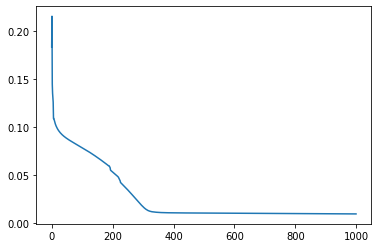

In [3]:
# Self-supervised, many samples at same time

class Layer_Dense:
    def __init__(self, Number_of_inputs, Number_of_neurons):
        self.weights = np.abs(0.05 * np.random.randn(Number_of_inputs, Number_of_neurons))

        # This creates a matrix of weight factors connecting every neuron from the previous layer
        # to every neuron of the current layer
        # Initialisation of weights is best done with low values in order to prevent 'value explosion'
        self.biases = np.zeros((1, Number_of_neurons))
        # Each neuron also has a bias to vary
    def intermediate(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        # This intermediate value is the input for the activation function

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    def derivative(self, inputs):
        self.diffoutput = np.ones(len(inputs))
        for a in range(0, len(inputs)):
            if inputs[a] > 0:
                self.diffoutput[a] = 1 #[1 for x in range(0, len(inputs))] 
            else:
                self.diffoutput[a] = 0 # [0 for x in range(0, len(inputs))] 
        
class Activation_Linear:
    def forward(self, inputs):
        self.output = np.array(inputs)  
    def derivative(self, inputs):
        self.diffoutput = [1 for x in range(0, len(inputs))] 

class Station_point:
    def __init__(self, x, z, R, rho, q, m):
        G = 6.67408 *10**-11
        self.A = 4/3*np.pi*G*rho*R**3
        self.g = self.A*z**m/(x**2+z**2)**q
    def norm_g(self, g0):
        self.g0 = self.g/g0

def Measurement_generation(R,rho,m,q,z,Num_points):
    Centre_x = 0
    Centre_y = 0
    p0 = Station_point(0,z,R,rho,q,m)

    Input_data_list_NN = np.zeros((Num_points,2))
    Station_points_list = [0 for x in range (0,Num_points)]

    for a in range (0,Num_points):
        Ran_x = np.abs(50*np.random.randn())
        p = Station_point(Ran_x,z,R,rho,q,m)
        p.norm_g(p0.g)
        Input_data_list_NN[a][0] = Ran_x
        Input_data_list_NN[a][1] = p.g0
        Station_points_list[a] = p
    
    Max_x = 0
    for a in range (0,Num_points):
        if (np.max(Input_data_list_NN[a][0]) > Max_x):
            Max_x = np.max(Input_data_list_NN[a][0])
    for a in range (0,Num_points):
        Input_data_list_NN[a][0] = Input_data_list_NN[a][0]/Max_x 
    
    return [Input_data_list_NN,Max_x]     

# Twice the samples, twice the fun
[X1,Max_x_1] = Measurement_generation(10,2500,1,3/2,80,15)

[X2,Max_x_2] = Measurement_generation(10,2500,1,3/2,160,15)

X = [X1,X2]

Max_x = np.max([Max_x_1,Max_x_2])

Num_Inputs = 2
Num_Hidden_Neurons_1 = 15
Num_Outputs = 2

        
Hidden_Layer_1 = Layer_Dense(Num_Inputs,Num_Hidden_Neurons_1)
# Creates a hidden layer. The first value is the number of neurons in the previous layer (now input, so 1),
# the second value is the number of neurons in the current hidden layer (which can be any number)
Activation_Function_Hidden_Layer_1 = Activation_ReLU()
# Choose for all neurons of the layer a certain activation function

Final_Layer = Layer_Dense(Num_Hidden_Neurons_1,Num_Outputs) # Input: number of neurons hidden layer, number of outputs (=2)

Activation_Function_Final_Layer = Activation_Linear()


Hidden_Layer_1_Pseudo = Layer_Dense(Num_Inputs,Num_Hidden_Neurons_1)
# Creates a hidden layer. The first value is the number of neurons in the previous layer (now input, so 1),
# the second value is the number of neurons in the current hidden layer (which can be any number)
Activation_Function_Hidden_Layer_1_Pseudo = Activation_ReLU()
# Choose for all neurons of the layer a certain activation function

Final_Layer_Pseudo = Layer_Dense(Num_Hidden_Neurons_1,Num_Outputs) # Input: number of neurons hidden layer, number of outputs (=2)

Activation_Function_Final_Layer_Pseudo = Activation_Linear()

Learning_rate = 0.25

def Pseudo_update(X,Max_x,Max_z):
    # Same structure as the actual neural network, but a local copy to check without changing the original structure
    Hidden_Layer_1_Pseudo.intermediate(X)
    Activation_Function_Hidden_Layer_1_Pseudo.forward(Hidden_Layer_1_Pseudo.output)
    Output_Hidden_Layer_1_Pseudo = Activation_Function_Hidden_Layer_1_Pseudo.output
    Final_Layer_Pseudo.intermediate(Output_Hidden_Layer_1_Pseudo)
    Activation_Function_Final_Layer_Pseudo.forward(Final_Layer_Pseudo.output)
    Output_Final_Layer_Pseudo = Activation_Function_Final_Layer_Pseudo.output
    NN_y = [Output_Final_Layer_Pseudo[0][0],Output_Final_Layer_Pseudo[0][1]]
    Error = np.abs(((NN_y[0]*Max_z)**2/((NN_y[0]*Max_z)**2+(X[0]*Max_x)**2))**(3/2*NN_y[1])-X[1])
    return np.array([Error, NN_y])
    
def Security_update(X):
    # A feature I thought can be useful, but also influences the weight updates, so not in use at the moment
    Hidden_Layer_1_Pseudo.intermediate(X)
    Activation_Function_Hidden_Layer_1_Pseudo.forward(Hidden_Layer_1_Pseudo.output)
    Output_Hidden_Layer_1_Pseudo = Activation_Function_Hidden_Layer_1_Pseudo.output
    Final_Layer_Pseudo.intermediate(Output_Hidden_Layer_1_Pseudo)
    Activation_Function_Final_Layer_Pseudo.forward(Final_Layer_Pseudo.output)
    Output_Final_Layer_Pseudo = Activation_Function_Final_Layer_Pseudo.output

def dEdOut1(xobs,znn,qnn):
    # Derivative of the error to znn
    return (qnn*xobs**2*(znn**2/(xobs**2+znn**2))**(qnn+1))/(znn**3) 

def dEdOut2(xobs,znn,qnn):
    # Derivative of the error to qnn
    return (znn**2/(xobs**2+znn**2))**qnn*np.log(znn**2/(xobs**2+znn**2)) 

def NN_Training(X,Learning_rate,Error_array,Max_x,Max_z):
    Hidden_Layer_1.intermediate(X)
    # Create the input for the activation function by creating a property of the hidden layer

    Activation_Function_Hidden_Layer_1.forward(Hidden_Layer_1.output) # 'Hidden_Layer_1.output' is the values of the neurons
    # Calculate the (output) value of every neuron in layer 1 by performing the activation function

    Output_Hidden_Layer_1 = Activation_Function_Hidden_Layer_1.output # 'Activation_Function_Hidden_Layer_1.output' is the value of the output of the neurons

    Final_Layer.intermediate(Output_Hidden_Layer_1) # Which is the input for the next layer of neurons

    Activation_Function_Final_Layer.forward(Final_Layer.output)

    Output_Final_Layer = Activation_Function_Final_Layer.output
    
    # Make a copy for testing
    Hidden_Layer_1_Pseudo.intermediate(X)
    Activation_Function_Hidden_Layer_1_Pseudo.forward(Hidden_Layer_1_Pseudo.output) 
    Output_Hidden_Layer_1_Pseudo = Activation_Function_Hidden_Layer_1_Pseudo.output
    Final_Layer_Pseudo.intermediate(Output_Hidden_Layer_1_Pseudo) 
    Activation_Function_Final_Layer_Pseudo.forward(Final_Layer_Pseudo.output)
    Output_Final_Layer_Pseudo = Activation_Function_Final_Layer_Pseudo.output
    
    
    NN_y = [0 for x in range(0, len(X))]
    Error = [0 for x in range(0, len(X))]
    
    for x in range(0, len(X)):
        NN_y[x] = Output_Final_Layer[x]
        Error[x] = ((NN_y[x][0]*Max_z)**2/((NN_y[x][0]*Max_z)**2+(X[x][0]*Max_x)**2))**(3/2*NN_y[x][1])-X[x][1]
        
#         print('Results show',((NN_y[x][0]*40)**2/((NN_y[x][0]*40)**2+X[x][0]**2))**(3/2*NN_y[x][1]))
        print('y(NN):',NN_y[x])
#         print('Desired output',np.array([y[x][0]/40,y[x][1]/(3/2)]))
        print('Error:',Error[x])
    
    print('       ')
    
    
    ##
    ####### Input Layer -> Hidden Layer weights update
    ##
    
    for a in range(0,len(X[0])): # loop over the size of one input tuple; usually 2
        
        dEdG = [0 for x in range(0,len(X))]
        dGdOut = [0 for x in range(0,len(X))]
        dOutdIn = [0 for x in range(0,len(X))]
        dIndOutHid = [0 for x in range(0,len(X))]
        dEdOutHid = [0 for x in range(0,len(X))]
        dOutHiddInHid = [0 for x in range(0,len(X))]
        dInHiddW = [0 for x in range(0,len(X))]
        dEdW = [0 for x in range(0,len(X))]
        
        for b in range(0,len(X)): # Loop over the size of the input batch
        
            dEdG[b] = Error[b]

            dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

            Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
            # 1xn matrix, n=number of outputs

            dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
            #dOutdIn = Final_Layer.output[0] # Element 0 because this is a list of lists
            # 1xn matrix, n=number of outputs

            dIndOutHid[b] = Final_Layer.weights
            #dIndW[b] = Hidden_Layer_1.output[b] # Element 0 because this is a list of lists
            
            dEdOutHid[b] = np.zeros(Num_Hidden_Neurons_1)
            # Interim result; result of the n 'ways' you can get to the weight in consideration
                        
            for c in range(0,Num_Hidden_Neurons_1):
                dEdOutHid[b][c] = np.sum(dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndOutHid[b][c]) # Compute every interim result
          
            Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[b]) # 1st neuron hidden layer value
            # This 'generates' derivatives in the layers, but doesn't retrieve them

            dOutHiddInHid[b] = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
            # 1xn matrix, n=number of outputs

            dInHiddW[b] = X[b][a] # Derivative of the input to the weights, which is the input
            # 1xn matrix, n=number of outputs
            
            dEdW[b] = dEdOutHid[b]*dOutHiddInHid[b]*dInHiddW[b]
            #dEdW[b] = np.sum(dEdG[b]*dGdOut[b]*dOutdIn[b])*dIndW[b]*dOutdInHid[b]*dInHiddW[b]
        
        dEdWAv = [0 for x in range(0,Num_Hidden_Neurons_1)]
        for x in range(0,Num_Hidden_Neurons_1):
            Tot_update = 0
            for y in range(0,len(X)): # Number of inputs in one batch
                Tot_update = Tot_update + dEdW[y][x]
            dEdWAv[x] = Tot_update/len(X)
        
        for b in range (0, Num_Hidden_Neurons_1):
            Old_weight = Hidden_Layer_1.weights[a][b]
            Hidden_Layer_1.weights[a][b] = Hidden_Layer_1.weights[a][b] - Learning_rate*dEdWAv[b]
            Hidden_Layer_1_Pseudo.weights[a][b] = Hidden_Layer_1.weights[a][b] - Learning_rate*dEdWAv[b]
            
            Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            NN_z_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
            NN_q_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
            
            for c in range(0,len(X)): # Number of inputs in one batch 
                Old_error[c] = Error[c]
                New_error[c] = Pseudo_update(X[c],Max_x,Max_z)[0]
                NN_z_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][0]
                NN_q_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][1]
            
            Bad_improvement_bool = False
            
            if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
                Hidden_Layer_1.weights[a][b] = Old_weight
                Hidden_Layer_1_Pseudo.weights[a][b] = Old_weight
                Bad_improvement_bool = True
                
            if Bad_improvement_bool == True:
                Learning_rate = Learning_rate/1.0001
                
            # Security_update(X)
    
    ##
    ####### Hidden layer bias update
    ##
    
    dEdG = [0 for x in range(0,len(X))]
    dGdOut = [0 for x in range(0,len(X))]
    dOutdIn = [0 for x in range(0,len(X))]
    dIndOutHid = [0 for x in range(0,len(X))]
    dEdOutHid = [0 for x in range(0,len(X))]
    dOutHiddInHid = [0 for x in range(0,len(X))]
    dInHiddB = [0 for x in range(0,len(X))]
    dEdB = [0 for x in range(0,len(X))]
    
    for b in range(0,len(X)): # Loop over the size of the input batch
        
        dEdG[b] = Error[b] 

        dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

        Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
        # 1xn matrix, n=number of outputs

        dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        #dOutdIn = Final_Layer.output[0] # Element 0 because this is a list of lists
        # 1xn matrix, n=number of outputs

        dIndOutHid[b] = Final_Layer.weights
        #dIndW[b] = Hidden_Layer_1.output[b] # Element 0 because this is a list of lists

        dEdOutHid[b] = np.zeros(Num_Hidden_Neurons_1)
        # Interim result; result of the n 'ways' you can get to the weight in consideration

        for c in range(0,Num_Hidden_Neurons_1):
            dEdOutHid[b][c] = np.sum(dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndOutHid[b][c]) # Compute every interim result

        Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[b]) # 1st neuron hidden layer value
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutHiddInHid[b] = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs

        dInHiddB[b] = np.ones(Num_Hidden_Neurons_1) # Derivative of the input to the bias, which is an additive constant
        # 1xn matrix, n=number of outputs
        
        dEdB[b] = dEdOutHid[b]*dOutHiddInHid[b]*dInHiddB[b]
    
    dEdBAv = [0 for x in range(0,Num_Hidden_Neurons_1)]
    for x in range(0,Num_Hidden_Neurons_1):
        Tot_update = 0
        for y in range(0,len(X)): # Number of inputs in one batch
            Tot_update = Tot_update + dEdB[y][x]
        dEdBAv[x] = Tot_update/len(X)
    
    for a in range(0, Num_Hidden_Neurons_1):
        Old_bias = Hidden_Layer_1.biases[0][a]
        Hidden_Layer_1.biases[0][a] = Hidden_Layer_1.biases[0][a] - Learning_rate*dEdBAv[a]
        Hidden_Layer_1_Pseudo.biases[0][a] = Hidden_Layer_1.biases[0][a] - Learning_rate*dEdBAv[a]
        
        Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_z_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_q_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
        
        for c in range(0,len(X)): # Number of inputs in one batch
            Old_error[c] = Error[c]
            New_error[c] = Pseudo_update(X[c],Max_x,Max_z)[0]
            NN_z_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][0]
            NN_q_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][1]
        
        Bad_improvement_bool = False
        
        if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
            Hidden_Layer_1.biases[0][a] = Old_bias
            Hidden_Layer_1_Pseudo.biases[0][a] = Old_bias
            Bad_improvement_bool = True

        if Bad_improvement_bool == True:
            Learning_rate = Learning_rate/1.0001
    
    ##
    ####### Hidden Layer -> Final Layer weights update
    ##
    
    for a in range(0,Num_Hidden_Neurons_1):
        
        dEdG = [0 for x in range(0,len(X))]
        dGdOut = [0 for x in range(0,len(X))]
        dOutdIn = [0 for x in range(0,len(X))]
        dIndW = [0 for x in range(0,len(X))]
        dOutdInHid = [0 for x in range(0,len(X))]
        dInHiddW = [0 for x in range(0,len(X))]
        dEdW = [0 for x in range(0,len(X))]
        
        for b in range(0,len(X)): # Loop over the number of inputs in the input batch

            dEdG[b] = Error[b]  

            dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

            Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
            # This 'generates' derivatives in the layers, but doesn't retrieve them

            dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
            # 1xn matrix, n=number of outputs
            
            dIndW[b] = Hidden_Layer_1.output[b][a]

            dEdW[b] = dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndW[b]
            
        dEdWAv = [0 for x in range(0,Num_Outputs)]
        for x in range(0,Num_Outputs):
            Tot_update = 0
            for y in range(0,len(X)): # Number of inputs in one batch
                Tot_update = Tot_update + dEdW[y][x]
            dEdWAv[x] = Tot_update/len(X)
        
        for b in range (0, Num_Outputs):
            Old_weight = Final_Layer.weights[a][b]
            Final_Layer.weights[a][b] = Final_Layer.weights[a][b] - Learning_rate*dEdWAv[b]
            Final_Layer_Pseudo.weights[a][b] = Final_Layer.weights[a][b] - Learning_rate*dEdWAv[b]
            
            Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            NN_y_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
            
            for c in range(0,len(X)): # Number of inputs in one batch 
                Old_error[c] = Error[c]
                New_error[c] = Pseudo_update(X[c],Max_x,Max_z)[0]
                NN_z_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][0]
                NN_q_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][1]
                
            
            Bad_improvement_bool = False
            
            if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
                Final_Layer.weights[a][b] = Old_weight
                Final_Layer_Pseudo.weights[a][b] = Old_weight
                Bad_improvement_bool = True
                
            if Bad_improvement_bool == True:
                Learning_rate = Learning_rate/1.0001
                
            # Security_update(X)
    
    ##
    ######## Output layer bias update
    ##
    
    dEdG = [0 for x in range(0,len(X))]
    dGdOut = [0 for x in range(0,len(X))]
    dOutdIn = [0 for x in range(0,len(X))]
    dIndB = [0 for x in range(0,len(X))]
    dEdB = [0 for x in range(0,len(X))]
    
    for b in range(0,len(X)): # Loop over the number of inputs in the input batch
    
        dEdG[b] = Error[b] 

        dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

        Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs

        dIndB[b] = np.ones(len(Final_Layer.output[b])) # Derivative of the input to the bias, which is an additive constant
        # 1xn matrix, n=number of outputs

        dEdB[b] = dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndB[b] # Total derivative of the energy to the biases
        # 1xn matrix, n=number of outputs
    
    dEdBAv = [0 for x in range(0,Num_Outputs)]
    for x in range(0,Num_Outputs):
        Tot_update = 0
        for y in range(0,len(X)): # Number of inputs in one batch
            Tot_update = Tot_update + dEdB[y][x]
        dEdBAv[x] = Tot_update/len(X)
    
    # Updating of all the biases at once using the learning rate and the gradient
    
    for a in range(0, Num_Outputs):
        Old_bias = Final_Layer.biases[0][a]

        Final_Layer.biases[0][a] = Final_Layer.biases[0][a] - Learning_rate*dEdBAv[a]
        Final_Layer_Pseudo.biases[0][a] = Final_Layer.biases[0][a] - Learning_rate*dEdBAv[a]
 
        Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_z_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_q_new = [0 for x in range(0,len(X))]
            
        for c in range(0,len(X)): # Number of inputs in one batch 
            Old_error[c] = Error[c]
            New_error[c] = Pseudo_update(X[c],Max_x,Max_z)[0]
            NN_z_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][0]
            NN_q_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][1]
        
        Bad_improvement_bool = False
        
        if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
            Final_Layer.biases[0][a] = Old_bias
            Final_Layer_Pseudo.biases[0][a] = Old_bias
            Bad_improvement_bool = True

        if Bad_improvement_bool == True:
            Learning_rate = Learning_rate/1.0001

        # Security_update(X)

    print(' ')
    
#     print('Ending config:')
#     print('Weights 1', Hidden_Layer_1.weights)
#     print('Weights 2', Final_Layer.weights)
#     print('Biases 1', Hidden_Layer_1.biases)
#     print('Biases 2', Final_Layer.biases)
    
#     print('Output 1',Output_Hidden_Layer_1)
#     print('Output 2',Output_Final_Layer)
    
#     print(' ')
    
    #np.append(Error_array,Error_current_run)
    
    #return Error_array
    
    print('Learning_rate',Learning_rate)
    return [Learning_rate, np.sum(np.abs(Error))/len(Error)]
    
Error_array = np.ones(1000)
print(X)
for a in range(0,1000):
    print('Iteration',a+1)
    [Learning_rate,Error_epoch_1] = NN_Training(X[0],Learning_rate,Error_array,Max_x,80)
    [Learning_rate,Error_epoch_2] = NN_Training(X[1],Learning_rate,Error_array,Max_x,80)
    #Error_array = NN_Training(X[1],y[1],Learning_rate,Error_array)
    #for b in range(0,len(X)):
#         NN_Training(X[b],y[b],Learning_rate)
    Error_array[a] = (Error_epoch_1+Error_epoch_2)/2
    
plt.plot(Error_array)
plt.show()

In [6]:
print(X)
print(X[0])

[array([[0.53649861, 0.55435938],
       [0.16527066, 0.93513141],
       [0.43528081, 0.66149688],
       [0.15830684, 0.94021432],
       [0.13745666, 0.95436284],
       [0.06925473, 0.9880758 ],
       [1.        , 0.22868388],
       [0.27499389, 0.83627053],
       [0.08102335, 0.98373852],
       [0.17721991, 0.92601613],
       [0.30892004, 0.80065813],
       [0.22282554, 0.88712479],
       [0.09716954, 0.97675002],
       [0.57024154, 0.52104052],
       [0.08016808, 0.98407548]]), array([[0.73144001, 0.7946546 ],
       [0.77008957, 0.77663298],
       [0.23383183, 0.97514095],
       [0.10444048, 0.99495699],
       [0.29645189, 0.96054187],
       [0.15577263, 0.988839  ],
       [0.05866917, 0.99840404],
       [0.3024993 , 0.95897147],
       [1.        , 0.66731559],
       [0.20306774, 0.98115562],
       [0.64822164, 0.8324322 ],
       [0.4732996 , 0.90433296],
       [0.44653037, 0.91408786],
       [0.61196463, 0.84830656],
       [0.43998773, 0.91641125]])]
[[0.5

In [3]:

# Self-supervised, many samples at same time, many input neurons

class Layer_Dense:
    def __init__(self, Number_of_inputs, Number_of_neurons):
        self.weights = np.abs(0.05 * np.random.randn(Number_of_inputs, Number_of_neurons))

        # This creates a matrix of weight factors connecting every neuron from the previous layer
        # to every neuron of the current layer
        # Initialisation of weights is best done with low values in order to prevent 'value explosion'
        self.biases = np.zeros((1, Number_of_neurons))
        # Each neuron also has a bias to vary
    def intermediate(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        # This intermediate value is the input for the activation function

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    def derivative(self, inputs):
        self.diffoutput = np.ones(len(inputs))
        for a in range(0, len(inputs)):
            if inputs[a] > 0:
                self.diffoutput[a] = 1 #[1 for x in range(0, len(inputs))] 
            else:
                self.diffoutput[a] = 0 # [0 for x in range(0, len(inputs))] 
        
class Activation_Linear:
    def forward(self, inputs):
        self.output = np.array(inputs)  
    def derivative(self, inputs):
        self.diffoutput = [1 for x in range(0, len(inputs))] 

class Station_point:
    def __init__(self, x, z, R, rho, q, m):
        G = 6.67408 *10**-11
        self.A = 4/3*np.pi*G*rho*R**3
        self.g = self.A*z**m/(x**2+z**2)**q
    def norm_g(self, g0):
        self.g0 = self.g/g0

def Measurement_generation(R,rho,m,q,z,Num_points):
    Centre_x = 0
    Centre_y = 0
    p0 = Station_point(0,z,R,rho,q,m)

    Input_data_list_NN = np.zeros((Num_points,2))
    Station_points_list = [0 for x in range (0,Num_points)]

    for a in range (0,Num_points):
        Ran_x = np.abs(50*np.random.randn())
        p = Station_point(Ran_x,z,R,rho,q,m)
        p.norm_g(p0.g)
        Input_data_list_NN[a][0] = Ran_x
        Input_data_list_NN[a][1] = p.g0
        Station_points_list[a] = p
    
    Max_x = 0
    for a in range (0,Num_points):
        if (np.max(Input_data_list_NN[a][0]) > Max_x):
            Max_x = np.max(Input_data_list_NN[a][0])
    for a in range (0,Num_points):
        Input_data_list_NN[a][0] = Input_data_list_NN[a][0]/Max_x 
    
    return [Input_data_list_NN,Max_x]     

# Twice the samples, twice the fun
[X,Max_x] = Measurement_generation(10,2500,1,3/2,80,15)
X = np.matrix.flatten(np.array(X))

Num_Inputs = 30
Num_Hidden_Neurons_1 = 15
Num_Outputs = 2

        
Hidden_Layer_1 = Layer_Dense(Num_Inputs,Num_Hidden_Neurons_1)
# Creates a hidden layer. The first value is the number of neurons in the previous layer (now input, so 1),
# the second value is the number of neurons in the current hidden layer (which can be any number)
Activation_Function_Hidden_Layer_1 = Activation_ReLU()
# Choose for all neurons of the layer a certain activation function

Final_Layer = Layer_Dense(Num_Hidden_Neurons_1,Num_Outputs) # Input: number of neurons hidden layer, number of outputs (=2)

Activation_Function_Final_Layer = Activation_Linear()


Hidden_Layer_1_Pseudo = Layer_Dense(Num_Inputs,Num_Hidden_Neurons_1)
# Creates a hidden layer. The first value is the number of neurons in the previous layer (now input, so 1),
# the second value is the number of neurons in the current hidden layer (which can be any number)
Activation_Function_Hidden_Layer_1_Pseudo = Activation_ReLU()
# Choose for all neurons of the layer a certain activation function

Final_Layer_Pseudo = Layer_Dense(Num_Hidden_Neurons_1,Num_Outputs) # Input: number of neurons hidden layer, number of outputs (=2)

Activation_Function_Final_Layer_Pseudo = Activation_Linear()

Learning_rate = 0.25

def Pseudo_update(X,Max_x,Max_z):
    # Same structure as the actual neural network, but a local copy to check without changing the original structure
    Hidden_Layer_1_Pseudo.intermediate(X)
    Activation_Function_Hidden_Layer_1_Pseudo.forward(Hidden_Layer_1_Pseudo.output)
    Output_Hidden_Layer_1_Pseudo = Activation_Function_Hidden_Layer_1_Pseudo.output
    Final_Layer_Pseudo.intermediate(Output_Hidden_Layer_1_Pseudo)
    Activation_Function_Final_Layer_Pseudo.forward(Final_Layer_Pseudo.output)
    Output_Final_Layer_Pseudo = Activation_Function_Final_Layer_Pseudo.output
    NN_y = [Output_Final_Layer_Pseudo[0][0],Output_Final_Layer_Pseudo[0][1]]
    Error = np.abs(((NN_y[0]*Max_z)**2/((NN_y[0]*Max_z)**2+(X[0]*Max_x)**2))**(3/2*NN_y[1])-X[1])
    return np.array([Error, NN_y])
    
def Security_update(X):
    # A feature I thought can be useful, but also influences the weight updates, so not in use at the moment
    Hidden_Layer_1_Pseudo.intermediate(X)
    Activation_Function_Hidden_Layer_1_Pseudo.forward(Hidden_Layer_1_Pseudo.output)
    Output_Hidden_Layer_1_Pseudo = Activation_Function_Hidden_Layer_1_Pseudo.output
    Final_Layer_Pseudo.intermediate(Output_Hidden_Layer_1_Pseudo)
    Activation_Function_Final_Layer_Pseudo.forward(Final_Layer_Pseudo.output)
    Output_Final_Layer_Pseudo = Activation_Function_Final_Layer_Pseudo.output

def dEdOut1(xobs,znn,qnn):
    # Derivative of the error to znn
    return (qnn*xobs**2*(znn**2/(xobs**2+znn**2))**(qnn+1))/(znn**3) 

def dEdOut2(xobs,znn,qnn):
    # Derivative of the error to qnn
    return (znn**2/(xobs**2+znn**2))**qnn*np.log(znn**2/(xobs**2+znn**2)) 

def NN_Training(X,Learning_rate,Error_array,Max_x,Max_z):
    Hidden_Layer_1.intermediate(X)
    # Create the input for the activation function by creating a property of the hidden layer

    Activation_Function_Hidden_Layer_1.forward(Hidden_Layer_1.output) # 'Hidden_Layer_1.output' is the values of the neurons
    # Calculate the (output) value of every neuron in layer 1 by performing the activation function

    Output_Hidden_Layer_1 = Activation_Function_Hidden_Layer_1.output # 'Activation_Function_Hidden_Layer_1.output' is the value of the output of the neurons

    Final_Layer.intermediate(Output_Hidden_Layer_1) # Which is the input for the next layer of neurons

    Activation_Function_Final_Layer.forward(Final_Layer.output)

    Output_Final_Layer = Activation_Function_Final_Layer.output
    
    # Make a copy for testing
    Hidden_Layer_1_Pseudo.intermediate(X)
    Activation_Function_Hidden_Layer_1_Pseudo.forward(Hidden_Layer_1_Pseudo.output) 
    Output_Hidden_Layer_1_Pseudo = Activation_Function_Hidden_Layer_1_Pseudo.output
    Final_Layer_Pseudo.intermediate(Output_Hidden_Layer_1_Pseudo) 
    Activation_Function_Final_Layer_Pseudo.forward(Final_Layer_Pseudo.output)
    Output_Final_Layer_Pseudo = Activation_Function_Final_Layer_Pseudo.output
    
    
    NN_y = [0 for x in range(0, 1)]
    Error = [0 for x in range(0, 1)]
    
    print('aaa',NN_y)
    print('bbb',Error)
    
    for x in range(0, 1):
        NN_y[x] = Output_Final_Layer[x]
        Error[x] = ((NN_y[x][0]*Max_z)**2/((NN_y[x][0]*Max_z)**2+(X[x][0]*Max_x)**2))**(3/2*NN_y[x][1])-X[x][1]
        
#         print('Results show',((NN_y[x][0]*40)**2/((NN_y[x][0]*40)**2+X[x][0]**2))**(3/2*NN_y[x][1]))
        print('y(NN):',NN_y[x])
#         print('Desired output',np.array([y[x][0]/40,y[x][1]/(3/2)]))
        print('Error:',Error[x])
    
    print('       ')
    
    
    ##
    ####### Input Layer -> Hidden Layer weights update
    ##
    
    for a in range(0,len(X[0])): # loop over the size of one input tuple; usually 2
        
        dEdG = [0 for x in range(0,len(X))]
        dGdOut = [0 for x in range(0,len(X))]
        dOutdIn = [0 for x in range(0,len(X))]
        dIndOutHid = [0 for x in range(0,len(X))]
        dEdOutHid = [0 for x in range(0,len(X))]
        dOutHiddInHid = [0 for x in range(0,len(X))]
        dInHiddW = [0 for x in range(0,len(X))]
        dEdW = [0 for x in range(0,len(X))]
        
        for b in range(0,len(X)): # Loop over the size of the input batch
        
            dEdG[b] = Error[b]

            dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

            Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
            # 1xn matrix, n=number of outputs

            dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
            #dOutdIn = Final_Layer.output[0] # Element 0 because this is a list of lists
            # 1xn matrix, n=number of outputs

            dIndOutHid[b] = Final_Layer.weights
            #dIndW[b] = Hidden_Layer_1.output[b] # Element 0 because this is a list of lists
            
            dEdOutHid[b] = np.zeros(Num_Hidden_Neurons_1)
            # Interim result; result of the n 'ways' you can get to the weight in consideration
                        
            for c in range(0,Num_Hidden_Neurons_1):
                dEdOutHid[b][c] = np.sum(dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndOutHid[b][c]) # Compute every interim result
          
            Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[b]) # 1st neuron hidden layer value
            # This 'generates' derivatives in the layers, but doesn't retrieve them

            dOutHiddInHid[b] = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
            # 1xn matrix, n=number of outputs

            dInHiddW[b] = X[b][a] # Derivative of the input to the weights, which is the input
            # 1xn matrix, n=number of outputs
            
            dEdW[b] = dEdOutHid[b]*dOutHiddInHid[b]*dInHiddW[b]
            #dEdW[b] = np.sum(dEdG[b]*dGdOut[b]*dOutdIn[b])*dIndW[b]*dOutdInHid[b]*dInHiddW[b]
        
        dEdWAv = [0 for x in range(0,Num_Hidden_Neurons_1)]
        for x in range(0,Num_Hidden_Neurons_1):
            Tot_update = 0
            for y in range(0,len(X)): # Number of inputs in one batch
                Tot_update = Tot_update + dEdW[y][x]
            dEdWAv[x] = Tot_update/len(X)
        
        for b in range (0, Num_Hidden_Neurons_1):
            Old_weight = Hidden_Layer_1.weights[a][b]
            Hidden_Layer_1.weights[a][b] = Hidden_Layer_1.weights[a][b] - Learning_rate*dEdWAv[b]
            Hidden_Layer_1_Pseudo.weights[a][b] = Hidden_Layer_1.weights[a][b] - Learning_rate*dEdWAv[b]
            
            Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            NN_z_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
            NN_q_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
            
            for c in range(0,len(X)): # Number of inputs in one batch 
                Old_error[c] = Error[c]
                New_error[c] = Pseudo_update(X[c],Max_x,Max_z)[0]
                NN_z_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][0]
                NN_q_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][1]
            
            Bad_improvement_bool = False
            
            if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
                Hidden_Layer_1.weights[a][b] = Old_weight
                Hidden_Layer_1_Pseudo.weights[a][b] = Old_weight
                Bad_improvement_bool = True
                
            if Bad_improvement_bool == True:
                Learning_rate = Learning_rate/1.0001
                
            # Security_update(X)
    
    ##
    ####### Hidden layer bias update
    ##
    
    dEdG = [0 for x in range(0,len(X))]
    dGdOut = [0 for x in range(0,len(X))]
    dOutdIn = [0 for x in range(0,len(X))]
    dIndOutHid = [0 for x in range(0,len(X))]
    dEdOutHid = [0 for x in range(0,len(X))]
    dOutHiddInHid = [0 for x in range(0,len(X))]
    dInHiddB = [0 for x in range(0,len(X))]
    dEdB = [0 for x in range(0,len(X))]
    
    for b in range(0,len(X)): # Loop over the size of the input batch
        
        dEdG[b] = Error[b] 

        dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

        Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
        # 1xn matrix, n=number of outputs

        dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        #dOutdIn = Final_Layer.output[0] # Element 0 because this is a list of lists
        # 1xn matrix, n=number of outputs

        dIndOutHid[b] = Final_Layer.weights
        #dIndW[b] = Hidden_Layer_1.output[b] # Element 0 because this is a list of lists

        dEdOutHid[b] = np.zeros(Num_Hidden_Neurons_1)
        # Interim result; result of the n 'ways' you can get to the weight in consideration

        for c in range(0,Num_Hidden_Neurons_1):
            dEdOutHid[b][c] = np.sum(dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndOutHid[b][c]) # Compute every interim result

        Activation_Function_Hidden_Layer_1.derivative(Hidden_Layer_1.output[b]) # 1st neuron hidden layer value
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutHiddInHid[b] = Activation_Function_Hidden_Layer_1.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs

        dInHiddB[b] = np.ones(Num_Hidden_Neurons_1) # Derivative of the input to the bias, which is an additive constant
        # 1xn matrix, n=number of outputs
        
        dEdB[b] = dEdOutHid[b]*dOutHiddInHid[b]*dInHiddB[b]
    
    dEdBAv = [0 for x in range(0,Num_Hidden_Neurons_1)]
    for x in range(0,Num_Hidden_Neurons_1):
        Tot_update = 0
        for y in range(0,len(X)): # Number of inputs in one batch
            Tot_update = Tot_update + dEdB[y][x]
        dEdBAv[x] = Tot_update/len(X)
    
    for a in range(0, Num_Hidden_Neurons_1):
        Old_bias = Hidden_Layer_1.biases[0][a]
        Hidden_Layer_1.biases[0][a] = Hidden_Layer_1.biases[0][a] - Learning_rate*dEdBAv[a]
        Hidden_Layer_1_Pseudo.biases[0][a] = Hidden_Layer_1.biases[0][a] - Learning_rate*dEdBAv[a]
        
        Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_z_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_q_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
        
        for c in range(0,len(X)): # Number of inputs in one batch
            Old_error[c] = Error[c]
            New_error[c] = Pseudo_update(X[c],Max_x,Max_z)[0]
            NN_z_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][0]
            NN_q_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][1]
        
        Bad_improvement_bool = False
        
        if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
            Hidden_Layer_1.biases[0][a] = Old_bias
            Hidden_Layer_1_Pseudo.biases[0][a] = Old_bias
            Bad_improvement_bool = True

        if Bad_improvement_bool == True:
            Learning_rate = Learning_rate/1.0001
    
    ##
    ####### Hidden Layer -> Final Layer weights update
    ##
    
    for a in range(0,Num_Hidden_Neurons_1):
        
        dEdG = [0 for x in range(0,len(X))]
        dGdOut = [0 for x in range(0,len(X))]
        dOutdIn = [0 for x in range(0,len(X))]
        dIndW = [0 for x in range(0,len(X))]
        dOutdInHid = [0 for x in range(0,len(X))]
        dInHiddW = [0 for x in range(0,len(X))]
        dEdW = [0 for x in range(0,len(X))]
        
        for b in range(0,len(X)): # Loop over the number of inputs in the input batch

            dEdG[b] = Error[b]  

            dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

            Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
            # This 'generates' derivatives in the layers, but doesn't retrieve them

            dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
            # 1xn matrix, n=number of outputs
            
            dIndW[b] = Hidden_Layer_1.output[b][a]

            dEdW[b] = dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndW[b]
            
        dEdWAv = [0 for x in range(0,Num_Outputs)]
        for x in range(0,Num_Outputs):
            Tot_update = 0
            for y in range(0,len(X)): # Number of inputs in one batch
                Tot_update = Tot_update + dEdW[y][x]
            dEdWAv[x] = Tot_update/len(X)
        
        for b in range (0, Num_Outputs):
            Old_weight = Final_Layer.weights[a][b]
            Final_Layer.weights[a][b] = Final_Layer.weights[a][b] - Learning_rate*dEdWAv[b]
            Final_Layer_Pseudo.weights[a][b] = Final_Layer.weights[a][b] - Learning_rate*dEdWAv[b]
            
            Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
            NN_y_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
            
            for c in range(0,len(X)): # Number of inputs in one batch 
                Old_error[c] = Error[c]
                New_error[c] = Pseudo_update(X[c],Max_x,Max_z)[0]
                NN_z_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][0]
                NN_q_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][1]
                
            
            Bad_improvement_bool = False
            
            if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
                Final_Layer.weights[a][b] = Old_weight
                Final_Layer_Pseudo.weights[a][b] = Old_weight
                Bad_improvement_bool = True
                
            if Bad_improvement_bool == True:
                Learning_rate = Learning_rate/1.0001
                
            # Security_update(X)
    
    ##
    ######## Output layer bias update
    ##
    
    dEdG = [0 for x in range(0,len(X))]
    dGdOut = [0 for x in range(0,len(X))]
    dOutdIn = [0 for x in range(0,len(X))]
    dIndB = [0 for x in range(0,len(X))]
    dEdB = [0 for x in range(0,len(X))]
    
    for b in range(0,len(X)): # Loop over the number of inputs in the input batch
    
        dEdG[b] = Error[b] 

        dGdOut[b] = np.array([dEdOut1(X[b][0],NN_y[b][0],NN_y[b][1]),dEdOut2(X[b][0],NN_y[b][0],NN_y[b][1])])

        Activation_Function_Final_Layer.derivative(Final_Layer.output[b]) # value of the derivatives at the values of the output neurons
        # This 'generates' derivatives in the layers, but doesn't retrieve them

        dOutdIn[b] = Activation_Function_Final_Layer.diffoutput # Derivative of the output to the input; derivative of activation function
        # 1xn matrix, n=number of outputs

        dIndB[b] = np.ones(len(Final_Layer.output[b])) # Derivative of the input to the bias, which is an additive constant
        # 1xn matrix, n=number of outputs

        dEdB[b] = dEdG[b]*dGdOut[b]*dOutdIn[b]*dIndB[b] # Total derivative of the energy to the biases
        # 1xn matrix, n=number of outputs
    
    dEdBAv = [0 for x in range(0,Num_Outputs)]
    for x in range(0,Num_Outputs):
        Tot_update = 0
        for y in range(0,len(X)): # Number of inputs in one batch
            Tot_update = Tot_update + dEdB[y][x]
        dEdBAv[x] = Tot_update/len(X)
    
    # Updating of all the biases at once using the learning rate and the gradient
    
    for a in range(0, Num_Outputs):
        Old_bias = Final_Layer.biases[0][a]

        Final_Layer.biases[0][a] = Final_Layer.biases[0][a] - Learning_rate*dEdBAv[a]
        Final_Layer_Pseudo.biases[0][a] = Final_Layer.biases[0][a] - Learning_rate*dEdBAv[a]
 
        Old_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        New_error = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_z_new = [0 for x in range(0,len(X))] # Number of inputs in one batch
        NN_q_new = [0 for x in range(0,len(X))]
            
        for c in range(0,len(X)): # Number of inputs in one batch 
            Old_error[c] = Error[c]
            New_error[c] = Pseudo_update(X[c],Max_x,Max_z)[0]
            NN_z_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][0]
            NN_q_new[c] = Pseudo_update(X[c],Max_x,Max_z)[1][1]
        
        Bad_improvement_bool = False
        
        if (np.any(np.array(NN_z_new)<0) or np.any(np.array(NN_q_new)<0)): # Might be a too harsh requirement
            Final_Layer.biases[0][a] = Old_bias
            Final_Layer_Pseudo.biases[0][a] = Old_bias
            Bad_improvement_bool = True

        if Bad_improvement_bool == True:
            Learning_rate = Learning_rate/1.0001

        # Security_update(X)

    print(' ')
    
#     print('Ending config:')
#     print('Weights 1', Hidden_Layer_1.weights)
#     print('Weights 2', Final_Layer.weights)
#     print('Biases 1', Hidden_Layer_1.biases)
#     print('Biases 2', Final_Layer.biases)
    
#     print('Output 1',Output_Hidden_Layer_1)
#     print('Output 2',Output_Final_Layer)
    
#     print(' ')
    
    #np.append(Error_array,Error_current_run)
    
    #return Error_array
    
    print('Learning_rate',Learning_rate)
    return Learning_rate
    
Error_array = []
print(X)
for a in range(0,5000):
    print('Iteration',a+1)
    Learning_rate = NN_Training(X,Learning_rate,Error_array,Max_x,80)
    #Error_array = NN_Training(X[1],y[1],Learning_rate,Error_array)
    #for b in range(0,len(X)):
#         NN_Training(X[b],y[b],Learning_rate)

[0.41402567 0.76335651 0.39420012 0.78133566 0.15307643 0.96087772
 0.53222276 0.65496315 0.50483165 0.6799496  0.13846478 0.96779834
 0.68014564 0.52721656 1.         0.31706271 0.76664126 0.46076484
 0.51455667 0.67105157 0.8634744  0.39487759 0.13975103 0.96721378
 0.08647488 0.98723075 0.65388702 0.548725   0.56081272 0.62919592]
Iteration 1
aaa [0]
bbb [0]


IndexError: invalid index to scalar variable.

In [4]:
import numpy as np

def aaaa(znn,xobs,qnn):
    return (znn**2/(xobs**2+znn**2))**qnn*np.log(znn**2/(xobs**2+znn**2)) 

print(aaaa(1,1,1.5))
print(aaaa(1,-1,1.5))
print(aaaa(1,1,-1.5))
print(aaaa(1,-1,-1.5))
print(aaaa(-1,1,1.5))
print(aaaa(-1,-1,1.5))
print(aaaa(-1,1,-1.5))
print(aaaa(-1,-1,-1.5))

-0.2450645358671368
-0.2450645358671368
-1.9605162869370945
-1.9605162869370945
-0.2450645358671368
-0.2450645358671368
-1.9605162869370945
-1.9605162869370945


In [68]:
class Station_point:
    def __init__(self, x, z, R, rho, q, m):
        G = 6.67408 *10**-11
        self.A = 4/3*np.pi*G*rho*R**3
        self.g = self.A*z**m/(x**2+z**2)**q
    def norm_g(self, g0):
        self.g0 = self.g/g0

def Measurement_generation(R,rho,m,q,z,Num_points):
    Centre_x = 0
    Centre_y = 0
    p0 = Station_point(0,z,R,rho,q,m)

    Input_data_list_NN = np.zeros((Num_points,2))
    Station_points_list = [0 for x in range (0,Num_points)]

    for a in range (0,Num_points):
        Ran_x = np.abs(50*np.random.randn())
        p = Station_point(Ran_x,z,R,rho,q,m)
        p.norm_g(p0.g)
        Input_data_list_NN[a][0] = Ran_x
        Input_data_list_NN[a][1] = p.g0
        Station_points_list[a] = p
    
    Max_x = 0
    for a in range (0,Num_points):
        if (np.max(Input_data_list_NN[a][0]) > Max_x):
            Max_x = np.max(Input_data_list_NN[a][0])
    for a in range (0,Num_points):
        Input_data_list_NN[a][0] = Input_data_list_NN[a][0]/Max_x 
    
    return [Input_data_list_NN,Max_x]     

# Twice the samples, twice the fun
[X,Max_x] = Measurement_generation(10,2500,1,3/2,80,15)

print(X)
X = np.matrix.flatten(np.array(X))
print(X)

[[0.1612348  0.87139215]
 [0.32232079 0.61410051]
 [0.29033907 0.66567302]
 [0.02563385 0.99636678]
 [0.18881804 0.83049055]
 [1.         0.0982248 ]
 [0.17742172 0.84776986]
 [0.18938351 0.829621  ]
 [0.03385388 0.99367729]
 [0.39745262 0.50158056]
 [0.55392227 0.32067795]
 [0.42175389 0.46854653]
 [0.56162956 0.31364506]
 [0.16738218 0.86256071]
 [0.43243466 0.45460002]]
[0.1612348  0.87139215 0.32232079 0.61410051 0.29033907 0.66567302
 0.02563385 0.99636678 0.18881804 0.83049055 1.         0.0982248
 0.17742172 0.84776986 0.18938351 0.829621   0.03385388 0.99367729
 0.39745262 0.50158056 0.55392227 0.32067795 0.42175389 0.46854653
 0.56162956 0.31364506 0.16738218 0.86256071 0.43243466 0.45460002]


In [58]:


[X,maxw] = Measurement_generation(15,2500,1,3/2,40,15)
print(X,maxw)

[[0.19674407 0.56269555]
 [0.45910609 0.14988806]
 [0.74591643 0.04666296]
 [0.26632333 0.39546974]
 [0.02872605 0.98524466]
 [0.77853434 0.04170359]
 [0.01749212 0.99448609]
 [0.63403769 0.07064019]
 [0.7988326  0.03895669]
 [0.31592257 0.30549447]
 [0.44024143 0.16388456]
 [0.02430203 0.98940244]
 [0.16146313 0.66341261]
 [0.31084344 0.31365828]
 [1.         0.02116503]] 138.9638886504753


In [8]:
print(Max_x_1)
print(Max_x_2)
print(np.max([1,2]))

78.5307463851812
90.90132103150411
2


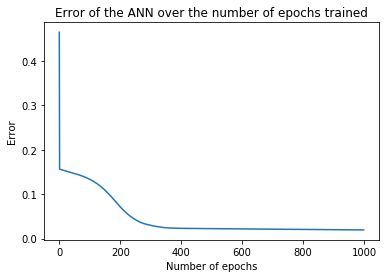

In [15]:
plt.plot(Error_array)
plt.title('Error of the ANN over the number of epochs trained')
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.show()